<a href="https://colab.research.google.com/github/drshahizan/Python-big-data/blob/main/assignment/ass7/hpdp/KHUCHIN/library_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Airline Delay and Cancellation Data, 2009 - 2018 (Assignment 7: Comparison between libraries by KHUCHIN)

## Group: KHUCHIN

### Group Members

| Name                                     | Matrix Number | Task |
| :---------------------------------------- | :-------------: | ------------- |
| NUR KHUZAIRIE ZAKWAN BIN MOHD ZAMRI | A21EC0112 |  Conclusion
| IKMAL BIN KHAIRULEZUAN | A21EC0186 | Library 3: Dask
| NUR SHUHADA SAFIAH BINTI AYOB | A21EC0114 | Library 2: Modin
| WAN AMIRUL HAFIQ BIN WAN HUZAINI | A21EC0141 | Library 1: Pandas

<u>Introduction</u>

Data scientists, machine learning engineers, and data engineers can choose from a wide range of datasets. Small datasets that easily fit in RAM, medium-sized datasets that barely fit on storage, and large datasets that appear difficult to handle are all examples of dataset sizes. Finding the best tools to evaluate each dataset can be challenging because they all have different issues and constraints. Dask is the best option for maximizing performance and calculating medium to large datasets quickly.

##1. Dataset Selection

Source credit: https://www.kaggle.com/datasets/yuanyuwendymu/airline-delay-and-cancellation-data-2009-2018/data

This dataset is similar to 2015 Flight Delays and Cancellations. This dataset aims to incorporate multi-year data from 2009 to 2018 to offer additional time series insights. For our dataset. We will only use 2017.csv dataset.

<u>Content of the dataset columns</u>
1. FL_DATE = Date of the flight, yy/mm/dd
2. OP_CARRIER = Airline Identifier
3. OP_CARRIER_FL_NUM = Flight Number
4. ORIGIN = Starting Airport Code
5. DEST = Destination Airport Code
6. CRS_DEP_TIME = Planned Departure Time
7. DEP_TIME = Actual Departure Time
8. DEP_DELAY = Total Delay on Departure in minutes
9. TAXI_OUT = The time duration elapsed between departure from the origin airport gate and wheels off
10. WHEELS_OFF = The time point that the aircraft's wheels leave the ground
11. WHEELS_ON = The time point that the aircraft's wheels touch on the ground
12. TAXI_IN = The time duration elapsed between wheels-on and gate arrival at the destination airport
13. CRS_ARR_TIME = Planned arrival time
14. ARR_TIME = Actual Arrival Time
15. ARR_DELAY = Total Delay on Arrival in minutes
16. CANCELLED = Flight Cancelled (1 = cancelled)
17. CANCELLATION_CODE = Reason for Cancellation of flight: A - Airline/Carrier; B - Weather; C - National Air System; D - Security
18. DIVERTED = Aircraft landed on airport that out of schedule
19. CRS_ELAPSED_TIME = Planned time amount needed for the flight trip
20. ACTUAL_ELAPSED_TIME = AIR_TIME+TAXI_IN+TAXI_OUT
21. AIR_TIME = The time duration between wheels_off and wheels_on time
23. DISTANCE = Distance between two airports
24. CARRIER_DELAY = Delay caused by the airline in minutes
25. WEATHER_DELAY = Delay caused by weather
26. NAS_DELAY = Delay caused by air system
27. SECURITY_DELAY
28. LATE_AIRCRAFT_DELAY = Delay caused by security
29. Unnamed: 27 = Useless column

##2. Loading the Dataset

In [ ]:
# Install Kaggle
!pip install -q kaggle

In [ ]:
# Import the 'files' module from the 'google.colab' library
from google.colab import files

# Upload files and store the uploaded files in a variable
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ikmal2002","key":"90dfcb220c79ea31c0a370961059ea50"}'}

In [ ]:
# Create a kaggle folder
! mkdir ~/.kaggle

In [ ]:
!cp /content/kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# Download Kaggle Dataset
!kaggle datasets download yuanyuwendymu/airline-delay-and-cancellation-data-2009-2018

100% 1.94G/1.95G [00:18<00:00, 102MB/s] 
100% 1.95G/1.95G [00:18<00:00, 110MB/s]


In [ ]:
# Unzip the downloaded file
!unzip airline-delay-and-cancellation-data-2009-2018.zip

Archive:  airline-delay-and-cancellation-data-2009-2018.zip
  inflating: 2009.csv                
  inflating: 2010.csv                
  inflating: 2011.csv                
  inflating: 2012.csv                
  inflating: 2013.csv                
  inflating: 2014.csv                
  inflating: 2015.csv                
  inflating: 2016.csv                
  inflating: 2017.csv                
  inflating: 2018.csv                


In [ ]:
# Install Dask library
!pip install dask

In [ ]:
import dask
# import the Dask DataFrame module
import dask.dataframe as dd

# Specify dtype for the 'CANCELLATION_CODE' column due to error arise when to show head and tail
dtype_fixerror = {'CANCELLATION_CODE': 'object'}

# Read '2017.csv' file with dtype specified
dd_2017 = dd.read_csv('2017.csv', dtype=dtype_fixerror)

In [ ]:
#check number of partitions
dd_2017.npartitions

#display dataframe
dd_2017.compute()

FL_DATE OP_CARRIER  OP_CARRIER_FL_NUM ORIGIN DEST  CRS_DEP_TIME  \
0       2017-01-01         AA                  1    JFK  LAX           800   
1       2017-01-01         AA                  2    LAX  JFK           900   
2       2017-01-01         AA                  4    LAX  JFK          1130   
3       2017-01-01         AA                  5    DFW  HNL          1135   
4       2017-01-01         AA                  6    OGG  DFW          1855   
...            ...        ...                ...    ...  ...           ...   
567038  2017-12-31         UA               2421    IAH  LAS           750   
567039  2017-12-31         UA               2425    RSW  ORD          1611   
567040  2017-12-31         UA               2426    SNA  DEN          1335   
567041  2017-12-31         UA               2427    LAS  SFO          1115   
567042  2017-12-31         UA               2429    EWR  DEN          1510   

        DEP_TIME  DEP_DELAY  TAXI_OUT  WHEELS_OFF  ...  CRS_ELAPSED_TIME  \
0          831.0       31.0      25.0       856.0  ...             402.0   
1          934.0       34.0      34.0      1008.0  ...             327.0   
2         1221.0       51.0      20.0      1241.0  ...             328.0   
3         1252.0       77.0      19.0      1311.0  ...             517.0   
4         1855.0        0.0      16.0      1911.0  ...             425.0   
...          ...        ...       ...         ...  ...               ...   
567038     744.0       -6.0      14.0       758.0  ...             206.0   
567039    1602.0       -9.0      12.0      1614.0  ...             190.0   
567040    1334.0       -1.0       9.0      1343.0  ...             134.0   
567041    1107.0       -8.0      11.0      1118.0  ...              99.0   
567042    1612.0       62.0      28.0      1640.0  ...             270.0   

        ACTUAL_ELAPSED_TIME  AIR_TIME  DISTANCE  CARRIER_DELAY  WEATHER_DELAY  \
0                     398.0     347.0    2475.0           27.0            0.0   
1                     335.0     289.0    2475.0           34.0            0.0   
2                     319.0     284.0    2475.0            7.0            0.0   
3                     537.0     513.0    3784.0           77.0            0.0   
4                     467.0     440.0    3711.0            0.0            0.0   
...                     ...       ...       ...            ...            ...   
567038                189.0     171.0    1222.0            NaN            NaN   
567039                183.0     159.0    1120.0            NaN            NaN   
567040                123.0     104.0     846.0            NaN            NaN   
567041                 92.0      66.0     414.0            NaN            NaN   
567042                266.0     227.0    1605.0           58.0            0.0   

       NAS_DELAY  SECURITY_DELAY  LATE_AIRCRAFT_DELAY  Unnamed: 27  
0            0.0             0.0                  0.0          NaN  
1            8.0             0.0                  0.0          NaN  
2            0.0             0.0                 35.0          NaN  
3           20.0             0.0                  0.0          NaN  
4           42.0             0.0                  0.0          NaN  
...          ...             ...                  ...          ...  
567038       NaN             NaN                  NaN          NaN  
567039       NaN             NaN                  NaN          NaN  
567040       NaN             NaN                  NaN          NaN  
567041       NaN             NaN                  NaN          NaN  
567042       0.0             0.0                  0.0          NaN  

[5674621 rows x 28 columns]

##3. Cleaning the Dataset

In [ ]:
#display dataframe columns with the dtypes
dd_2017.dtypes

FL_DATE                 object
OP_CARRIER              object
OP_CARRIER_FL_NUM        int64
ORIGIN                  object
DEST                    object
CRS_DEP_TIME             int64
DEP_TIME               float64
DEP_DELAY              float64
TAXI_OUT               float64
WHEELS_OFF             float64
WHEELS_ON              float64
TAXI_IN                float64
CRS_ARR_TIME             int64
ARR_TIME               float64
ARR_DELAY              float64
CANCELLED              float64
CANCELLATION_CODE       object
DIVERTED               float64
CRS_ELAPSED_TIME       float64
ACTUAL_ELAPSED_TIME    float64
AIR_TIME               float64
DISTANCE               float64
CARRIER_DELAY          float64
WEATHER_DELAY          float64
NAS_DELAY              float64
SECURITY_DELAY         float64
LATE_AIRCRAFT_DELAY    float64
Unnamed: 27            float64
dtype: object

In [ ]:
#count duplicate in our dataframe
dd_2017.drop_duplicates()

Dask DataFrame Structure:
              FL_DATE OP_CARRIER OP_CARRIER_FL_NUM  ORIGIN    DEST CRS_DEP_TIME DEP_TIME DEP_DELAY TAXI_OUT WHEELS_OFF WHEELS_ON  TAXI_IN CRS_ARR_TIME ARR_TIME ARR_DELAY CANCELLED CANCELLATION_CODE DIVERTED CRS_ELAPSED_TIME ACTUAL_ELAPSED_TIME AIR_TIME DISTANCE CARRIER_DELAY WEATHER_DELAY NAS_DELAY SECURITY_DELAY LATE_AIRCRAFT_DELAY Unnamed: 27
npartitions=1                                                                                                                                                                                                                                                                                                                                             
               object     object             int64  object  object        int64  float64   float64  float64    float64   float64  float64        int64  float64   float64   float64            object  float64          float64             float64  float64  float64       float64       float64   float64        float64             float64     float64
                  ...        ...               ...     ...     ...          ...      ...       ...      ...        ...       ...      ...          ...      ...       ...       ...               ...      ...              ...                 ...      ...      ...           ...           ...       ...            ...                 ...         ...
Dask Name: drop-duplicates-agg, 3 graph layers

In [ ]:
#count null in our dataframe
dd_2017.isna().sum(axis=0).compute()

FL_DATE                      0
OP_CARRIER                   0
OP_CARRIER_FL_NUM            0
ORIGIN                       0
DEST                         0
CRS_DEP_TIME                 0
DEP_TIME                 80308
DEP_DELAY                80343
TAXI_OUT                 82145
WHEELS_OFF               82141
WHEELS_ON                84674
TAXI_IN                  84674
CRS_ARR_TIME                 0
ARR_TIME                 84674
ARR_DELAY                95211
CANCELLED                    0
CANCELLATION_CODE      5591928
DIVERTED                     0
CRS_ELAPSED_TIME             7
ACTUAL_ELAPSED_TIME      95211
AIR_TIME                 95211
DISTANCE                     0
CARRIER_DELAY          4645148
WEATHER_DELAY          4645148
NAS_DELAY              4645148
SECURITY_DELAY         4645148
LATE_AIRCRAFT_DELAY    4645148
Unnamed: 27            5674621
dtype: int64

In [ ]:
# Specify the string columns in the subset
string_cols = dd_2017.select_dtypes(include='object').columns

# Replace missing values with mode for string columns
for col in string_cols:
    mode_value = dd_2017[col].mode().compute().iloc[0]  # Calculate mode (assumes there's a unique mode)
    dd_2017[col] = dd_2017[col].fillna(mode_value)

# Display the modified Dask DataFrame
print(dd_2017.compute())


           FL_DATE OP_CARRIER  OP_CARRIER_FL_NUM ORIGIN DEST  CRS_DEP_TIME  \
0       2017-01-01         AA                  1    JFK  LAX           800   
1       2017-01-01         AA                  2    LAX  JFK           900   
2       2017-01-01         AA                  4    LAX  JFK          1130   
3       2017-01-01         AA                  5    DFW  HNL          1135   
4       2017-01-01         AA                  6    OGG  DFW          1855   
...            ...        ...                ...    ...  ...           ...   
567038  2017-12-31         UA               2421    IAH  LAS           750   
567039  2017-12-31         UA               2425    RSW  ORD          1611   
567040  2017-12-31         UA               2426    SNA  DEN          1335   
567041  2017-12-31         UA               2427    LAS  SFO          1115   
567042  2017-12-31         UA               2429    EWR  DEN          1510   

        DEP_TIME  DEP_DELAY  TAXI_OUT  WHEELS_OFF  ...  CRS_ELA

In [ ]:
#count null
dd_2017.isna().sum(axis=0).compute()

FL_DATE                      0
OP_CARRIER                   0
OP_CARRIER_FL_NUM            0
ORIGIN                       0
DEST                         0
CRS_DEP_TIME                 0
DEP_TIME                 80308
DEP_DELAY                80343
TAXI_OUT                 82145
WHEELS_OFF               82141
WHEELS_ON                84674
TAXI_IN                  84674
CRS_ARR_TIME                 0
ARR_TIME                 84674
ARR_DELAY                95211
CANCELLED                    0
CANCELLATION_CODE            0
DIVERTED                     0
CRS_ELAPSED_TIME             7
ACTUAL_ELAPSED_TIME      95211
AIR_TIME                 95211
DISTANCE                     0
CARRIER_DELAY          4645148
WEATHER_DELAY          4645148
NAS_DELAY              4645148
SECURITY_DELAY         4645148
LATE_AIRCRAFT_DELAY    4645148
Unnamed: 27            5674621
dtype: int64

In [ ]:
#display dataframe columns with the dtypes
dd_2017.dtypes

FL_DATE                 object
OP_CARRIER              object
OP_CARRIER_FL_NUM        int64
ORIGIN                  object
DEST                    object
CRS_DEP_TIME             int64
DEP_TIME               float64
DEP_DELAY              float64
TAXI_OUT               float64
WHEELS_OFF             float64
WHEELS_ON              float64
TAXI_IN                float64
CRS_ARR_TIME             int64
ARR_TIME               float64
ARR_DELAY              float64
CANCELLED              float64
CANCELLATION_CODE       object
DIVERTED               float64
CRS_ELAPSED_TIME       float64
ACTUAL_ELAPSED_TIME    float64
AIR_TIME               float64
DISTANCE               float64
CARRIER_DELAY          float64
WEATHER_DELAY          float64
NAS_DELAY              float64
SECURITY_DELAY         float64
LATE_AIRCRAFT_DELAY    float64
Unnamed: 27            float64
dtype: object

In [ ]:
# Convert "FL_DATE" column to date data type
dd_2017['FL_DATE'] = dd.to_datetime(dd_2017['FL_DATE'], errors='coerce')

# Convert "CRS_DEP_TIME" column to time data type
dd_2017['CRS_DEP_TIME'] = dd.to_datetime(dd_2017['CRS_DEP_TIME'], format='%H%M', errors='coerce').dt.time

# Convert "DEP_TIME" column to time data type
dd_2017['DEP_TIME'] = dd.to_datetime(dd_2017['DEP_TIME'], format='%H%M', errors='coerce').dt.time

In [ ]:
#display dataframe columns with the dtypes
dd_2017.dtypes

FL_DATE                datetime64[ns]
OP_CARRIER                     object
OP_CARRIER_FL_NUM               int64
ORIGIN                         object
DEST                           object
CRS_DEP_TIME                   object
DEP_TIME                       object
DEP_DELAY                     float64
TAXI_OUT                      float64
WHEELS_OFF                    float64
WHEELS_ON                     float64
TAXI_IN                       float64
CRS_ARR_TIME                    int64
ARR_TIME                      float64
ARR_DELAY                     float64
CANCELLED                     float64
CANCELLATION_CODE              object
DIVERTED                      float64
CRS_ELAPSED_TIME              float64
ACTUAL_ELAPSED_TIME           float64
AIR_TIME                      float64
DISTANCE                      float64
CARRIER_DELAY                 float64
WEATHER_DELAY                 float64
NAS_DELAY                     float64
SECURITY_DELAY                float64
LATE_AIRCRAF

In [ ]:
# Drop the "Unnamed: 27" column
dd_2017 = dd_2017.drop(columns=['Unnamed: 27'], errors='ignore')

In [ ]:
#display dataframe columns with the dtypes
dd_2017.dtypes

FL_DATE                datetime64[ns]
OP_CARRIER                     object
OP_CARRIER_FL_NUM               int64
ORIGIN                         object
DEST                           object
CRS_DEP_TIME                   object
DEP_TIME                       object
DEP_DELAY                     float64
TAXI_OUT                      float64
WHEELS_OFF                    float64
WHEELS_ON                     float64
TAXI_IN                       float64
CRS_ARR_TIME                    int64
ARR_TIME                      float64
ARR_DELAY                     float64
CANCELLED                     float64
CANCELLATION_CODE              object
DIVERTED                      float64
CRS_ELAPSED_TIME              float64
ACTUAL_ELAPSED_TIME           float64
AIR_TIME                      float64
DISTANCE                      float64
CARRIER_DELAY                 float64
WEATHER_DELAY                 float64
NAS_DELAY                     float64
SECURITY_DELAY                float64
LATE_AIRCRAF

In [ ]:
# Specify the string columns in the subset
string_cols = dd_2017.select_dtypes(include='object').columns

# Replace missing values with mode for string columns
mode_values = dd_2017[string_cols].mode().compute().iloc[0]
fill_values = dict(zip(string_cols, mode_values))

dd_2017 = dd_2017.map_partitions(lambda df: df.fillna(fill_values))

# Display the modified Dask DataFrame
print(dd_2017.compute())

          FL_DATE OP_CARRIER  OP_CARRIER_FL_NUM ORIGIN DEST CRS_DEP_TIME  \
0      2017-01-01         AA                  1    JFK  LAX     08:00:00   
1      2017-01-01         AA                  2    LAX  JFK     09:00:00   
2      2017-01-01         AA                  4    LAX  JFK     11:30:00   
3      2017-01-01         AA                  5    DFW  HNL     11:35:00   
4      2017-01-01         AA                  6    OGG  DFW     18:55:00   
...           ...        ...                ...    ...  ...          ...   
567038 2017-12-31         UA               2421    IAH  LAS     07:50:00   
567039 2017-12-31         UA               2425    RSW  ORD     16:11:00   
567040 2017-12-31         UA               2426    SNA  DEN     13:35:00   
567041 2017-12-31         UA               2427    LAS  SFO     11:15:00   
567042 2017-12-31         UA               2429    EWR  DEN     15:10:00   

        DEP_TIME  DEP_DELAY  TAXI_OUT  WHEELS_OFF  ...  DIVERTED  \
0       08:31:00   

In [ ]:
# Drop rows with missing values
dd_2017.dropna()

# Display the result
print(dd_2017.dropna().compute())

          FL_DATE OP_CARRIER  OP_CARRIER_FL_NUM ORIGIN DEST CRS_DEP_TIME  \
0      2017-01-01         AA                  1    JFK  LAX     08:00:00   
1      2017-01-01         AA                  2    LAX  JFK     09:00:00   
2      2017-01-01         AA                  4    LAX  JFK     11:30:00   
3      2017-01-01         AA                  5    DFW  HNL     11:35:00   
4      2017-01-01         AA                  6    OGG  DFW     18:55:00   
...           ...        ...                ...    ...  ...          ...   
567005 2017-12-31         UA               2381    ORD  SAN     12:25:00   
567006 2017-12-31         UA               2384    EWR  FLL     16:47:00   
567008 2017-12-31         UA               2387    BZN  DEN     05:15:00   
567029 2017-12-31         UA               2410    RSW  EWR     12:50:00   
567042 2017-12-31         UA               2429    EWR  DEN     15:10:00   

        DEP_TIME  DEP_DELAY  TAXI_OUT  WHEELS_OFF  ...  DIVERTED  \
0       08:31:00   

##2. Exploratory Data Analysis (EDA)

In [ ]:
#display dataframe description
print(dd_2017.describe().compute())

       OP_CARRIER_FL_NUM     DEP_DELAY      TAXI_OUT    WHEELS_OFF  \
count       5.674621e+06  5.594278e+06  5.592476e+06  5.592480e+06   
mean        2.143449e+03  9.725734e+00  1.677994e+01  1.355794e+03   
std         1.737462e+03  4.386590e+01  9.365385e+00  5.062227e+02   
min         1.000000e+00 -2.340000e+02  0.000000e+00  1.000000e+00   
25%         7.820000e+02 -5.000000e+00  1.100000e+01  9.370000e+02   
50%         1.743000e+03 -1.000000e+00  1.500000e+01  1.344000e+03   
75%         3.356000e+03  1.200000e+01  2.000000e+01  1.809000e+03   
max         8.402000e+03  2.755000e+03  1.830000e+02  2.400000e+03   

          WHEELS_ON       TAXI_IN  CRS_ARR_TIME      ARR_TIME     ARR_DELAY  \
count  5.589947e+06  5.589947e+06  5.674621e+06  5.589947e+06  5.579410e+06   
mean   1.464579e+03  7.507610e+00  1.489308e+03  1.468881e+03  4.326357e+00   
std    5.340316e+02  5.913152e+00  5.190175e+02  5.383984e+02  4.586481e+01   
min    1.000000e+00  0.000000e+00  1.000000e+00  1.00

In [ ]:
# Select numeric columns
numeric_cols = dd_2017.select_dtypes(include='number').columns

# Compute range for numeric columns in Dask
range_values = dd_2017[numeric_cols].max() - dd_2017[numeric_cols].min()

# Display the result
print(range_values.compute())

OP_CARRIER_FL_NUM      8401.0
DEP_DELAY              2989.0
TAXI_OUT                183.0
WHEELS_OFF             2399.0
WHEELS_ON              2399.0
TAXI_IN                 414.0
CRS_ARR_TIME           2358.0
ARR_TIME               2399.0
ARR_DELAY              2427.0
CANCELLED                 1.0
DIVERTED                  1.0
CRS_ELAPSED_TIME        717.0
ACTUAL_ELAPSED_TIME     769.0
AIR_TIME                705.0
DISTANCE               4952.0
CARRIER_DELAY          1934.0
WEATHER_DELAY          1934.0
NAS_DELAY              1605.0
SECURITY_DELAY          827.0
LATE_AIRCRAFT_DELAY    1756.0
dtype: float64


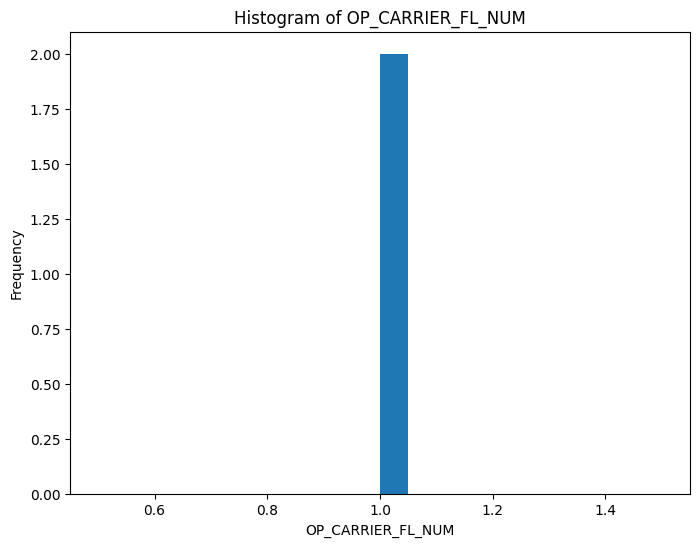

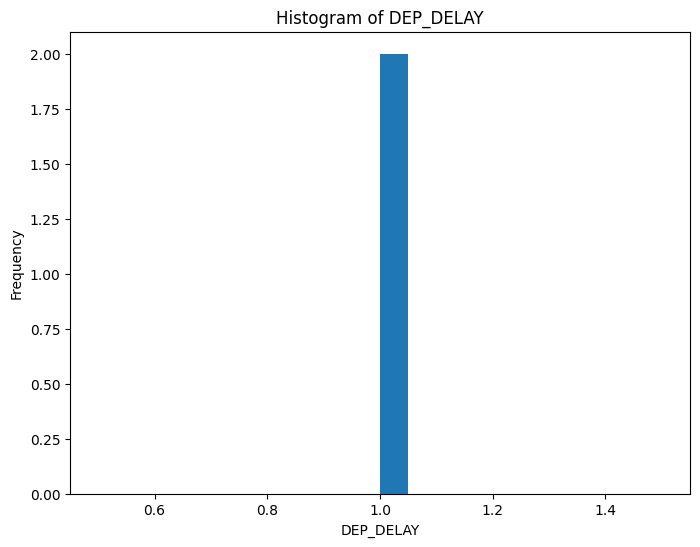

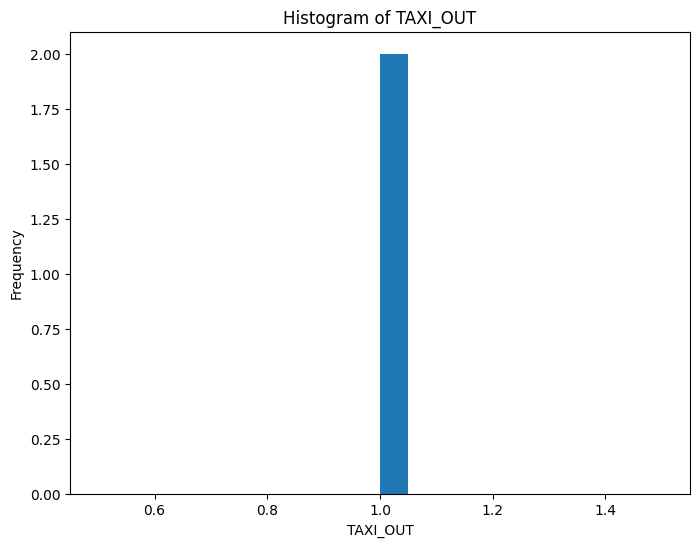

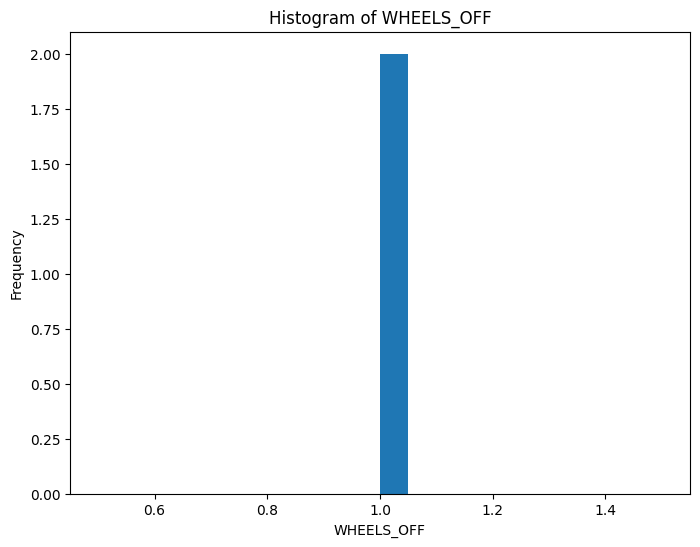

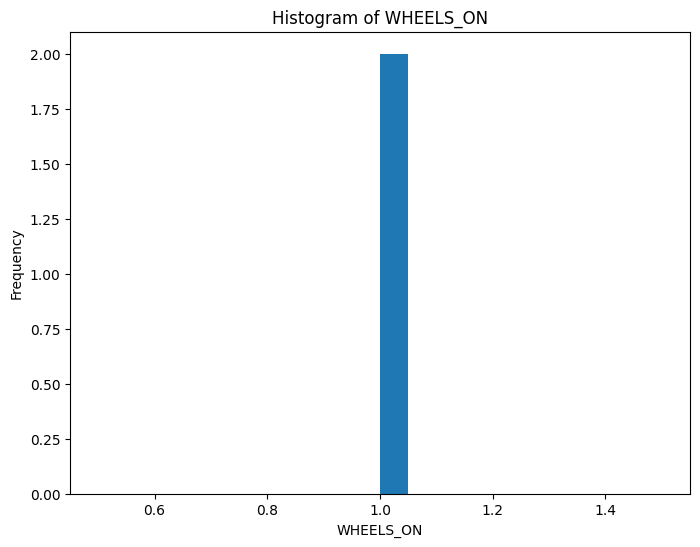

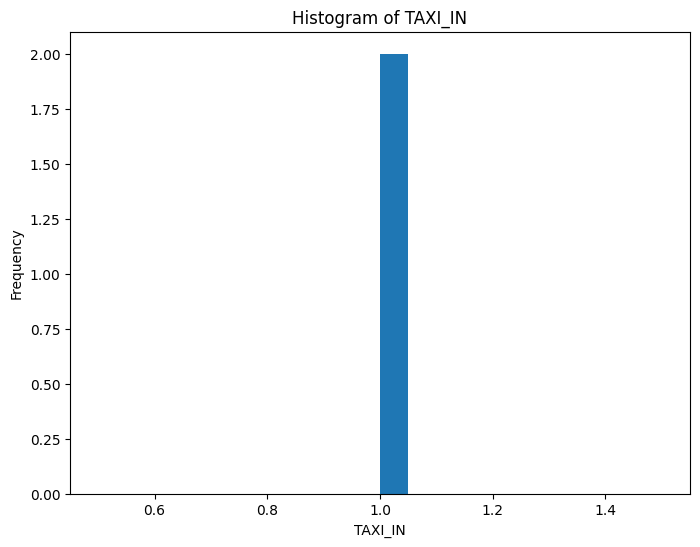

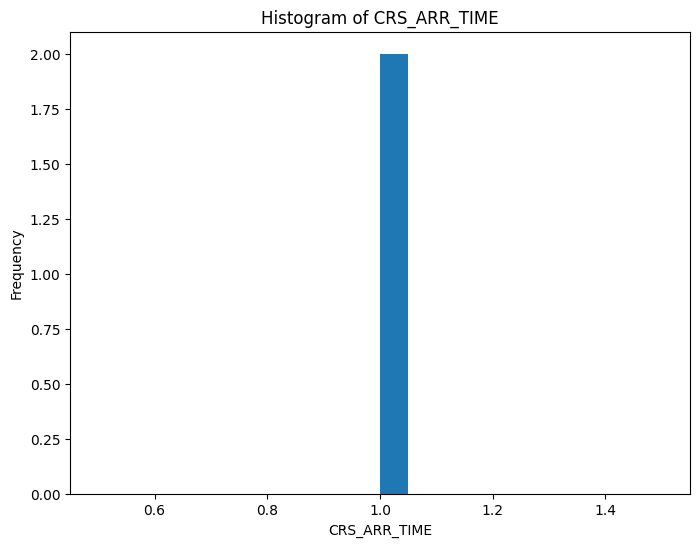

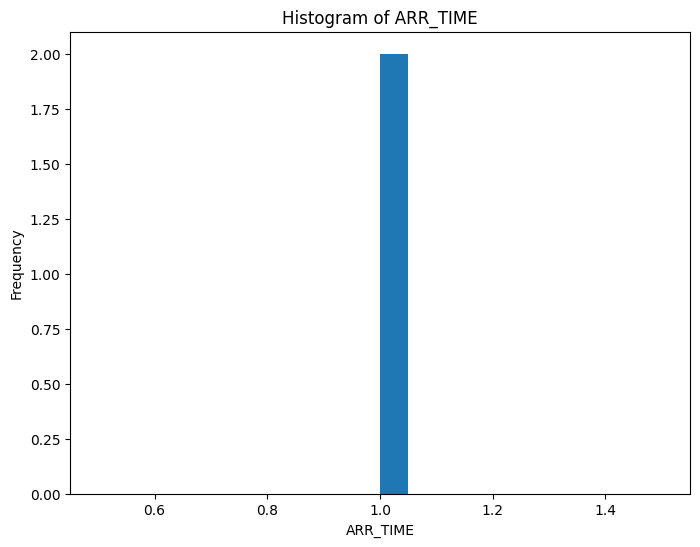

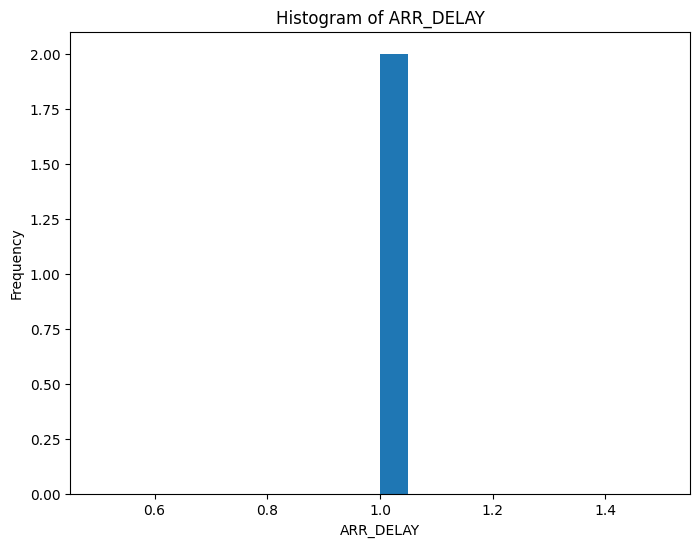

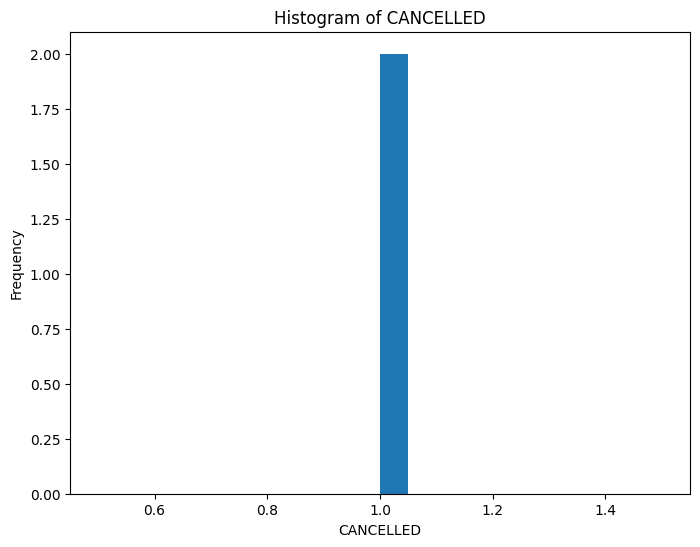

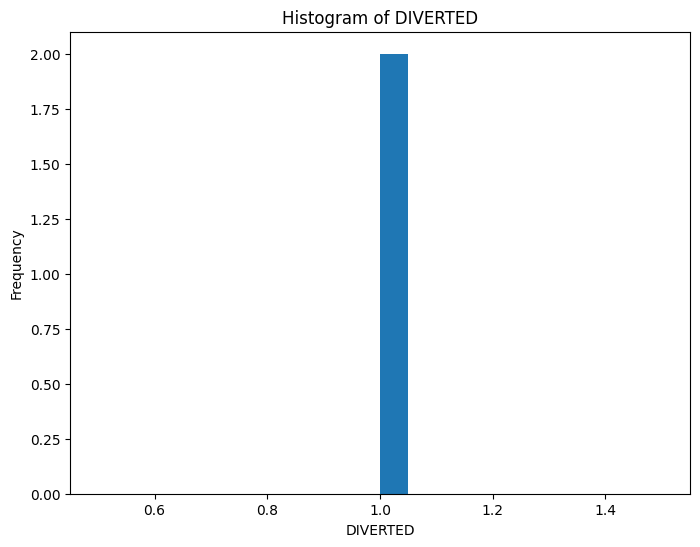

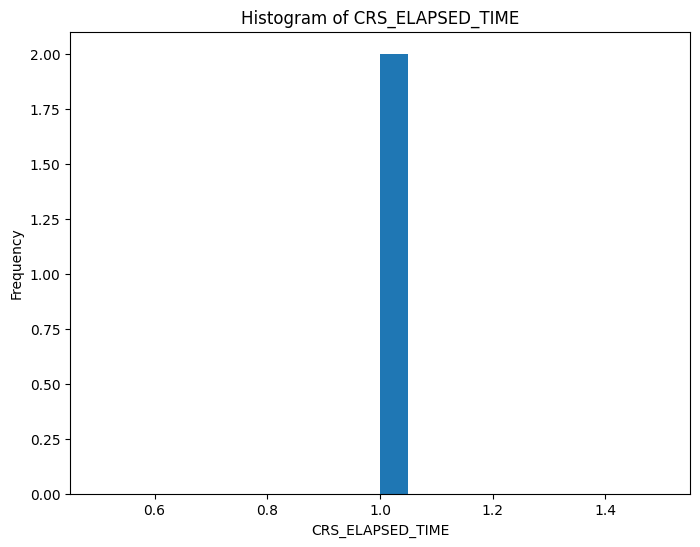

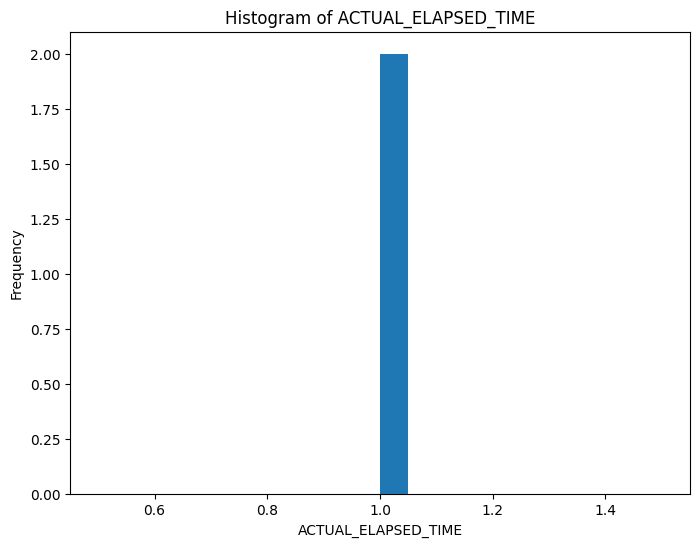

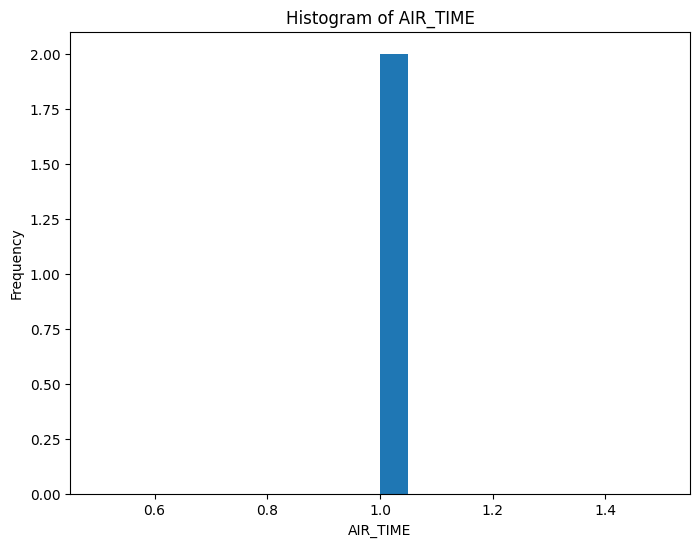

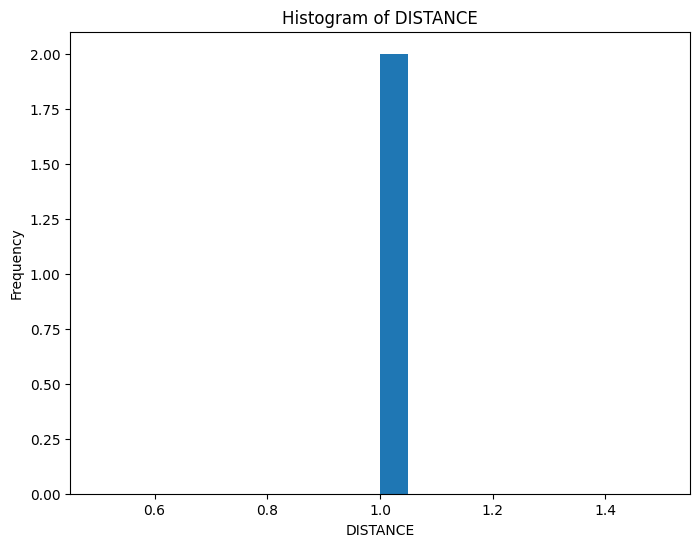

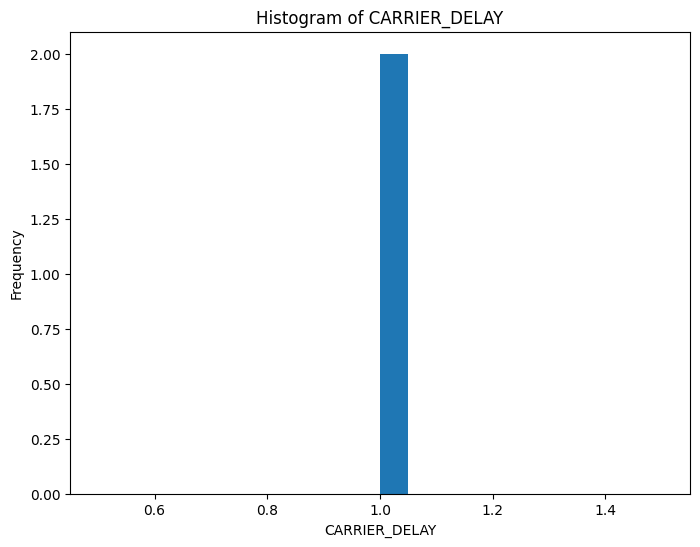

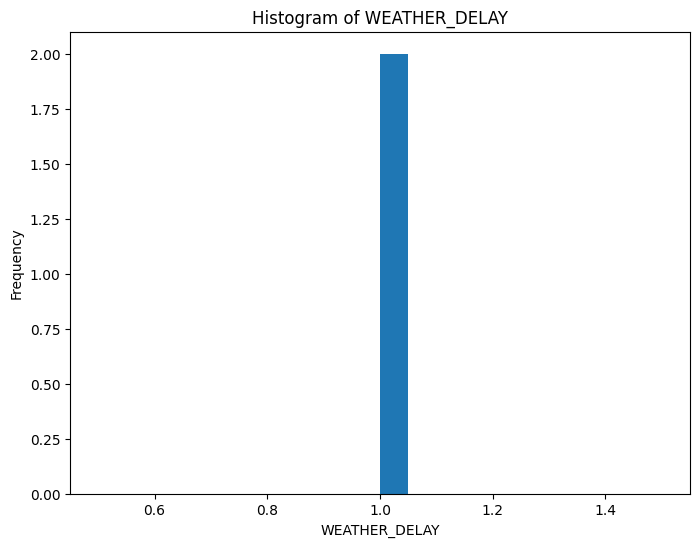

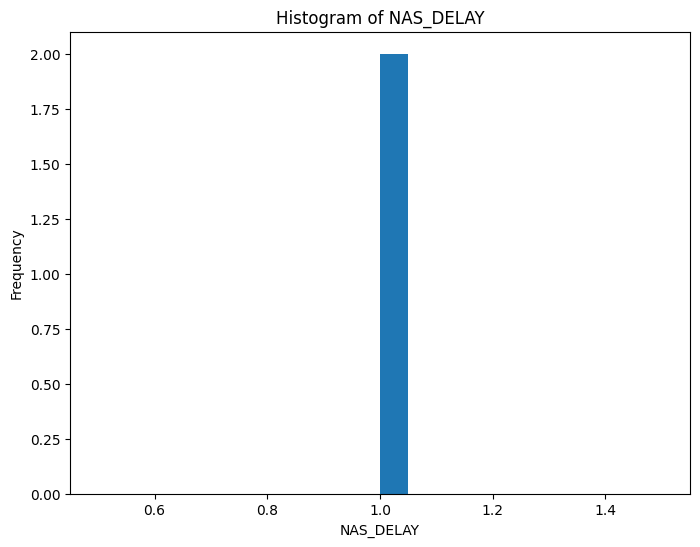

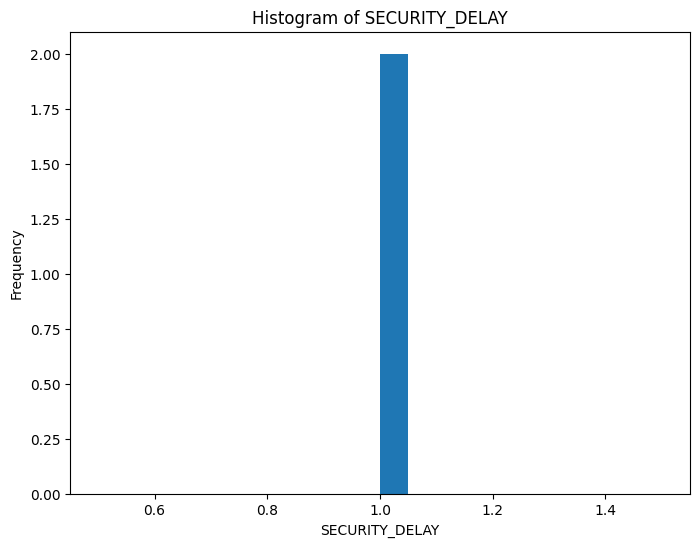

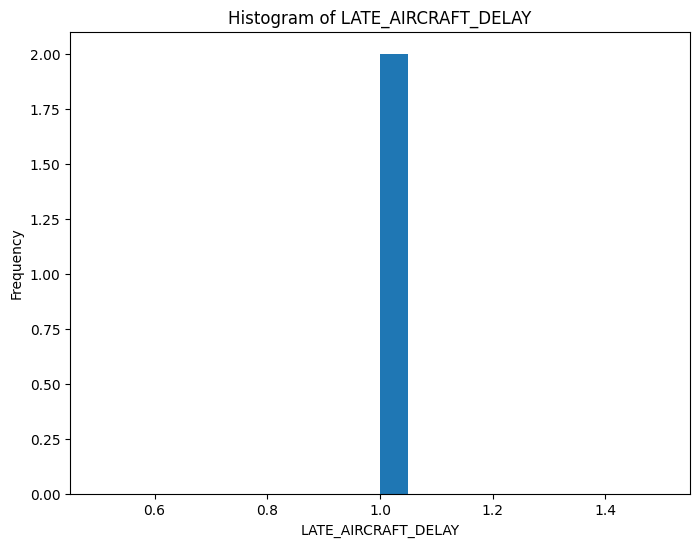

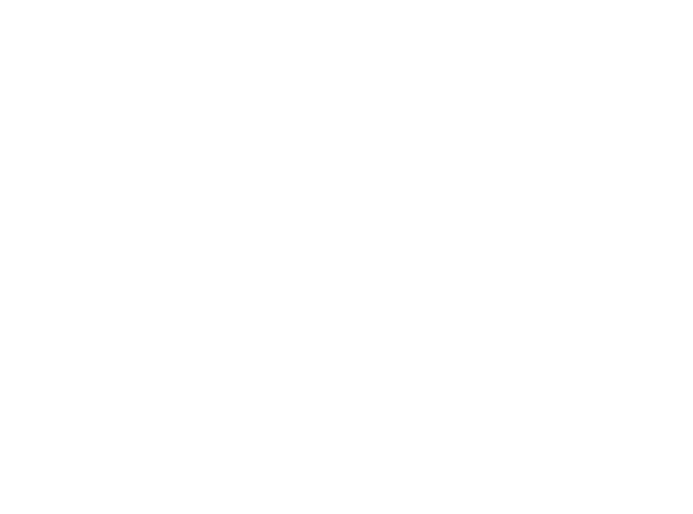

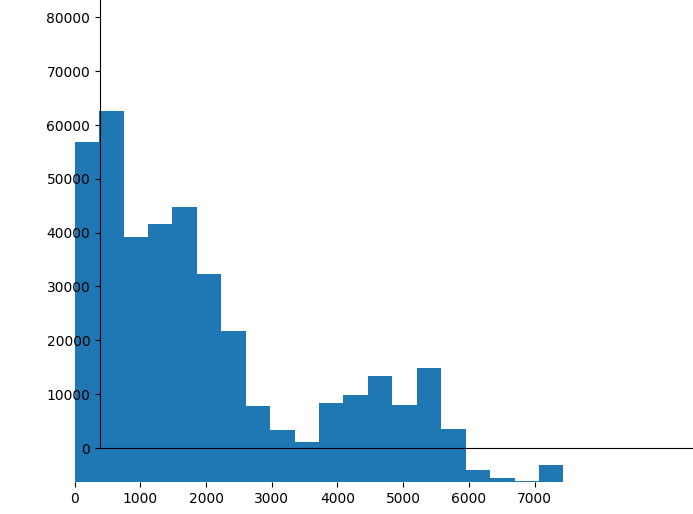

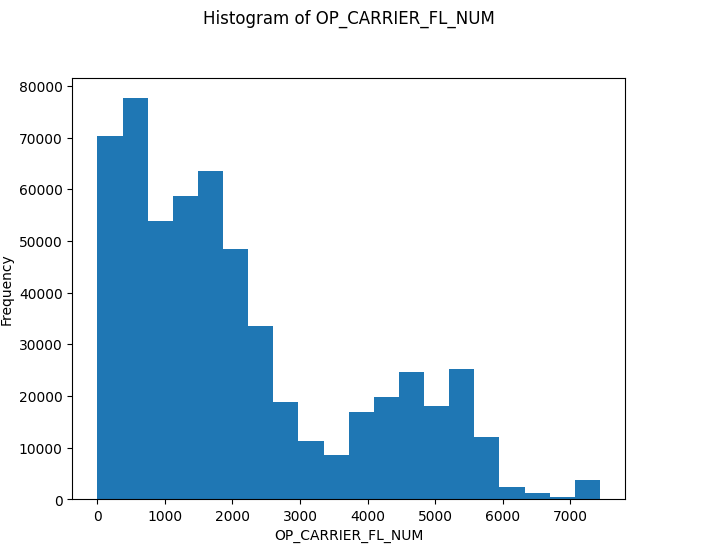

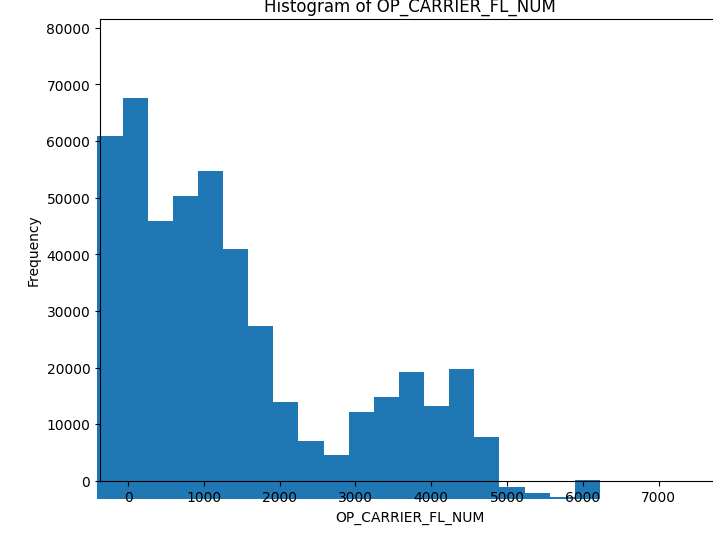

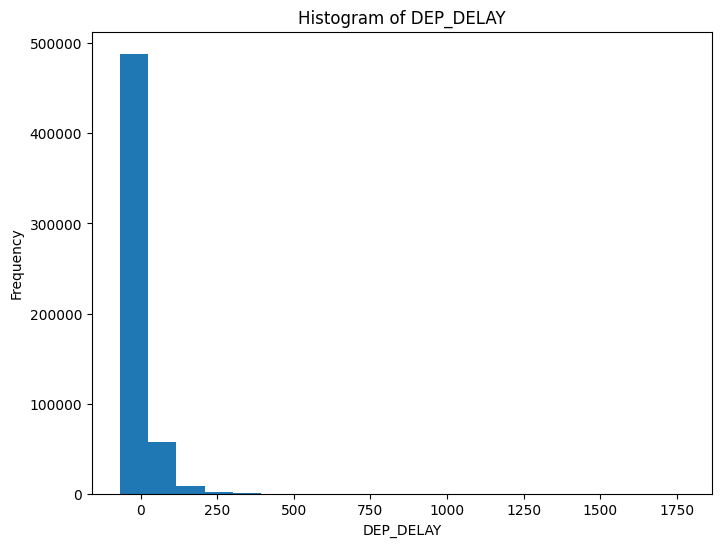

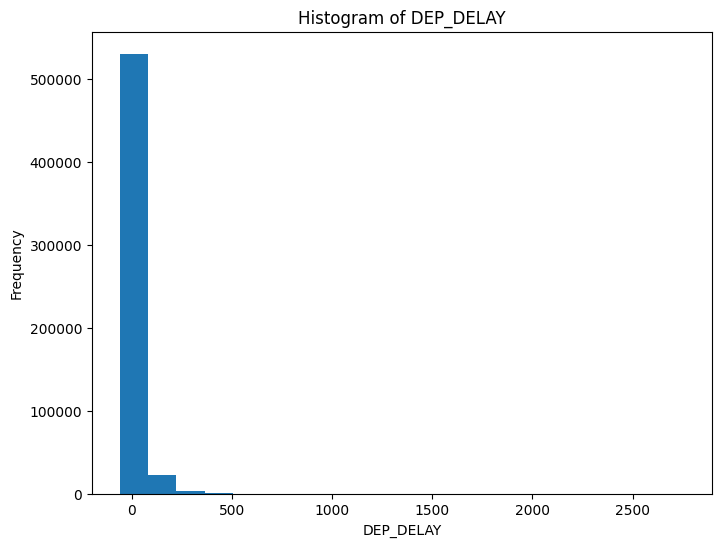

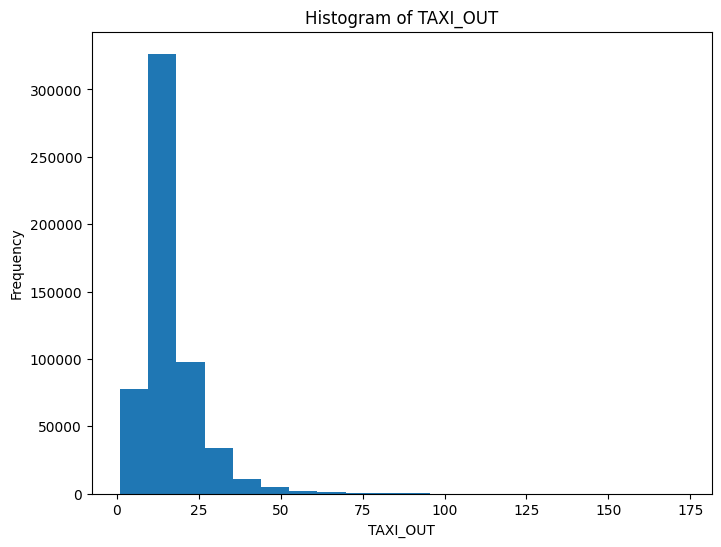

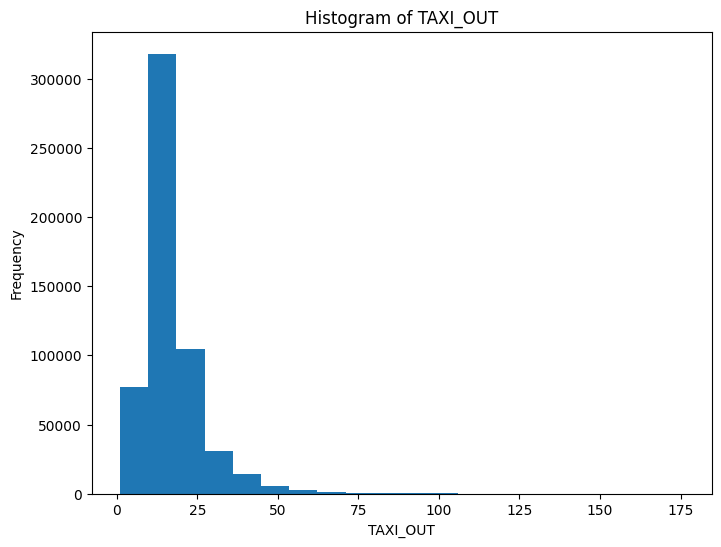

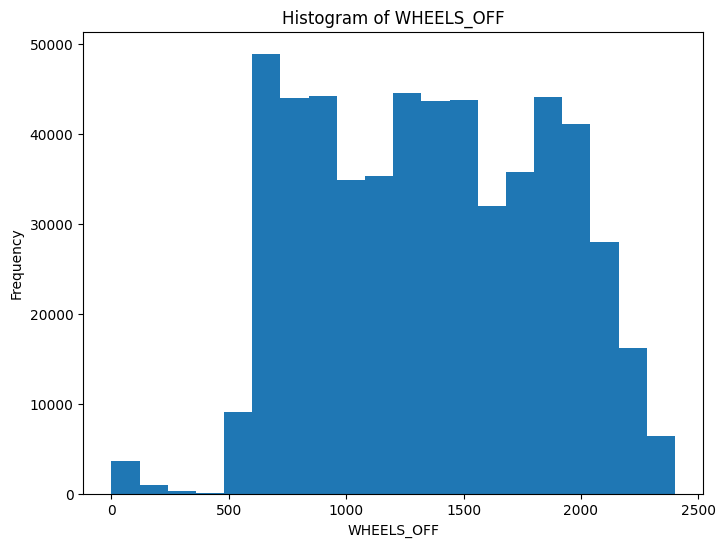

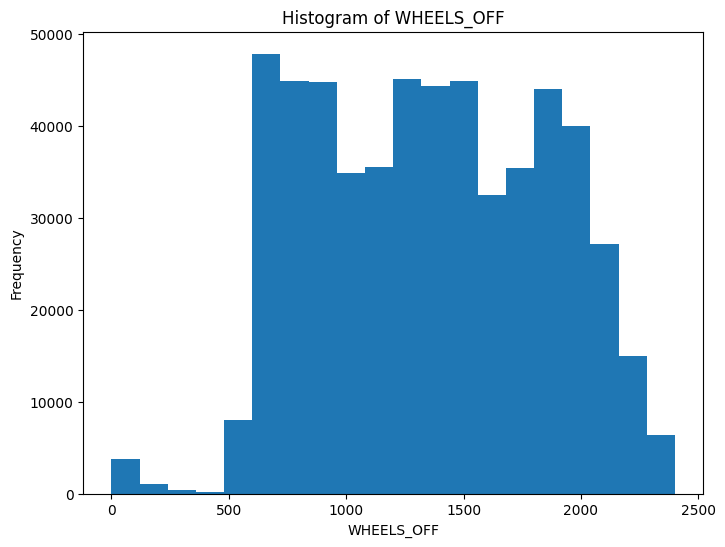

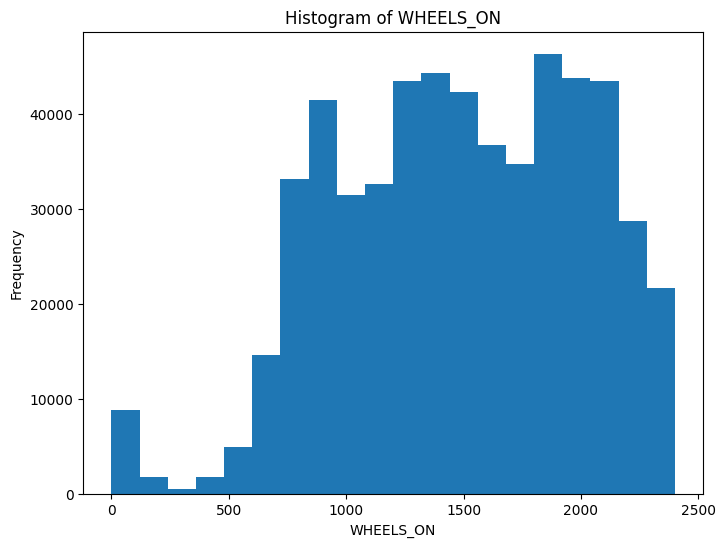

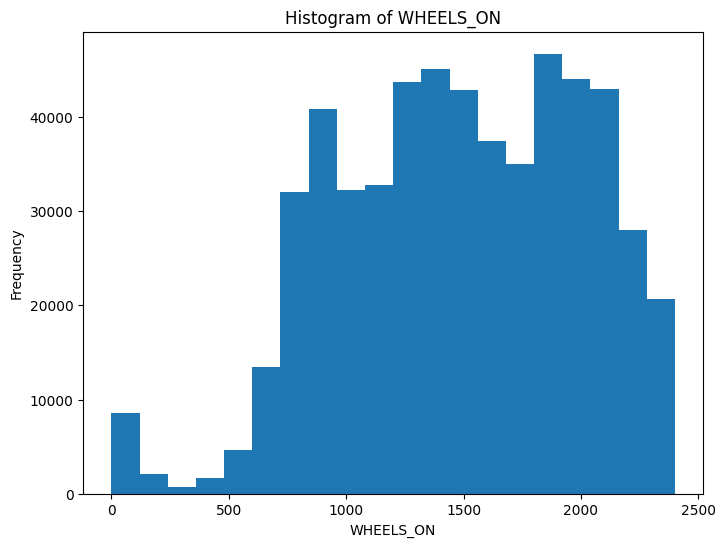

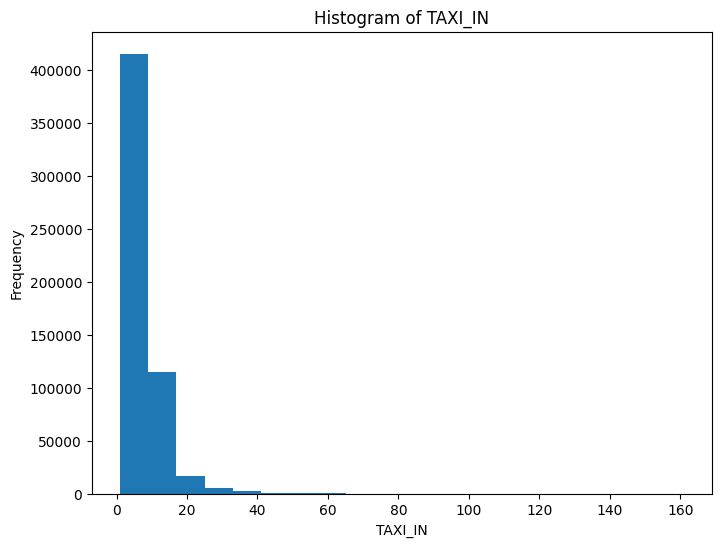

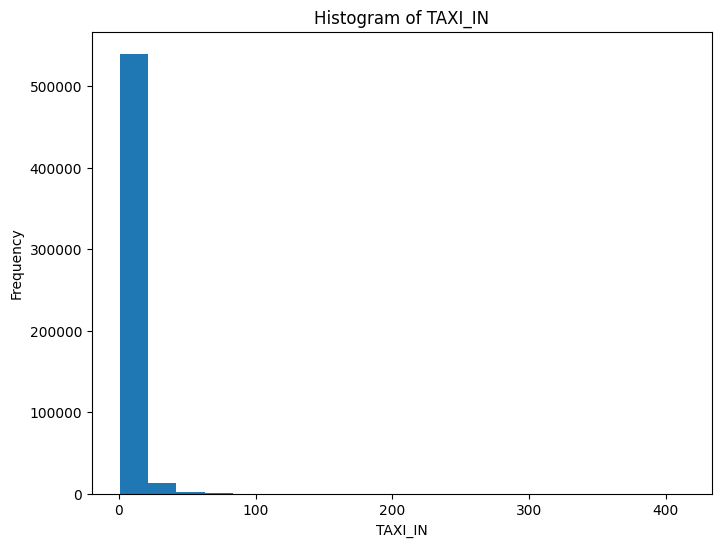

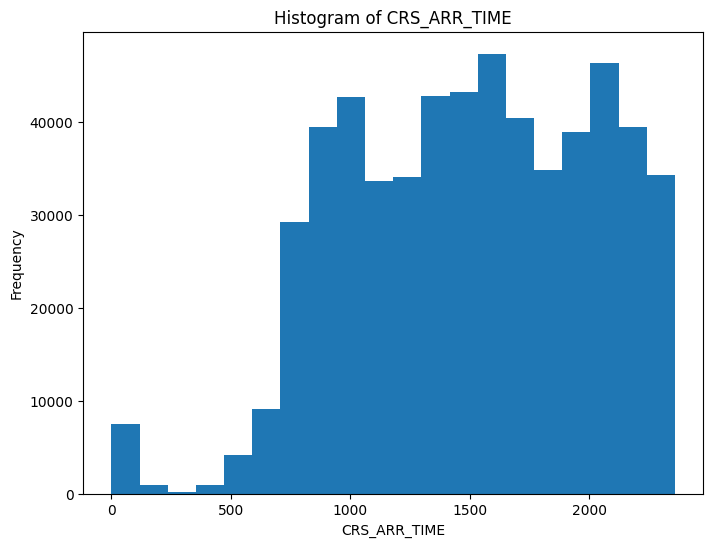

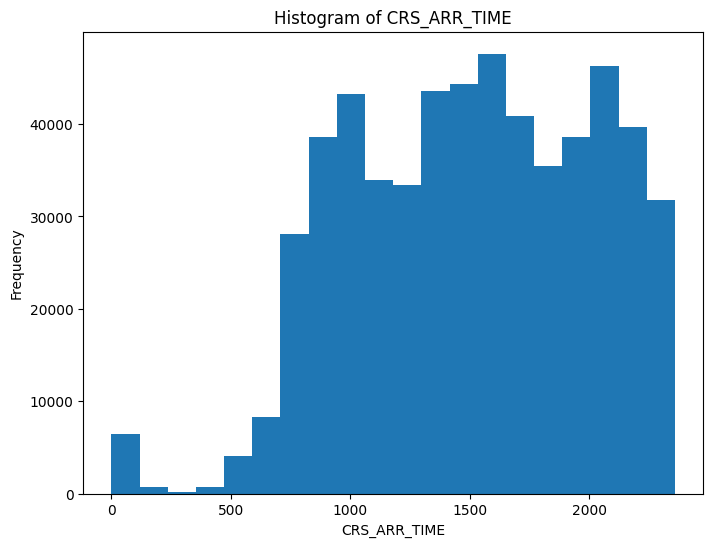

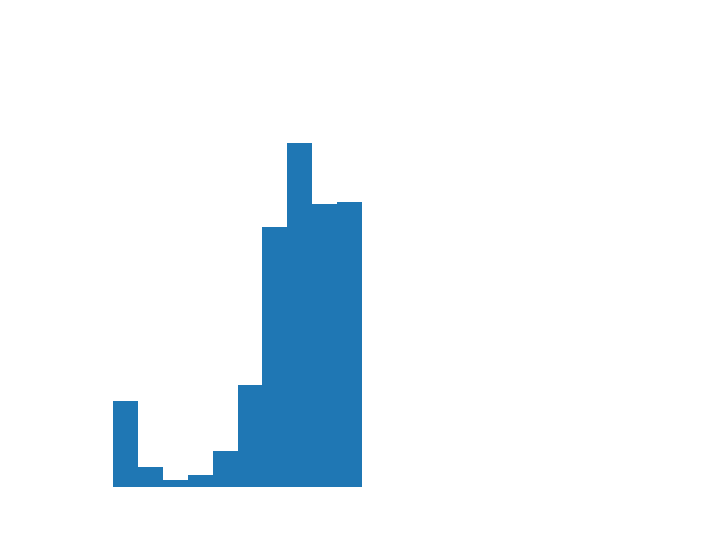

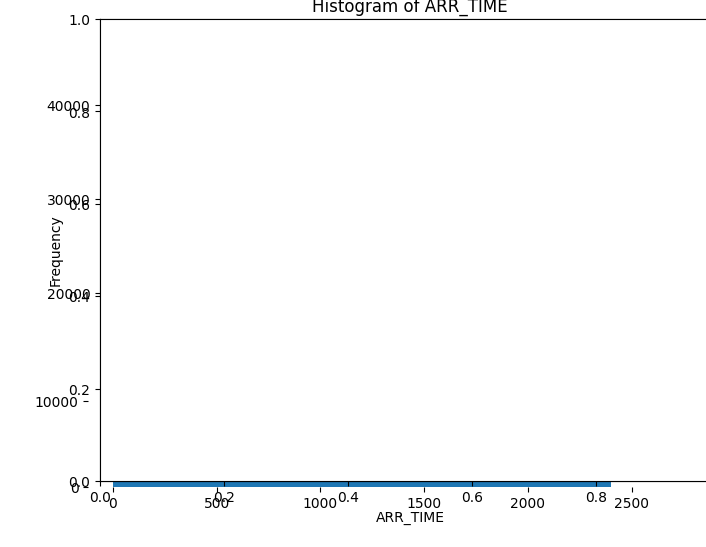

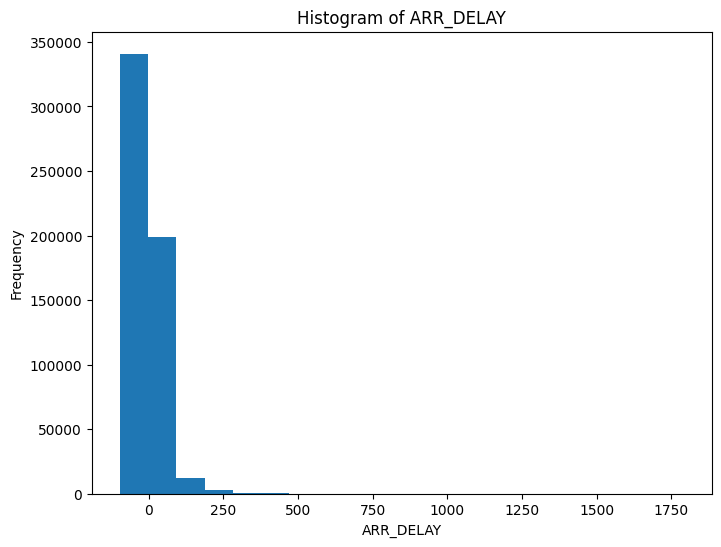

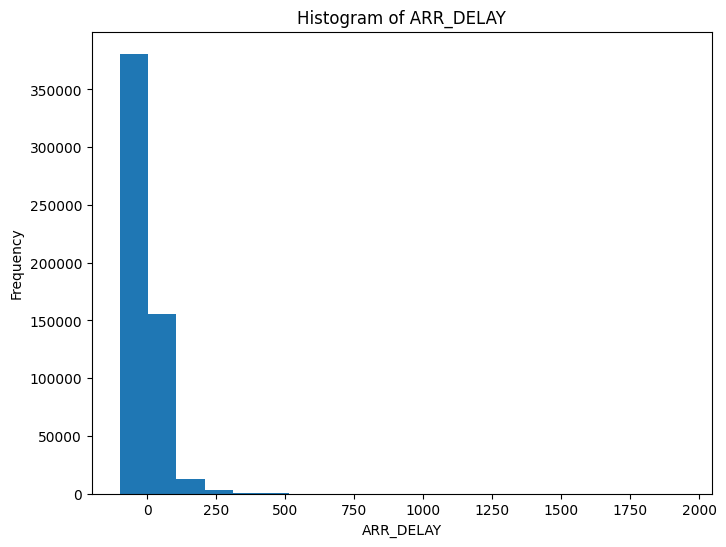

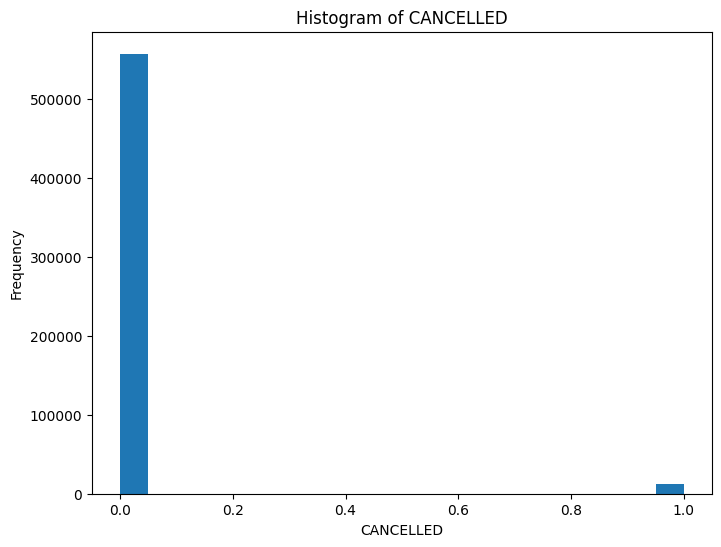

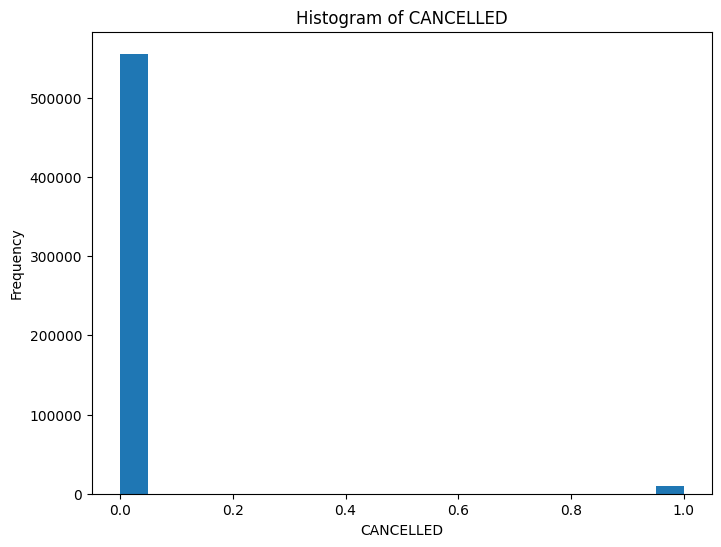

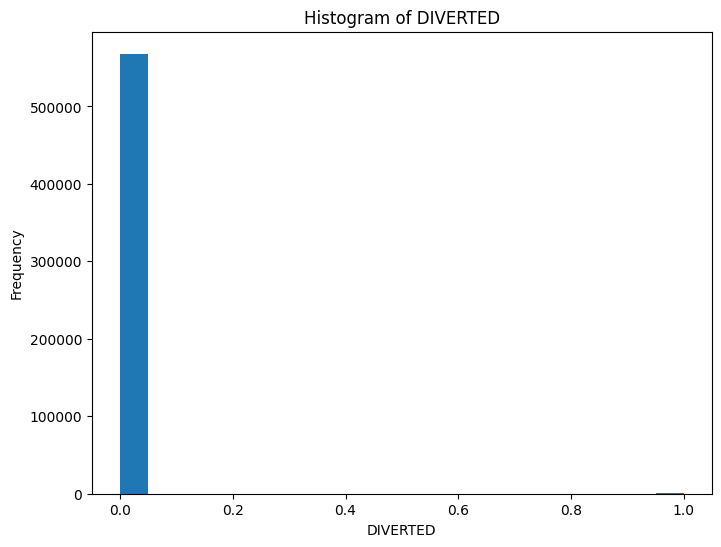

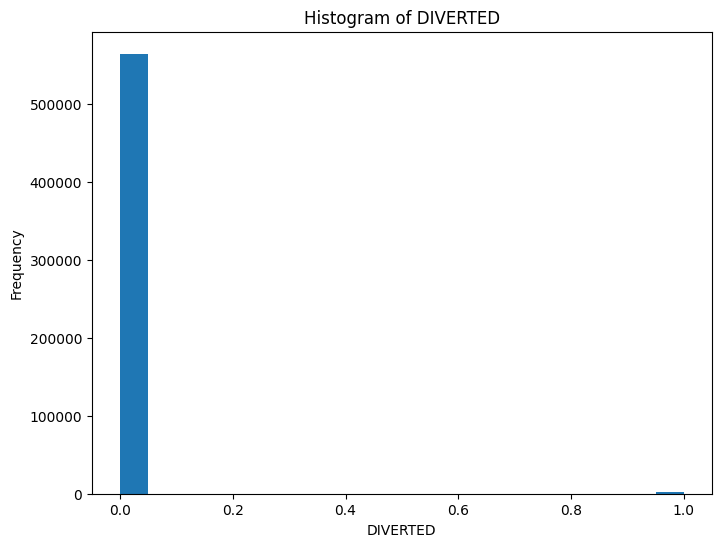

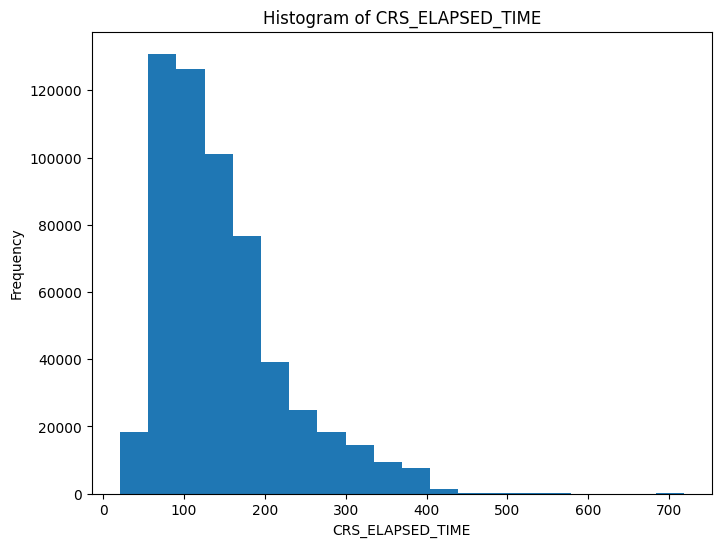

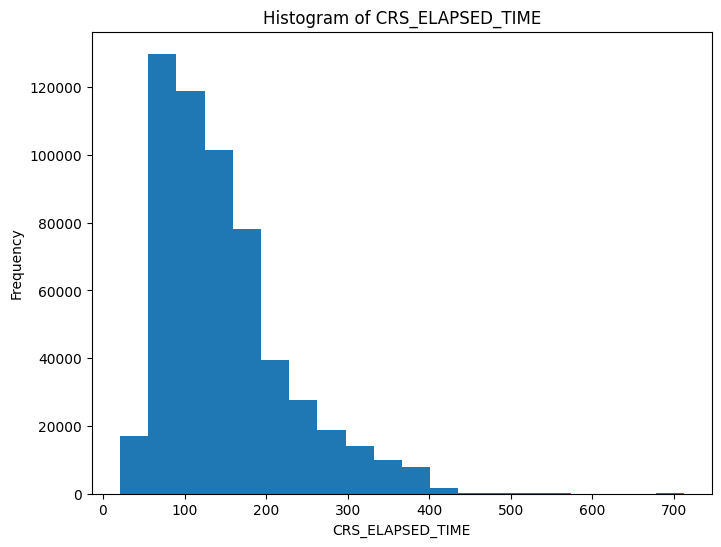

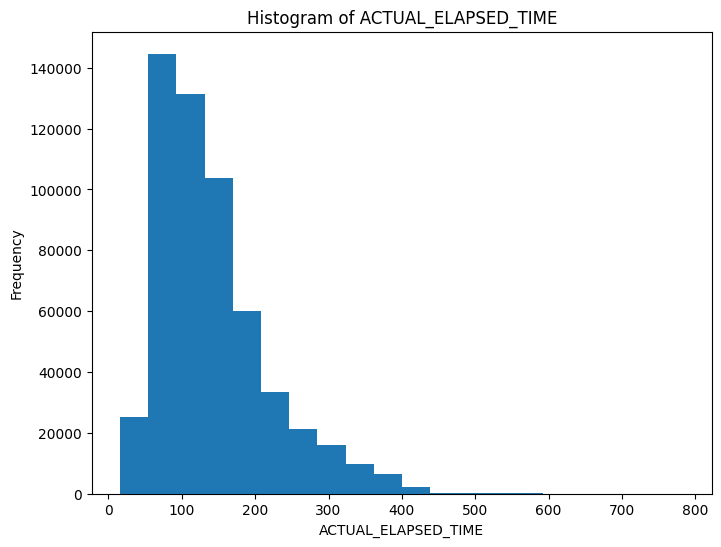

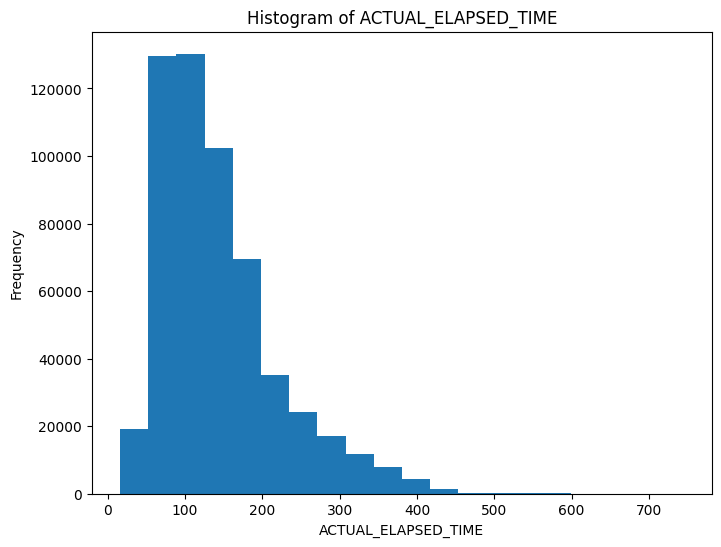

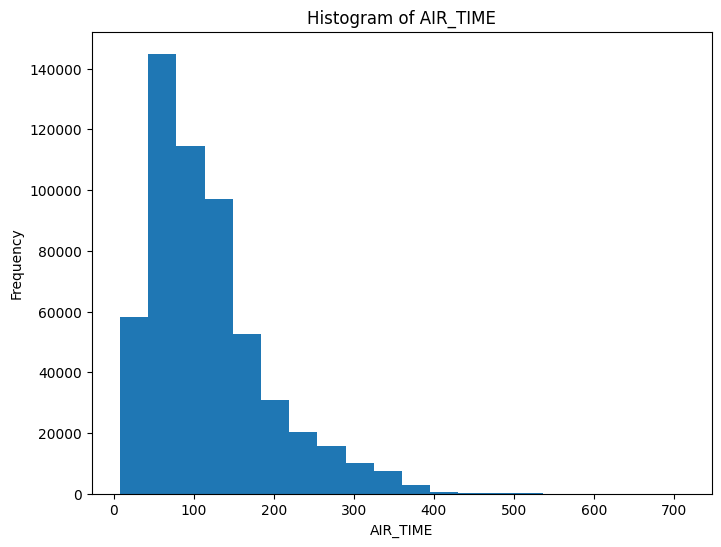

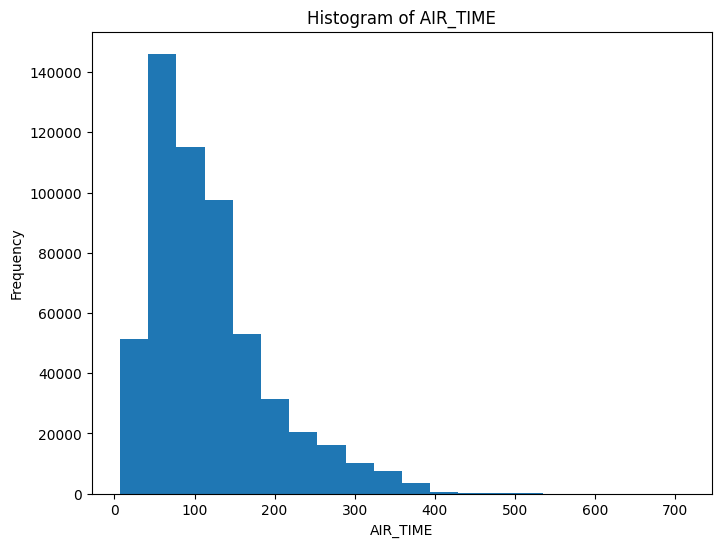

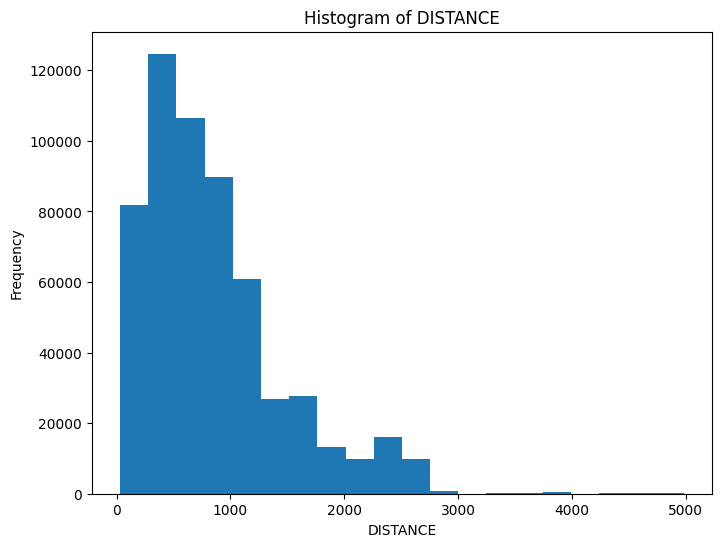

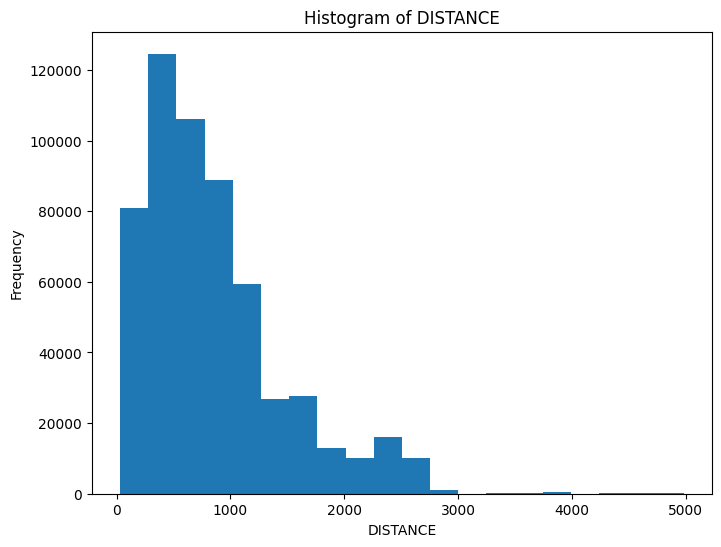

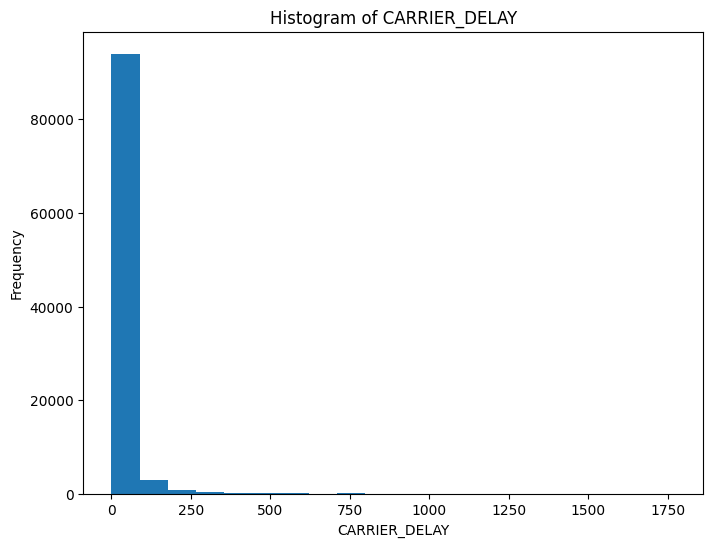

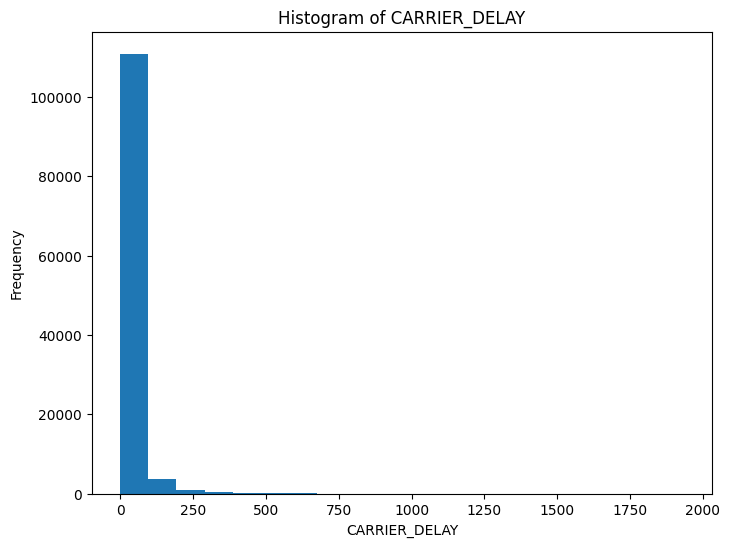

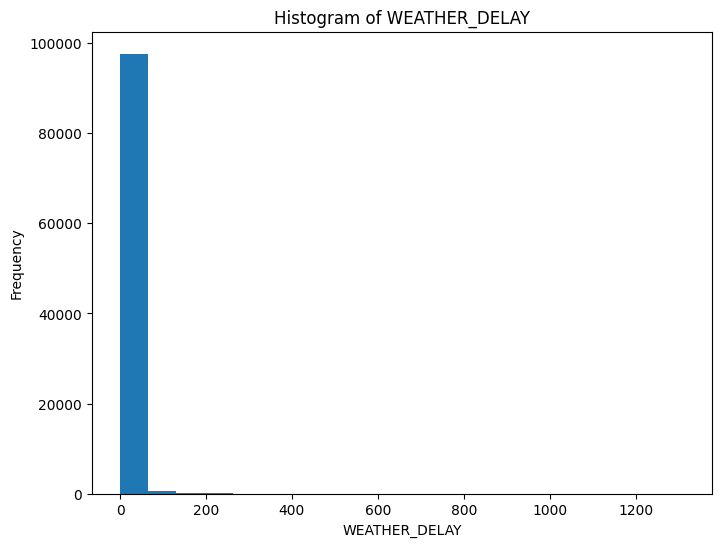

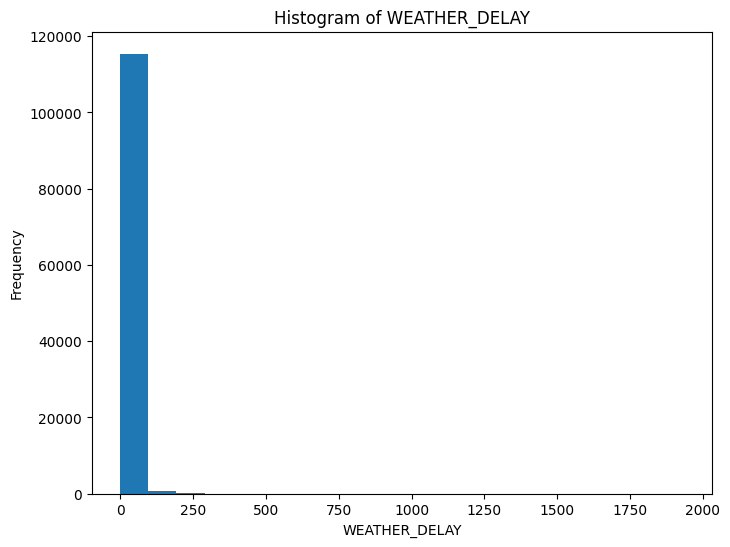

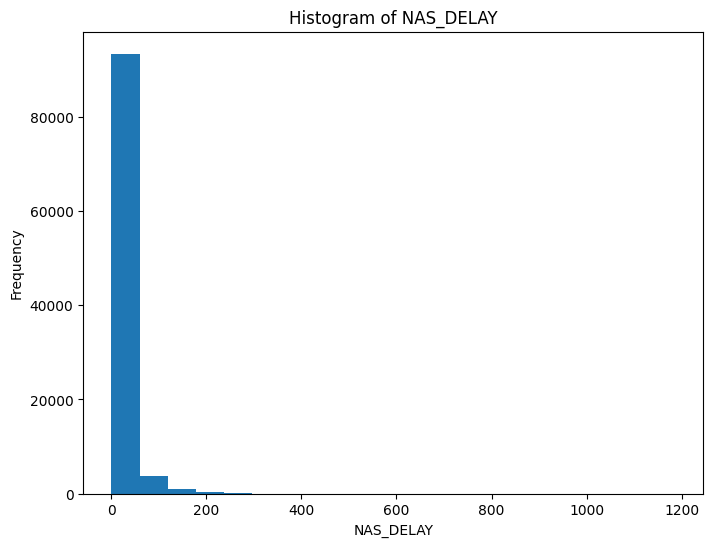

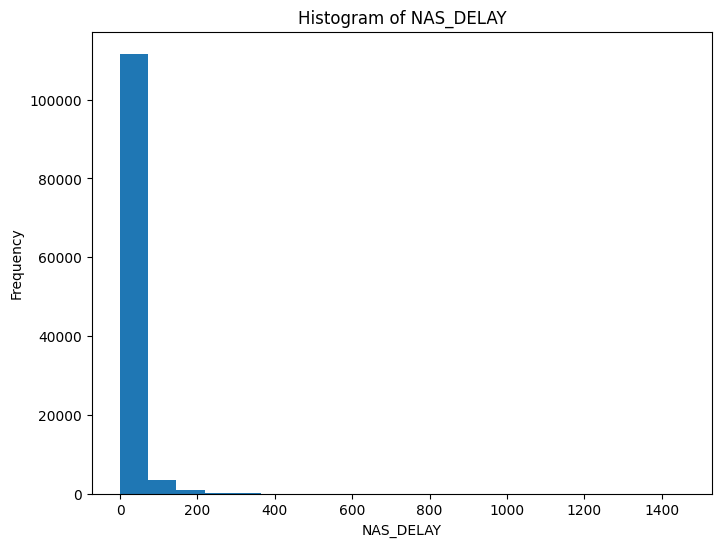

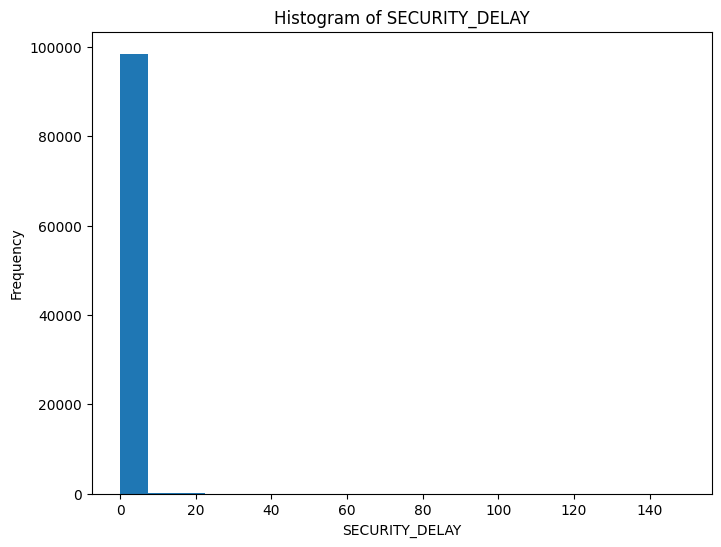

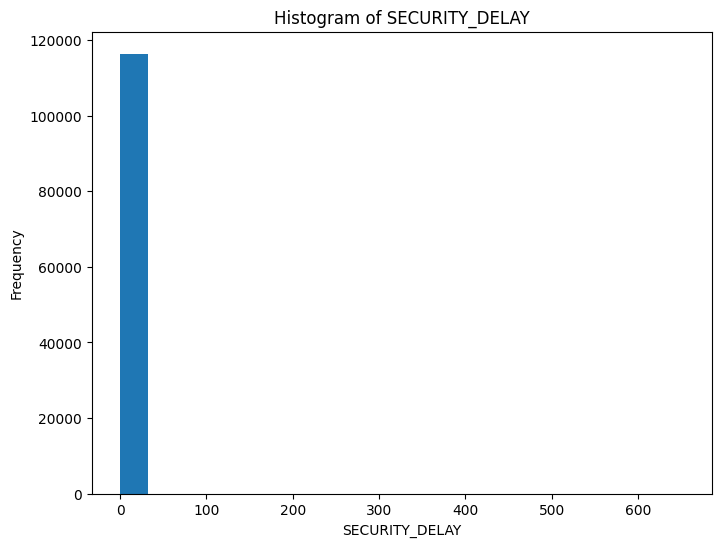

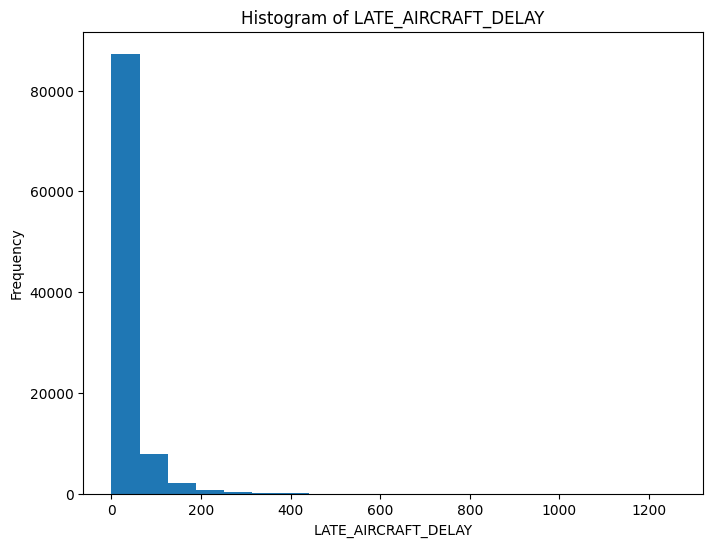

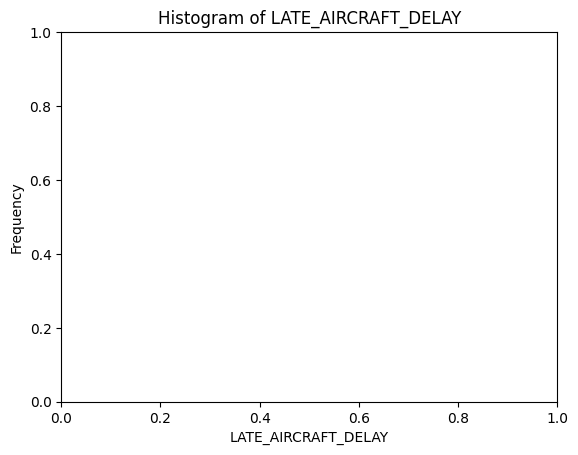

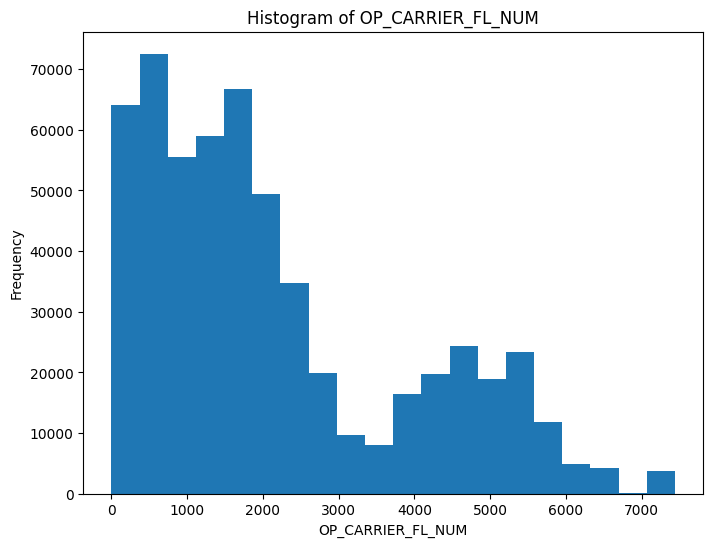

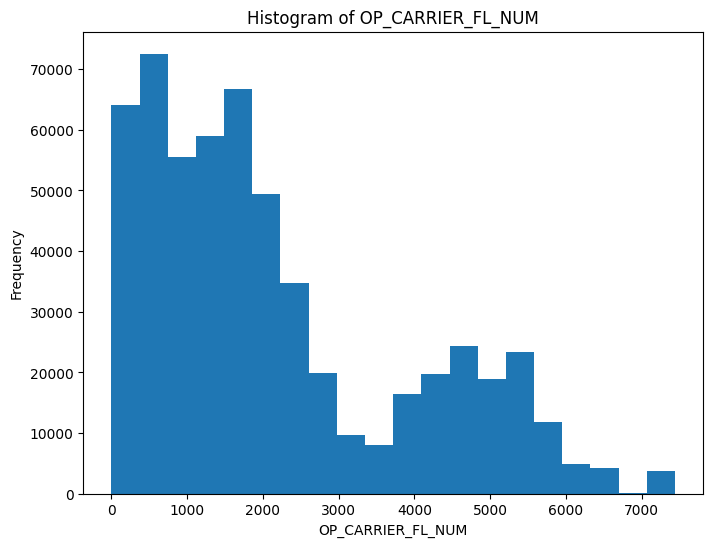

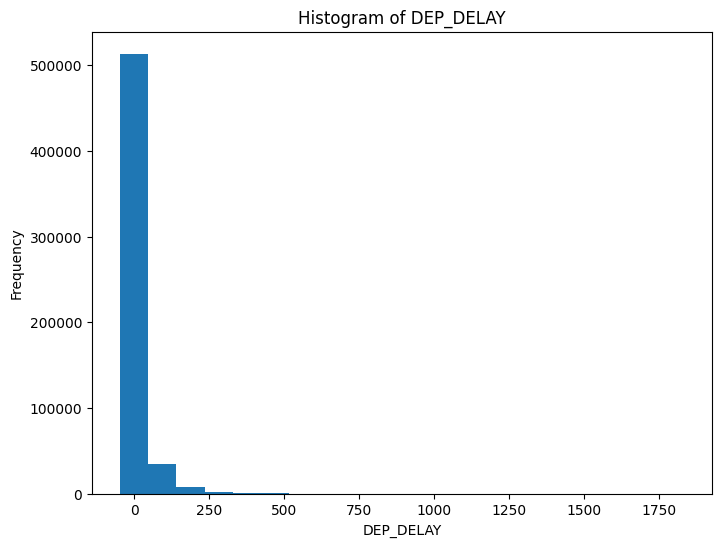

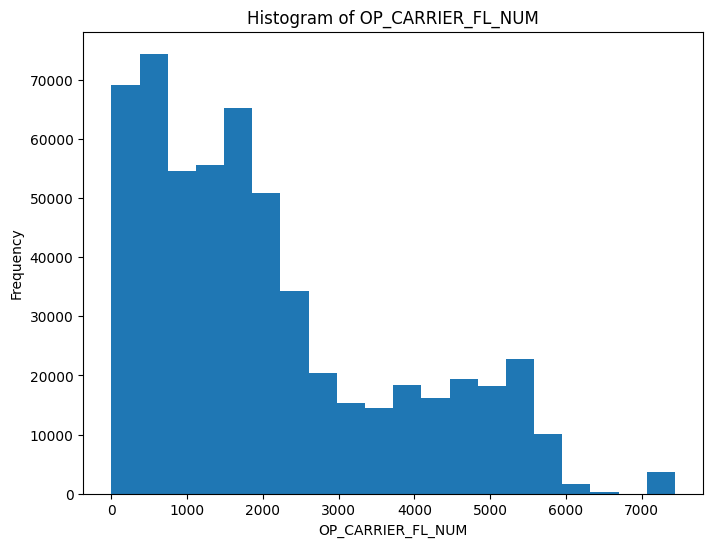

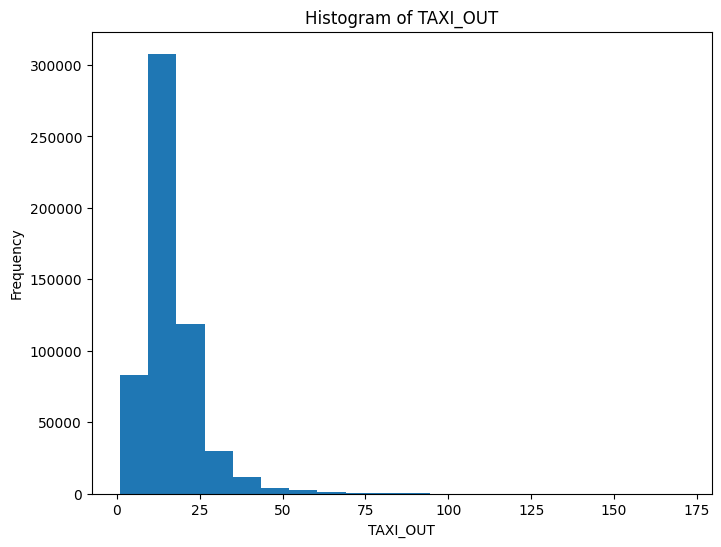

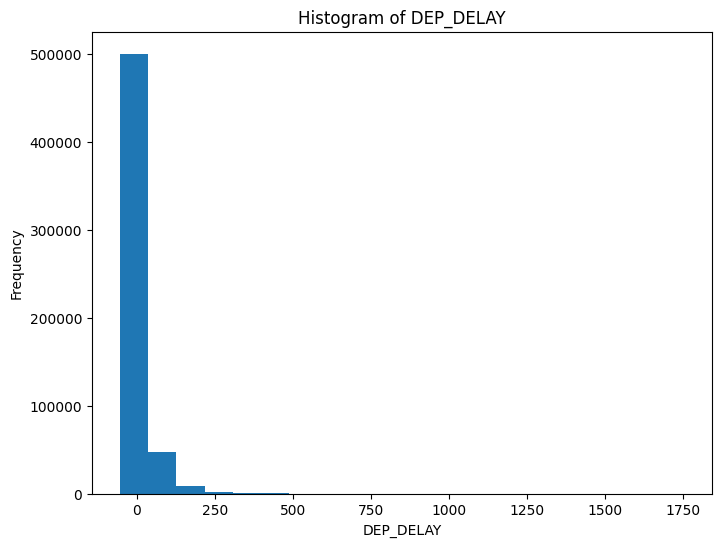

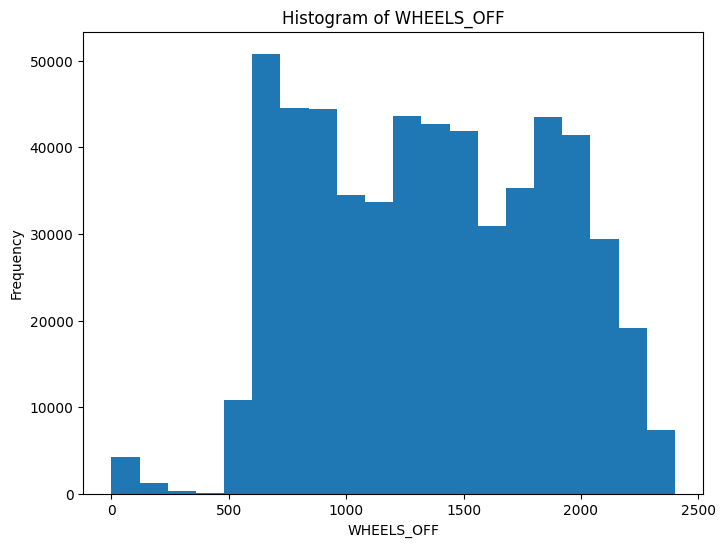

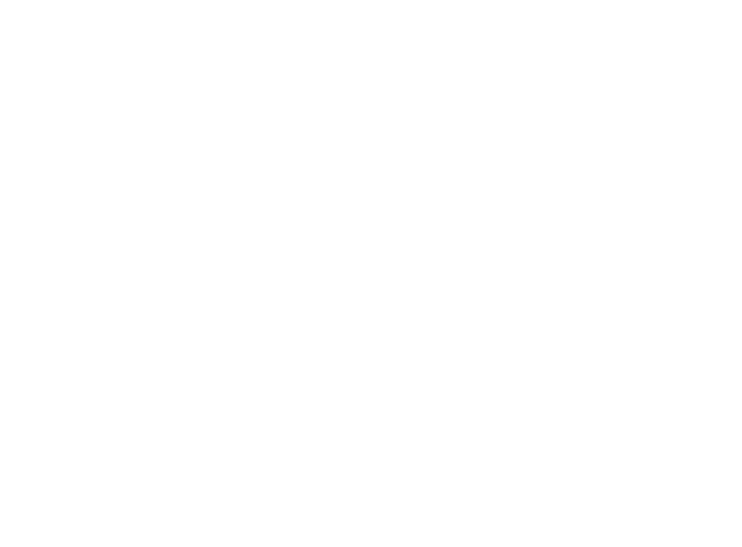

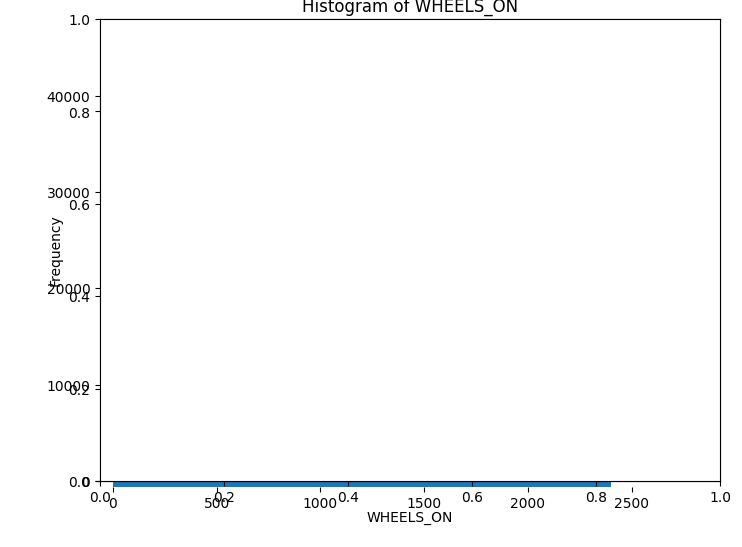

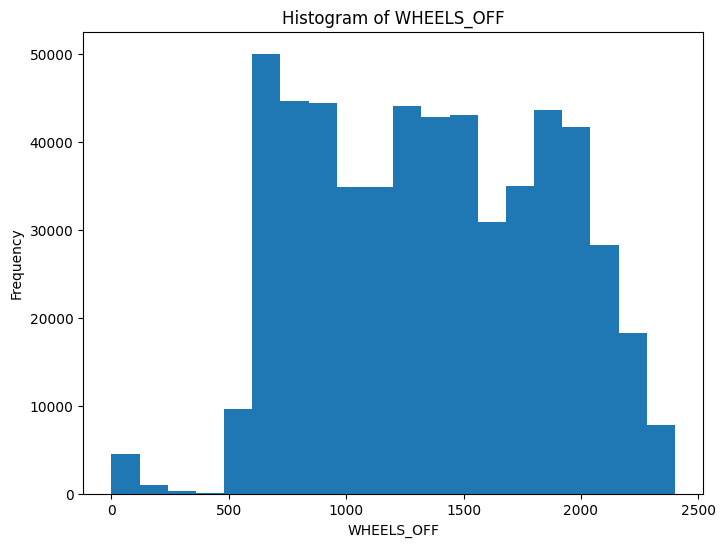

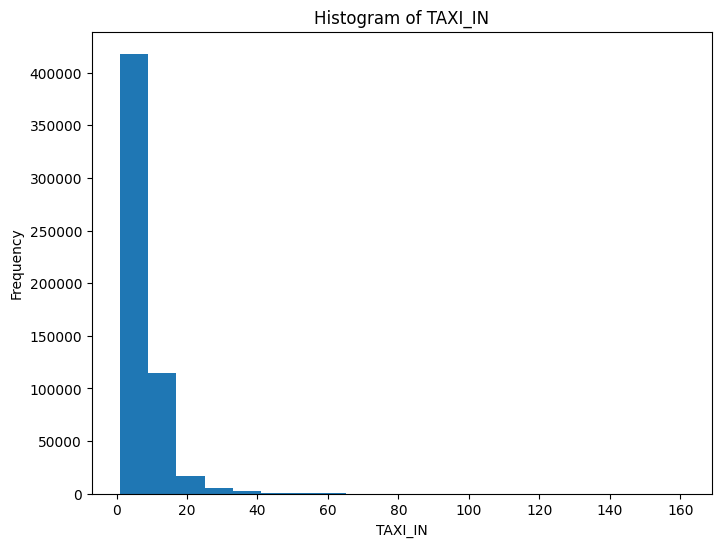

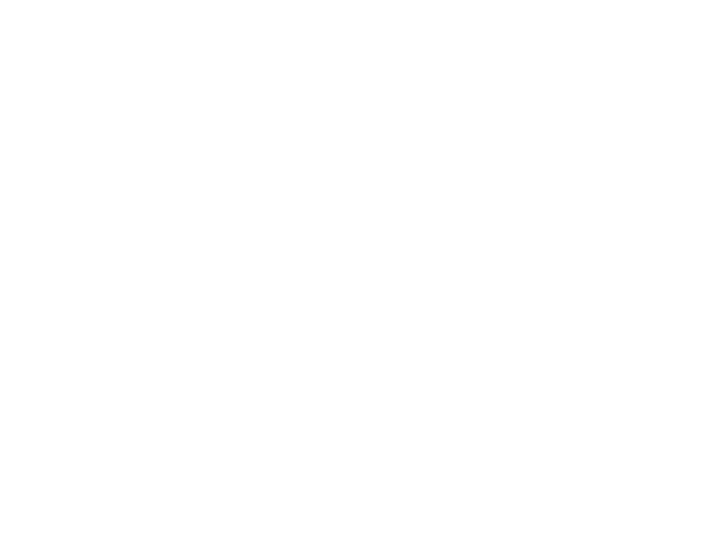

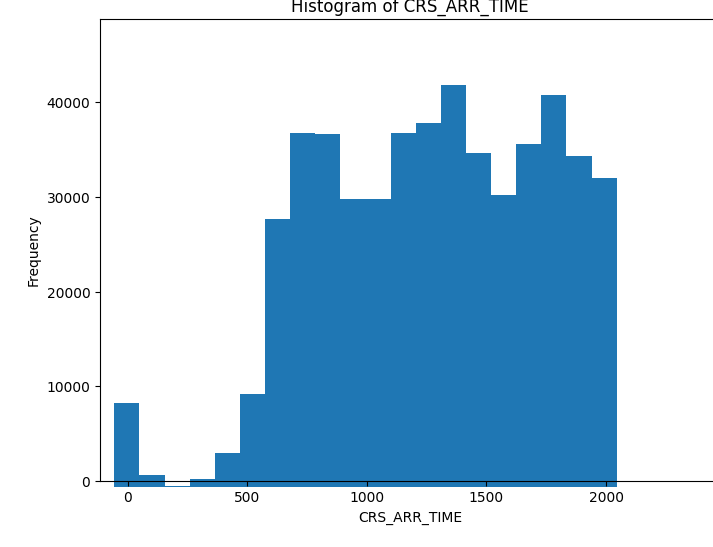

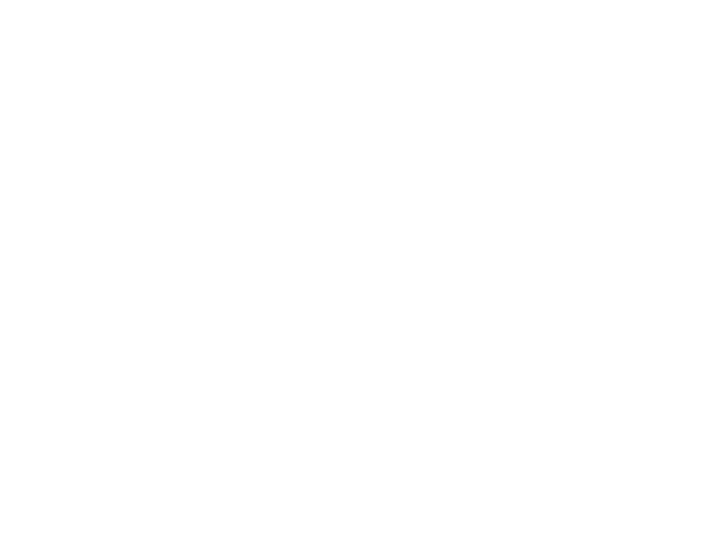

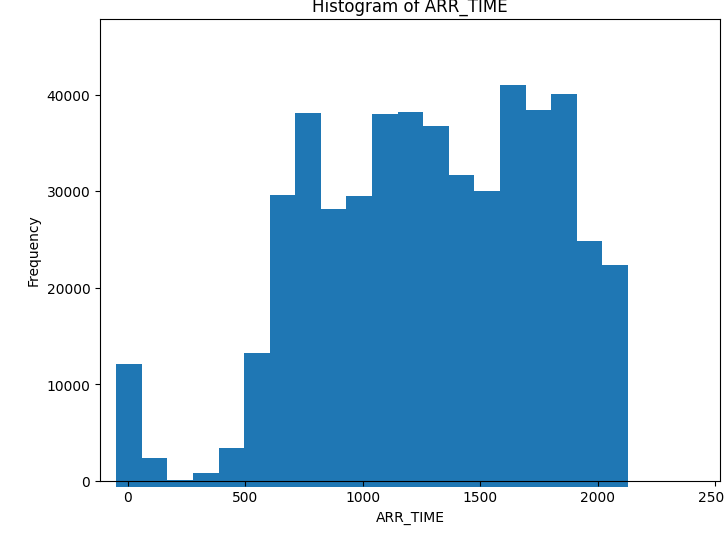

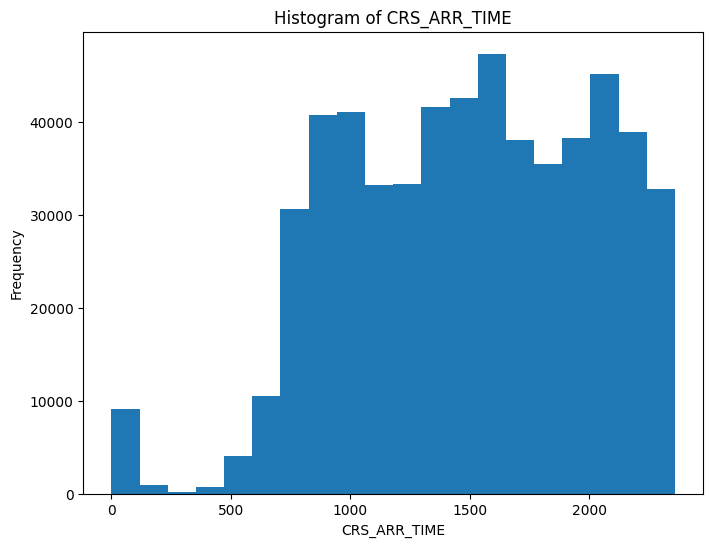

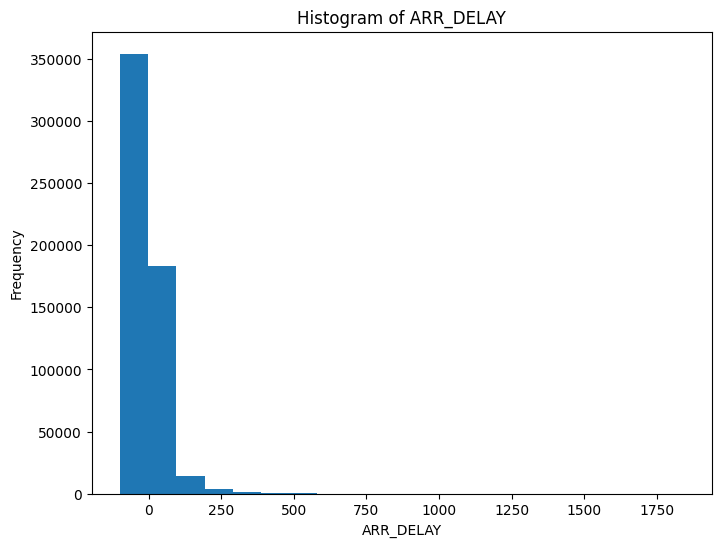

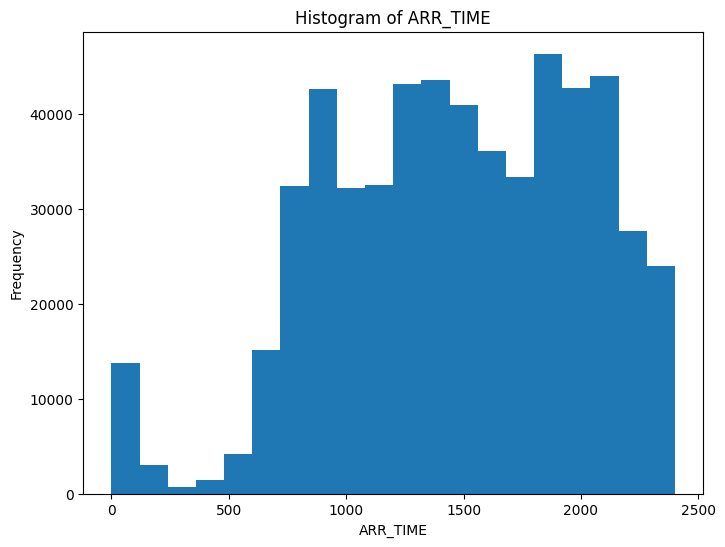

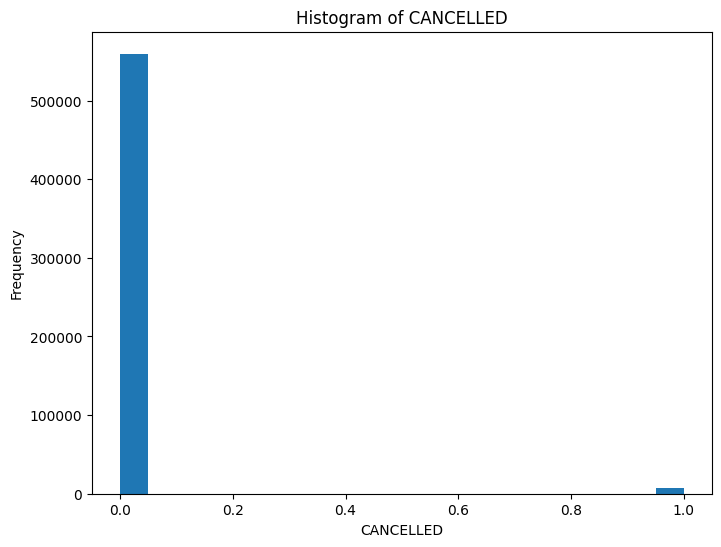

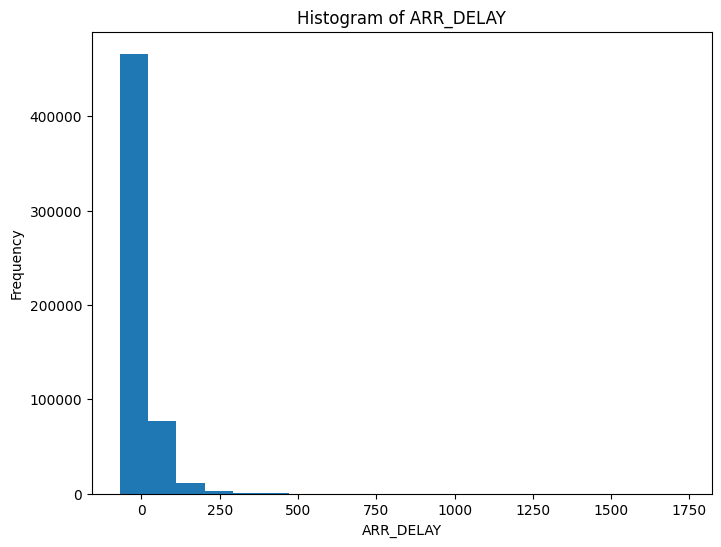

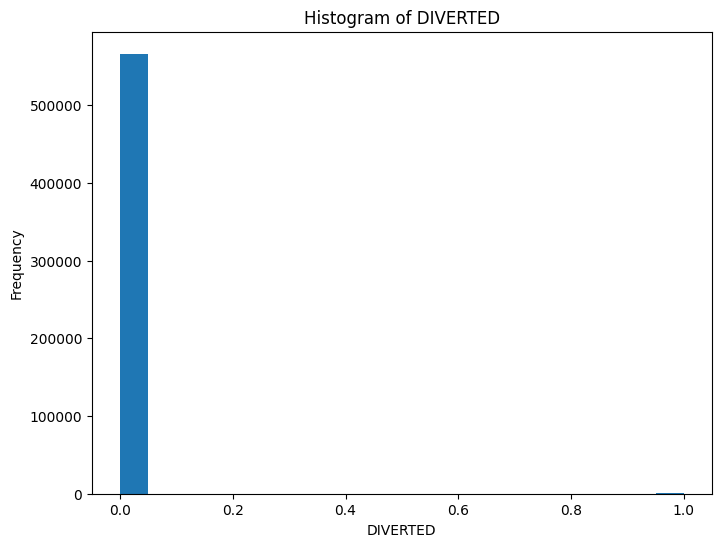

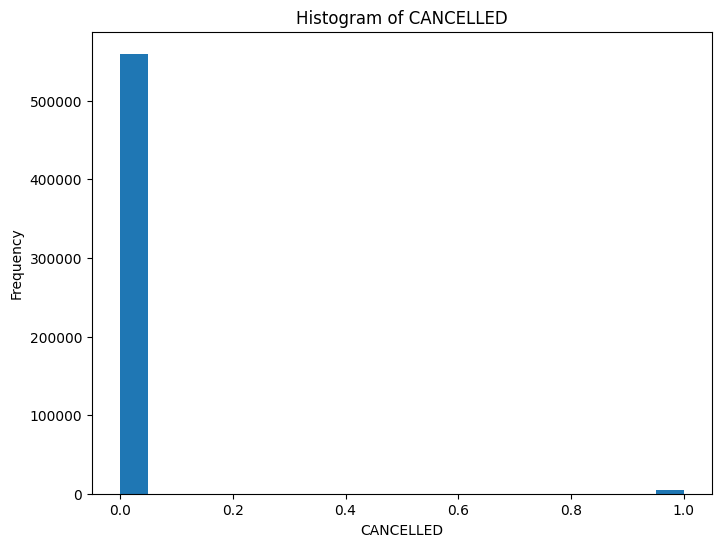

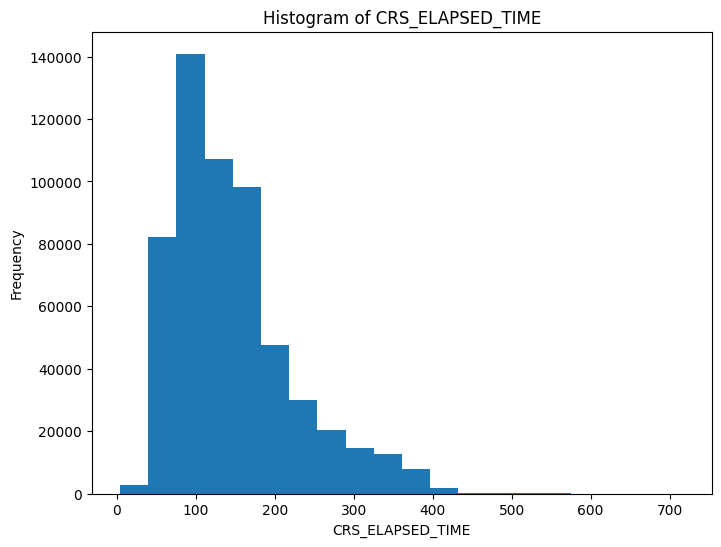

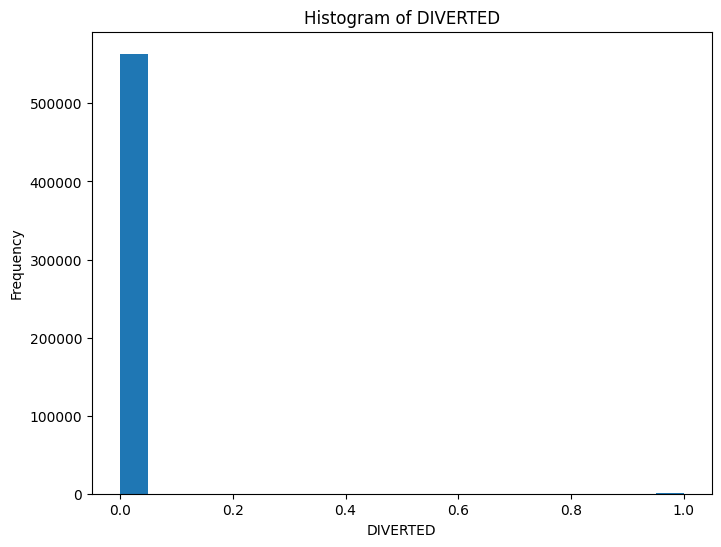

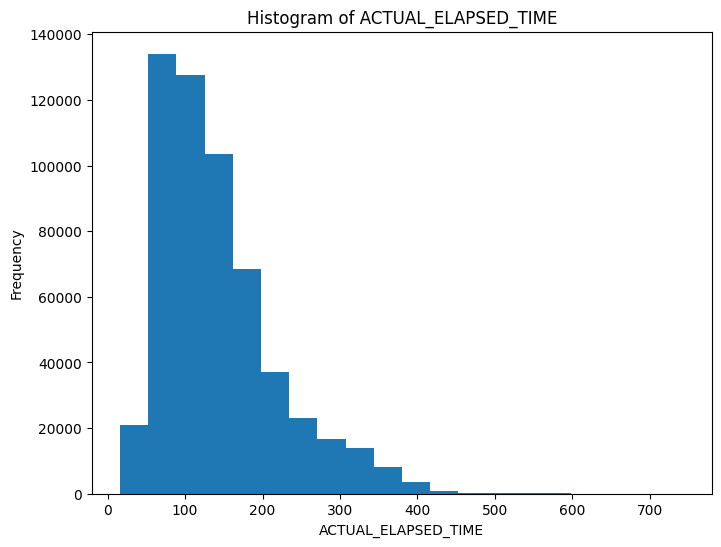

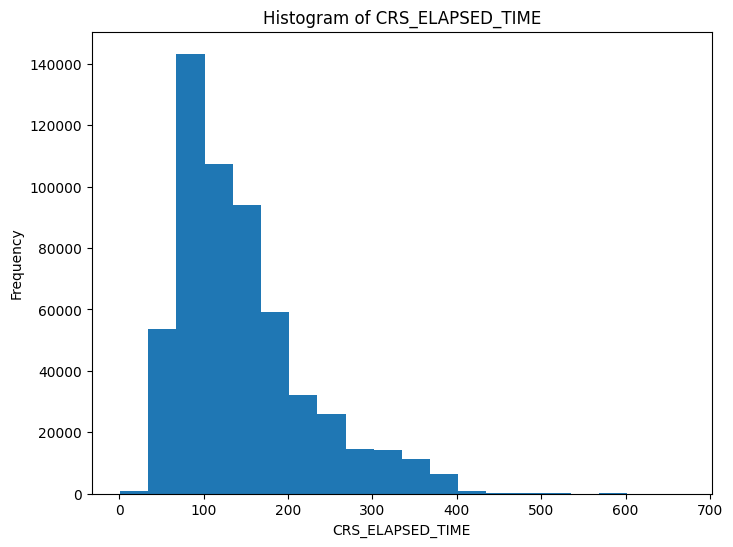

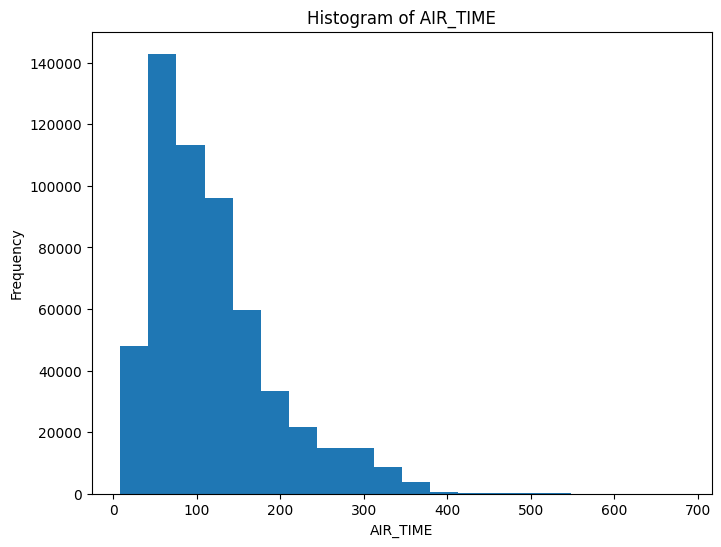

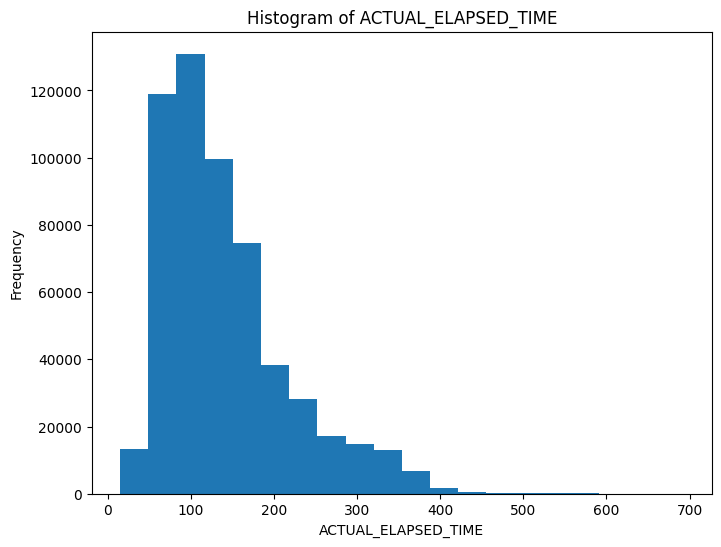

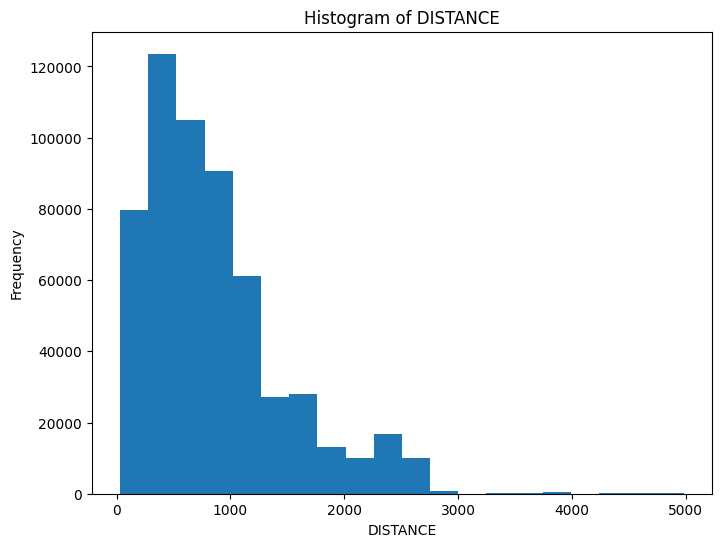

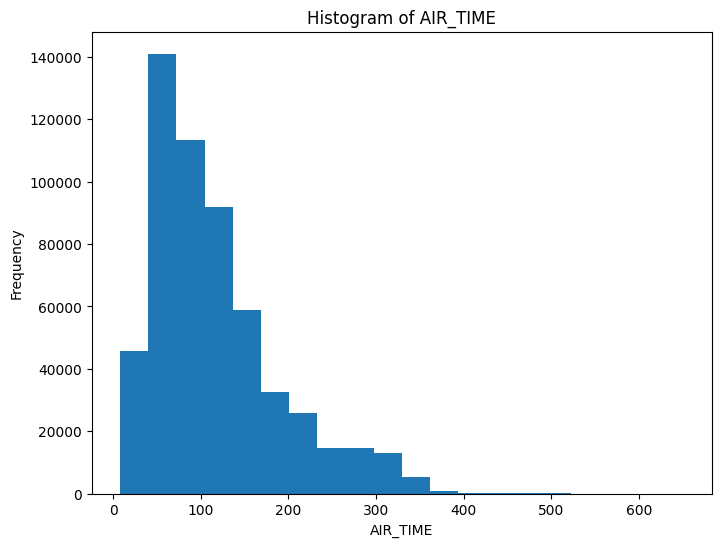

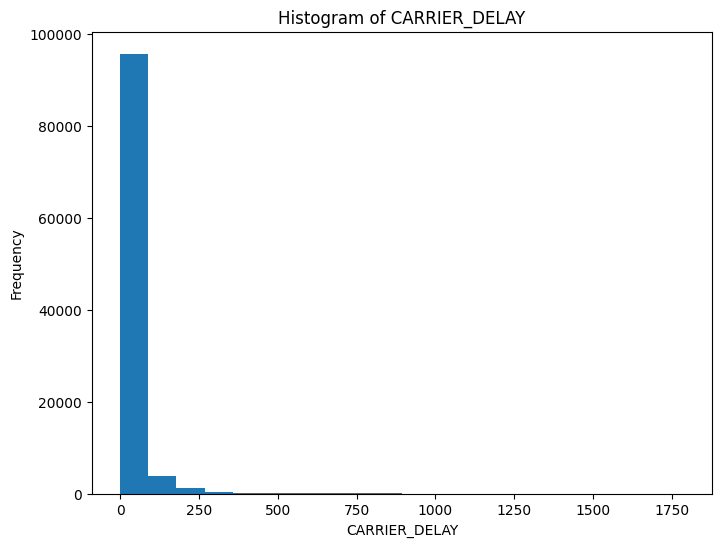

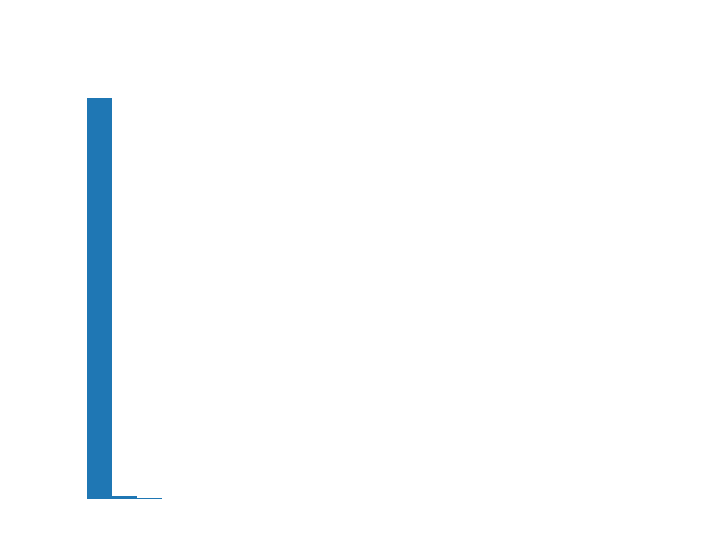

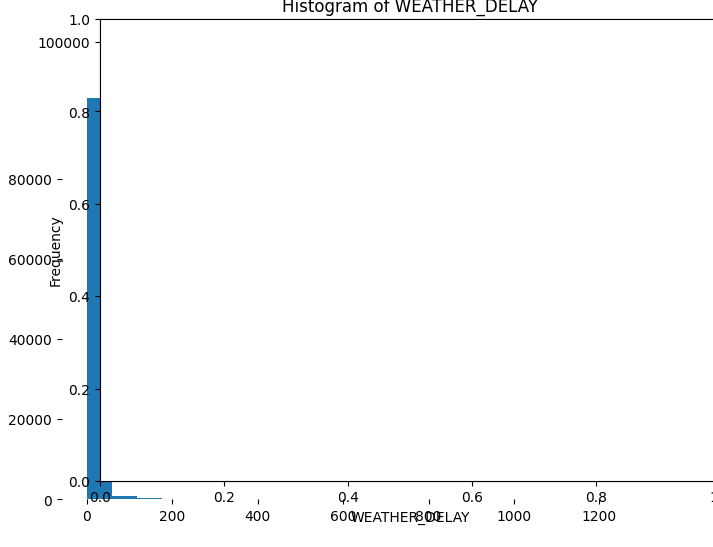

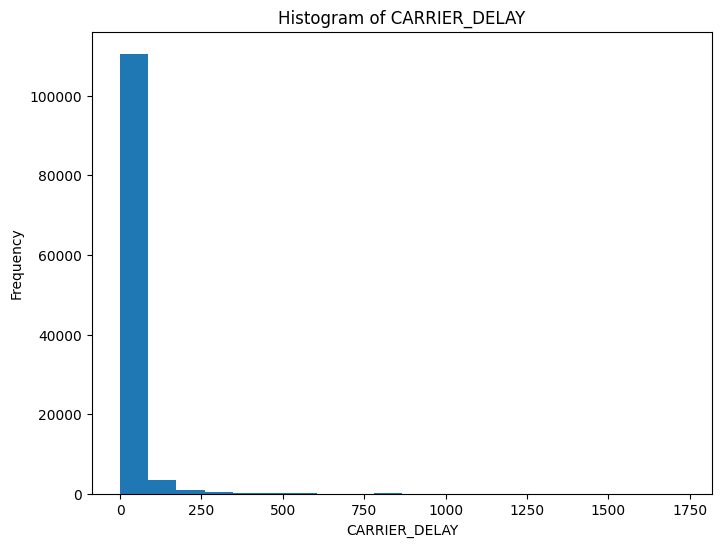

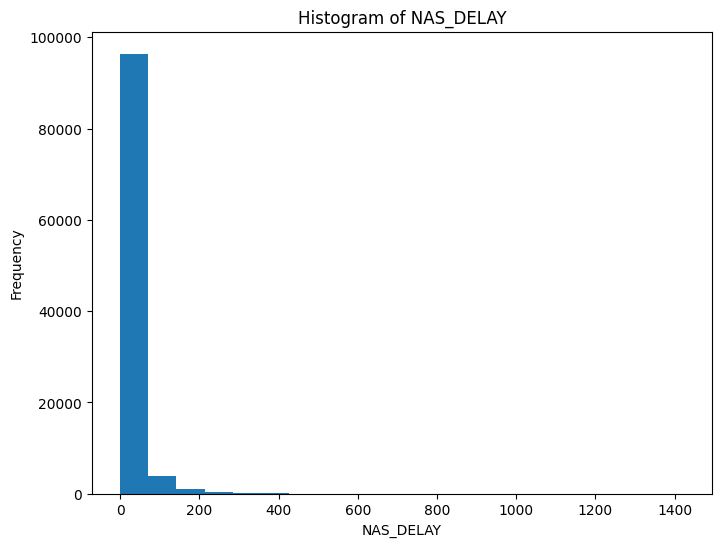

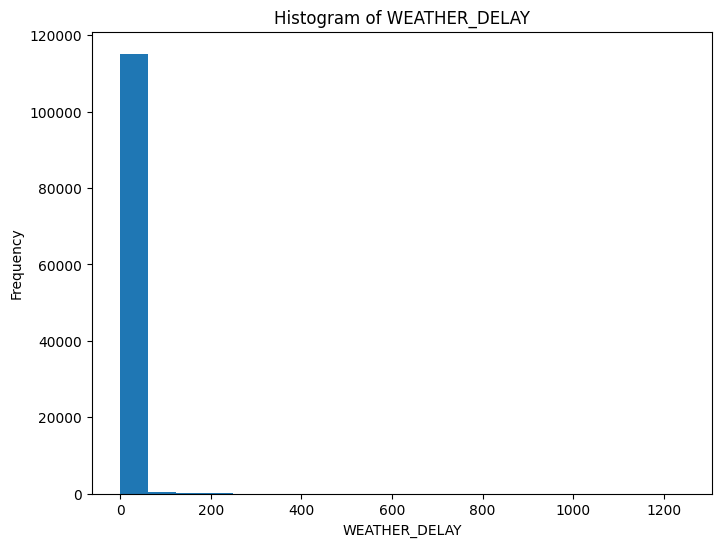

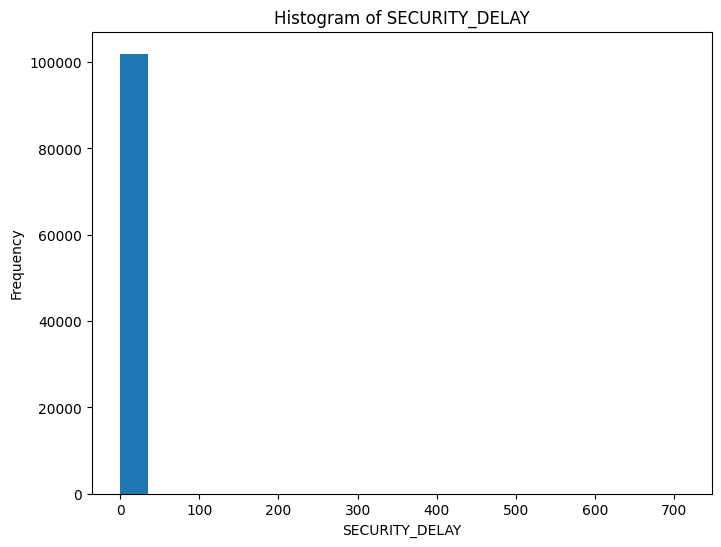

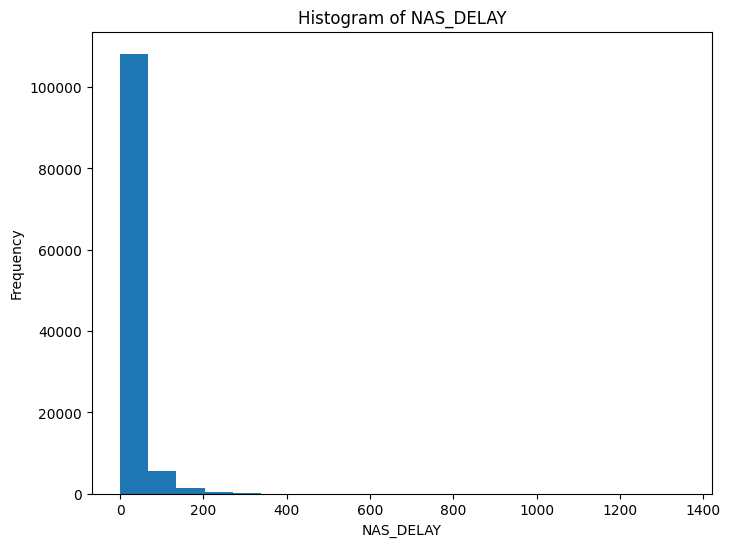

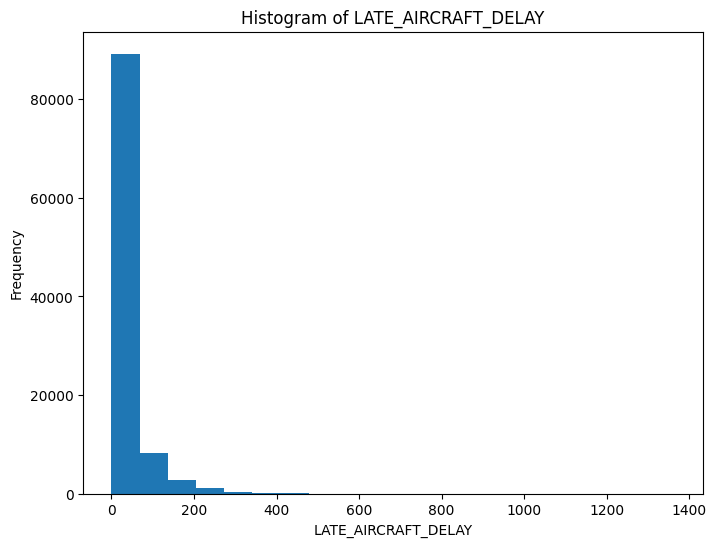

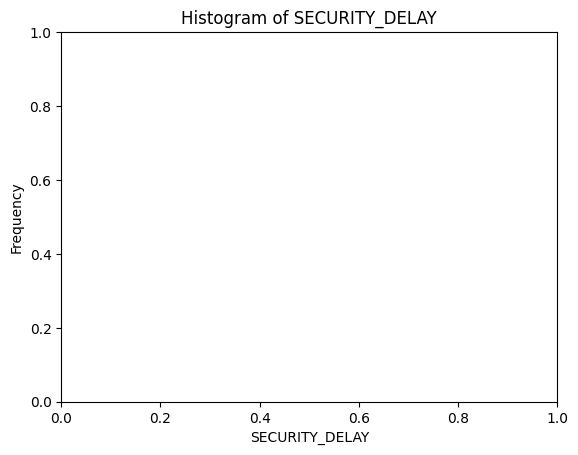

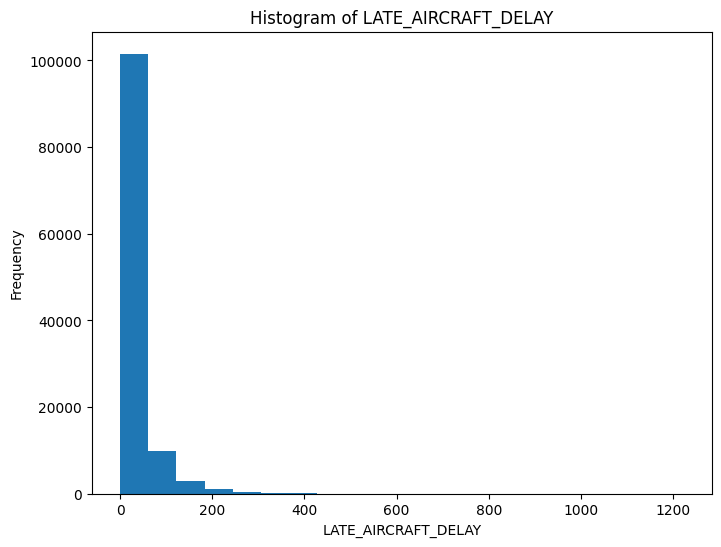

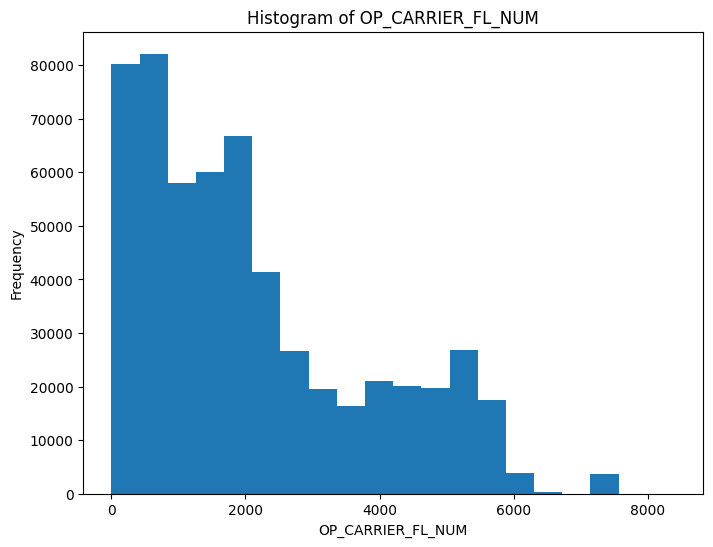

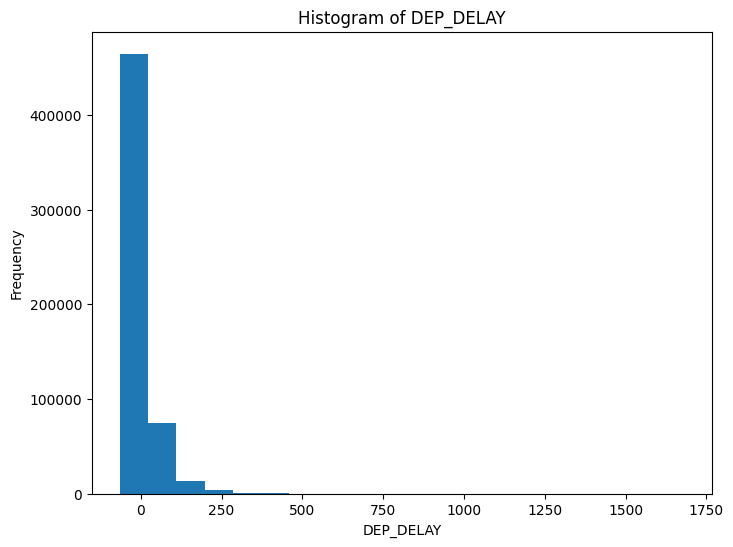

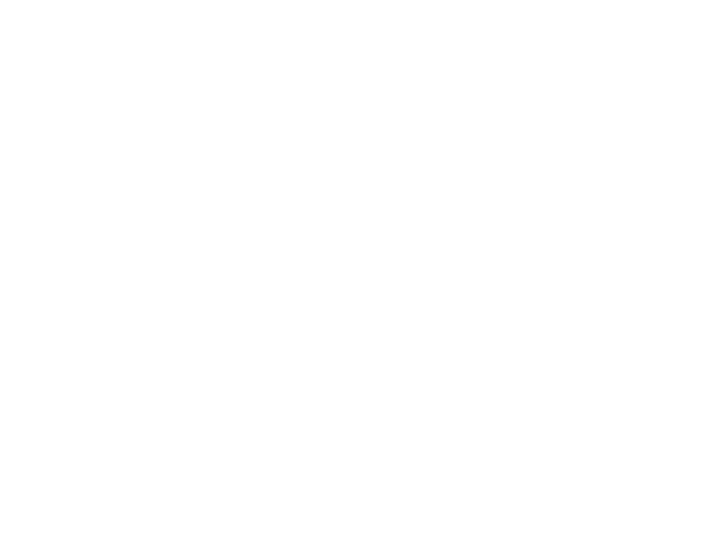

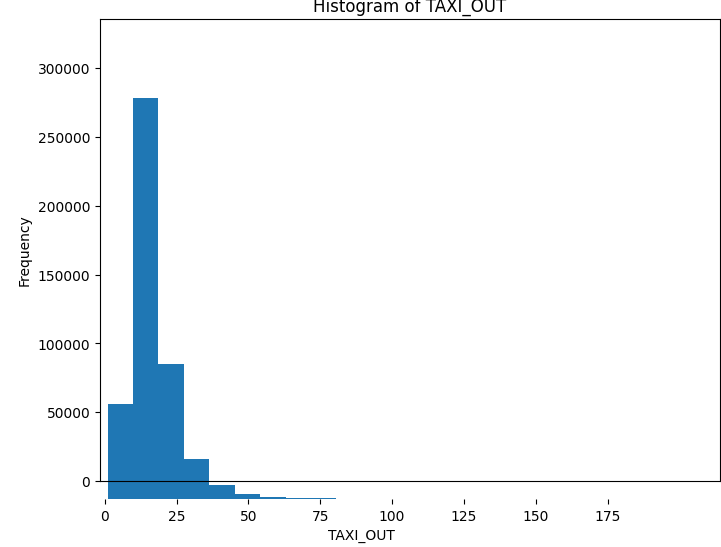

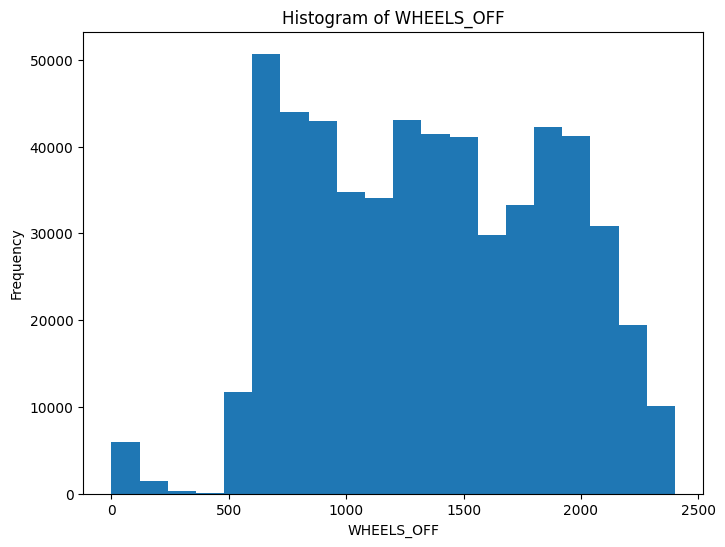

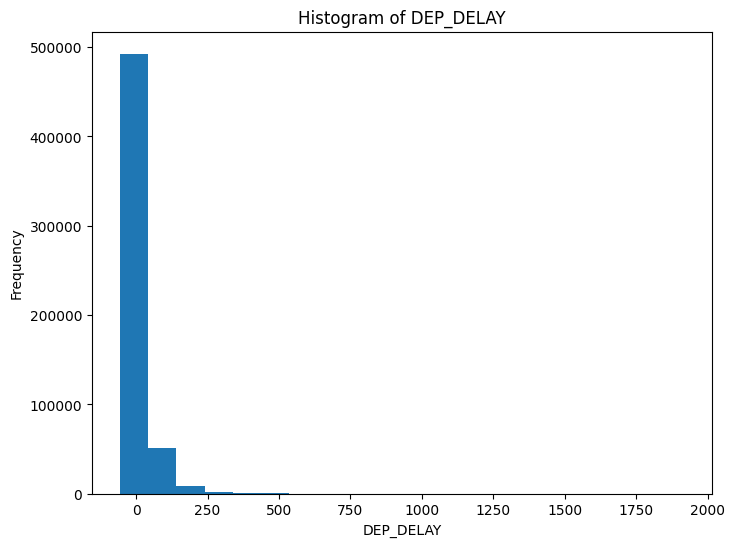

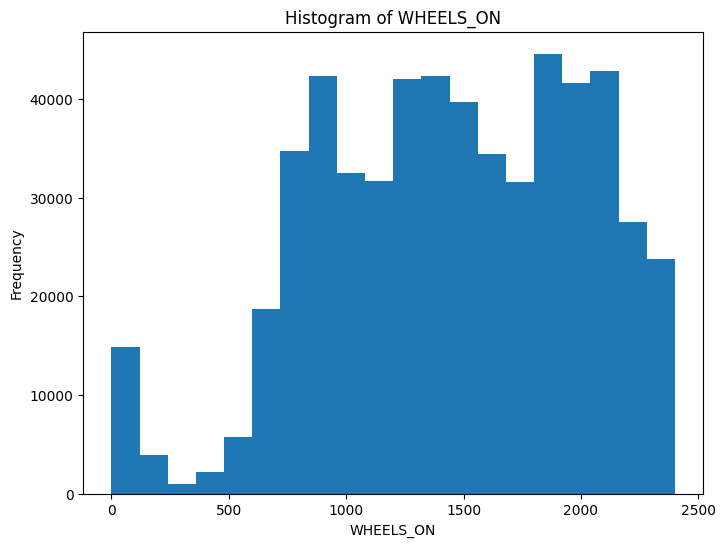

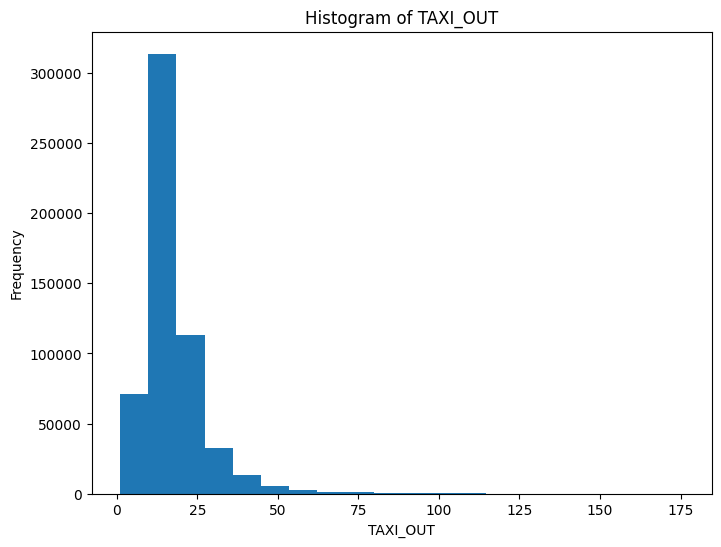

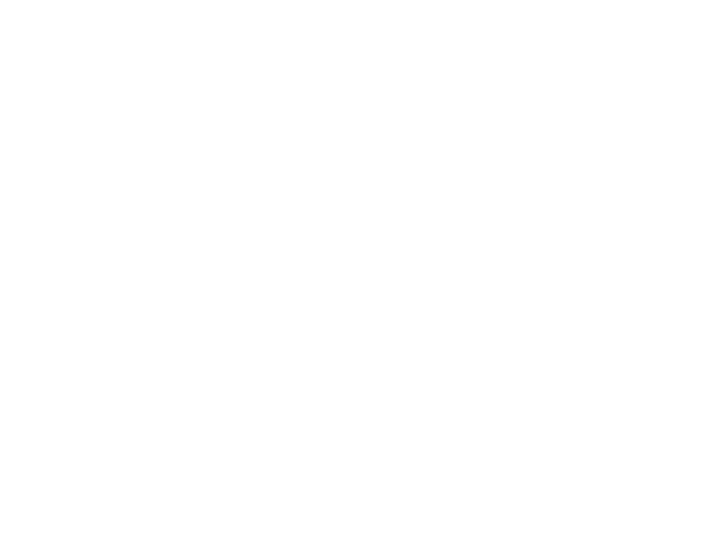

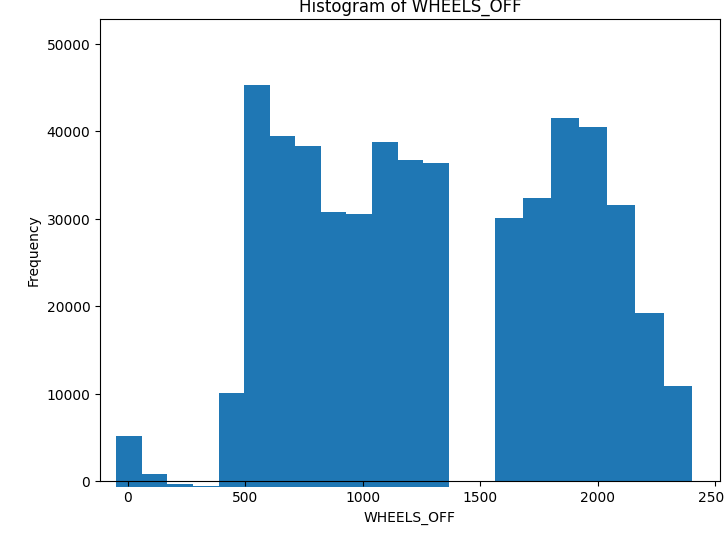

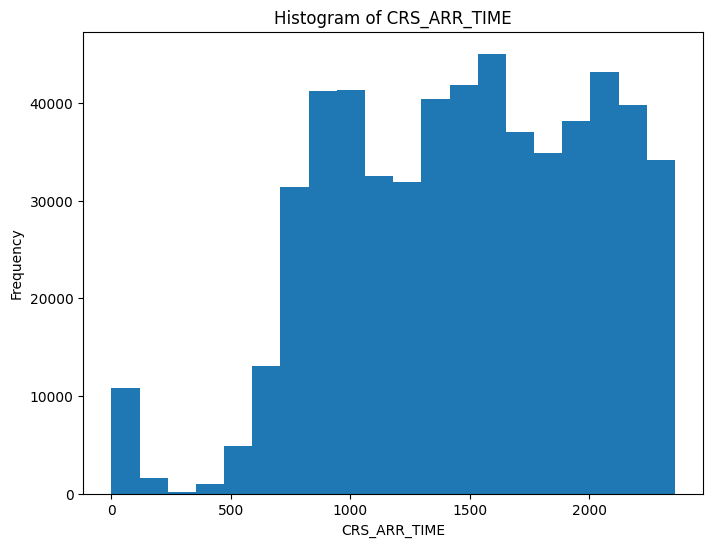

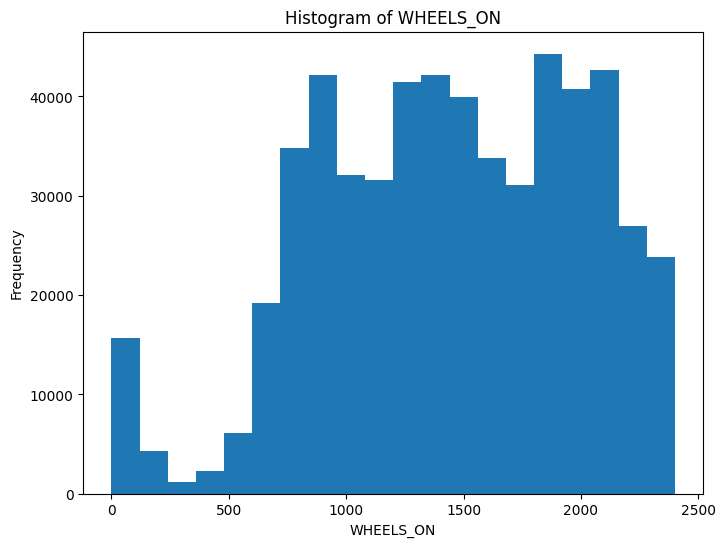

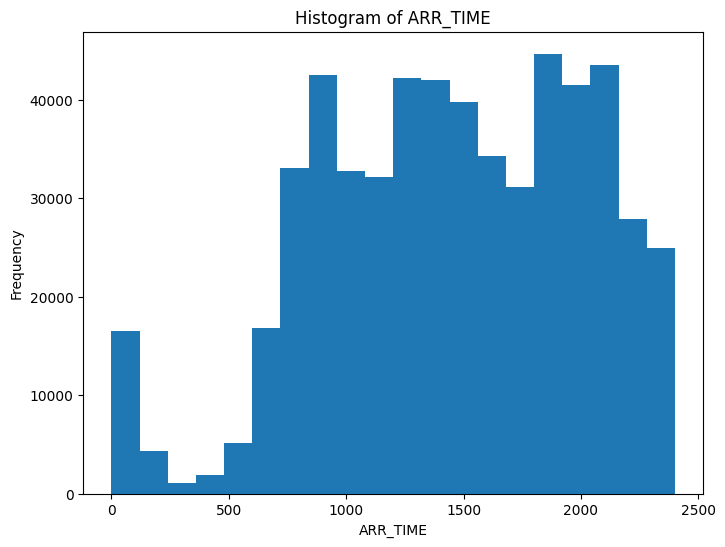

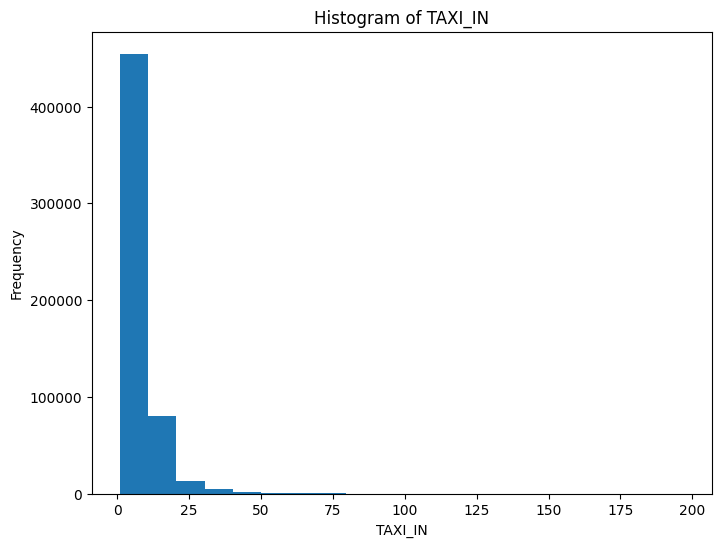

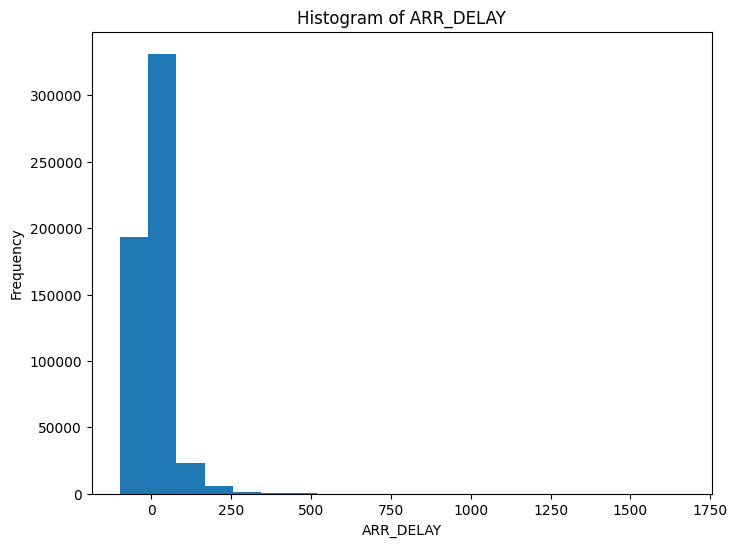

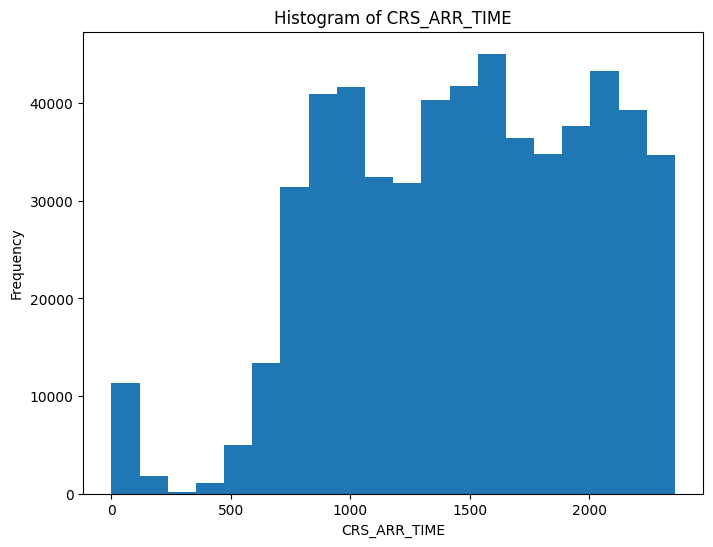

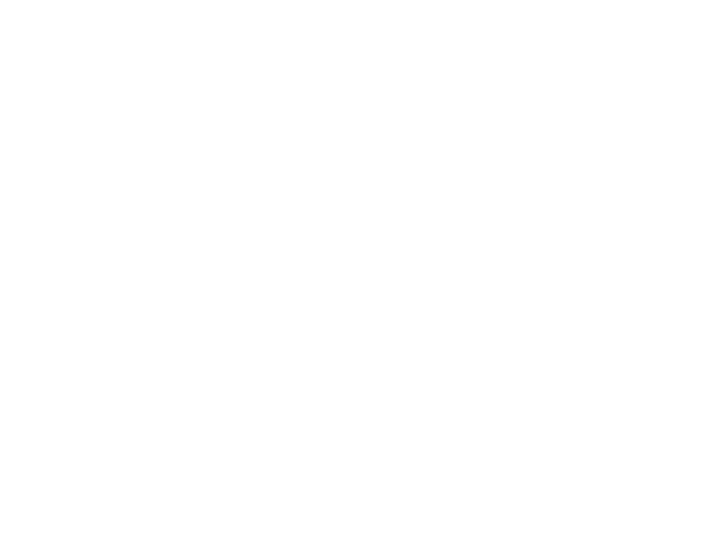

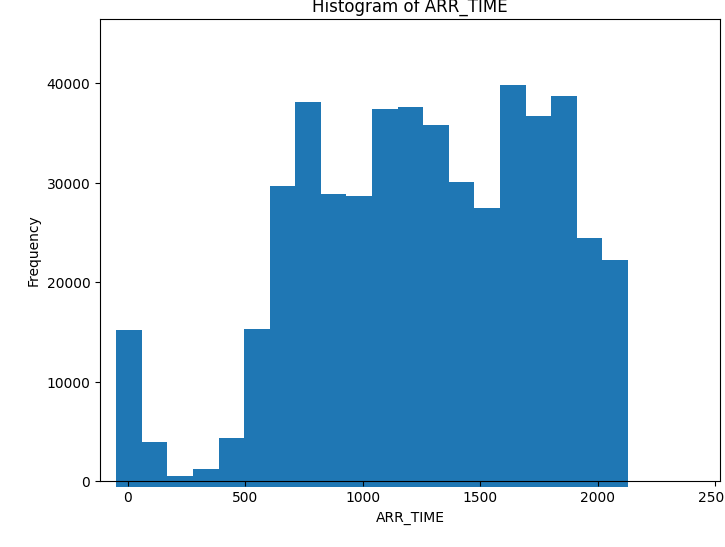

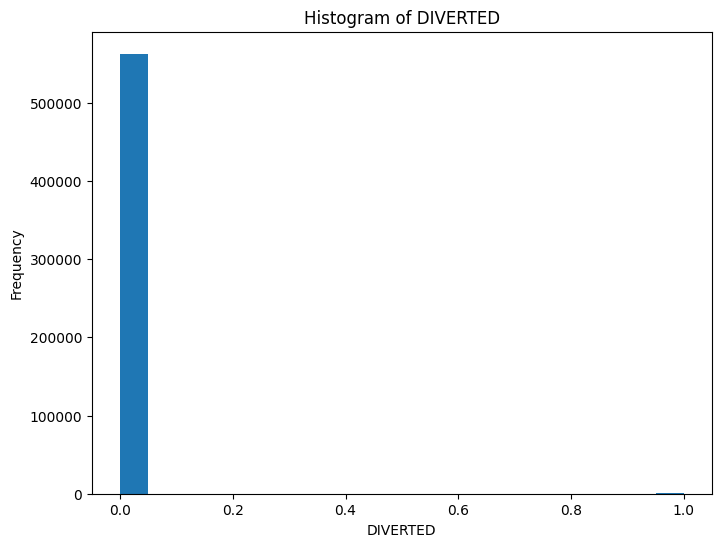

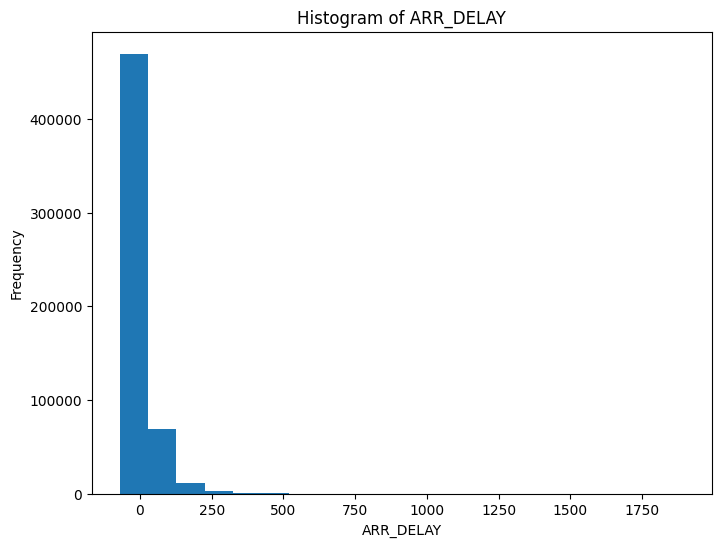

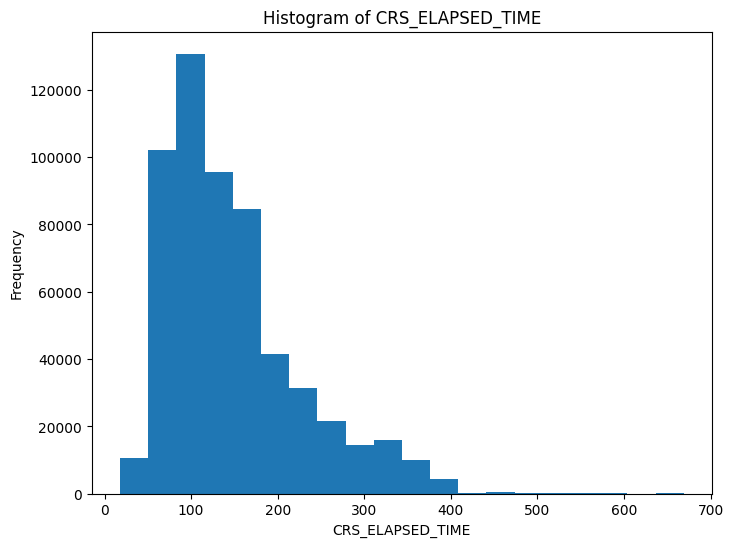

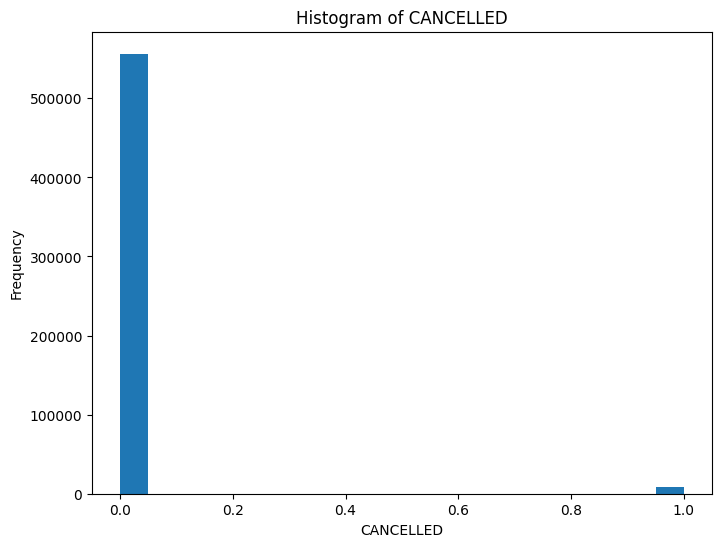

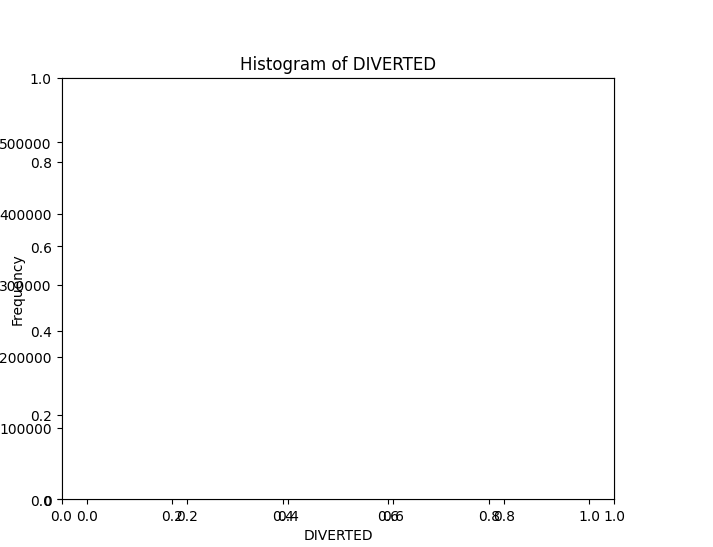

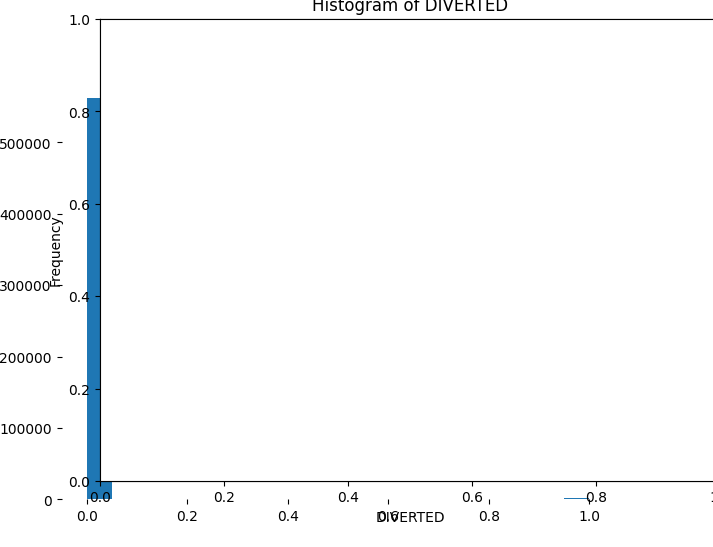

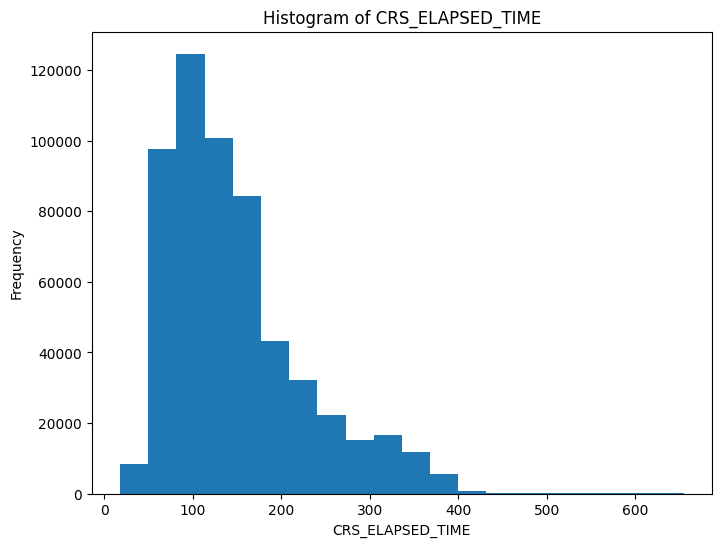

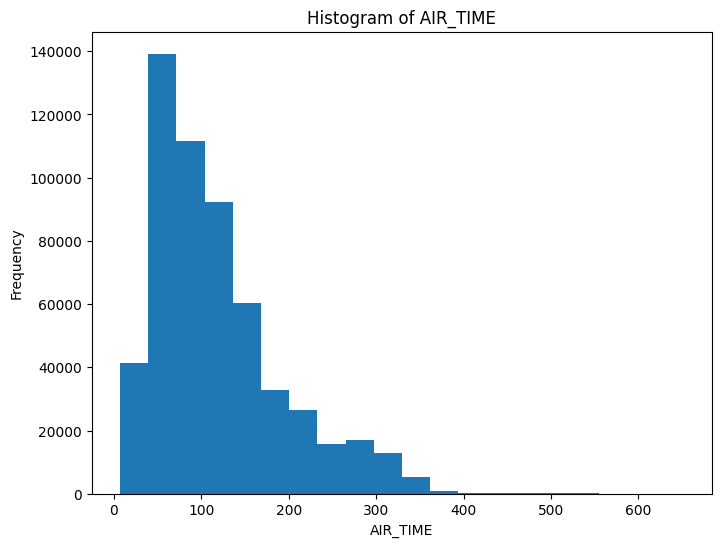

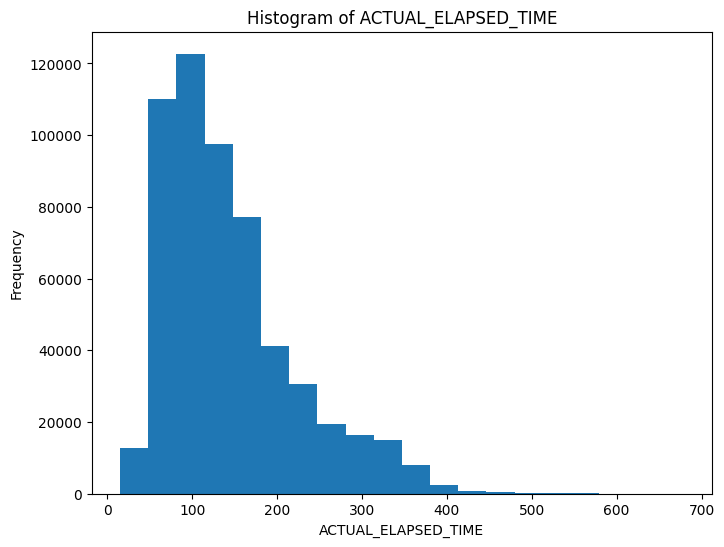

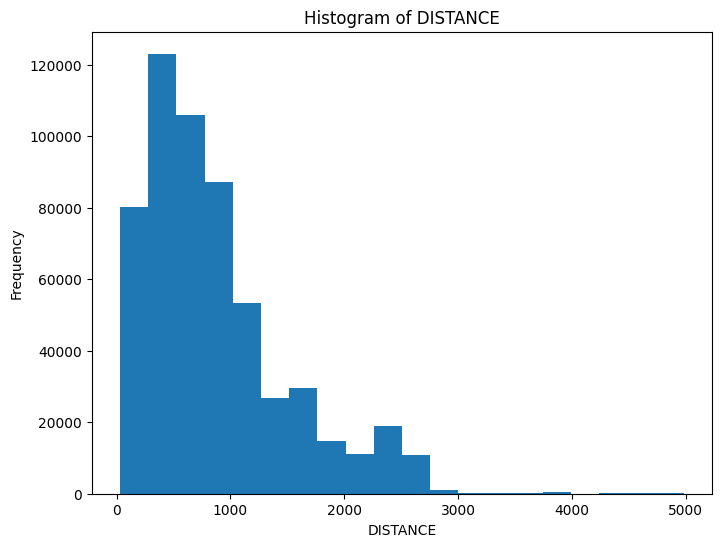

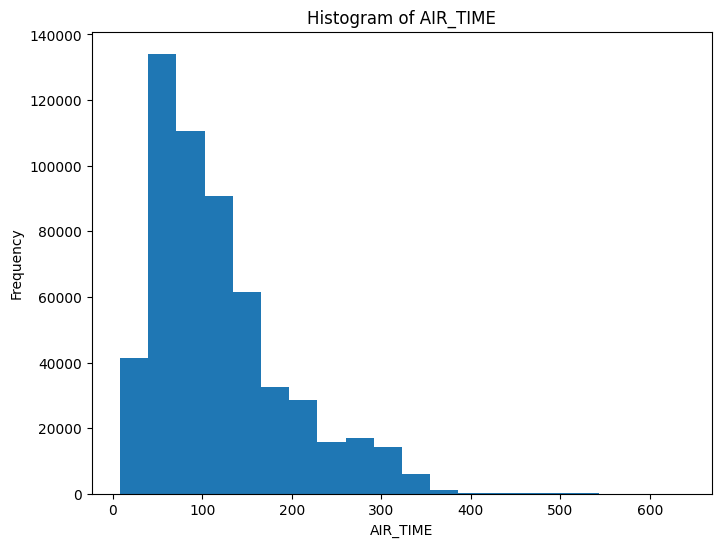

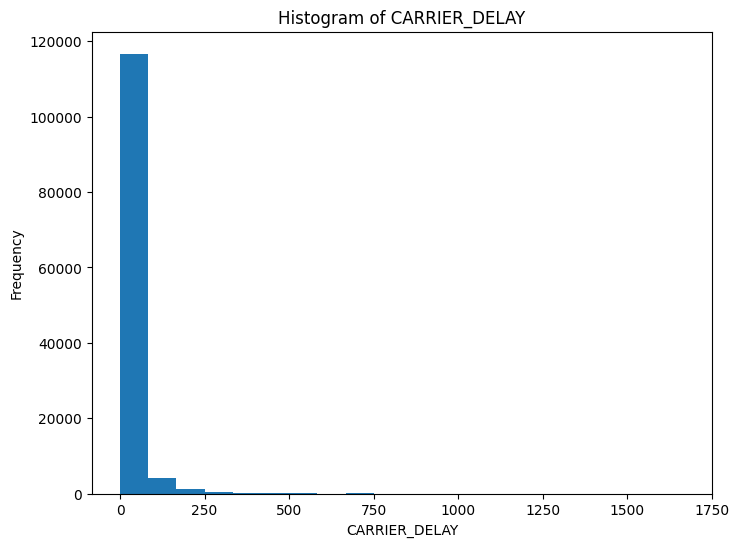

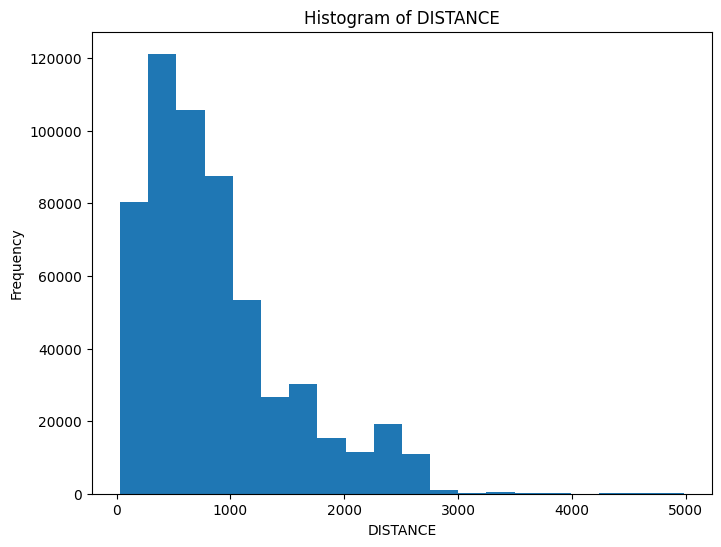

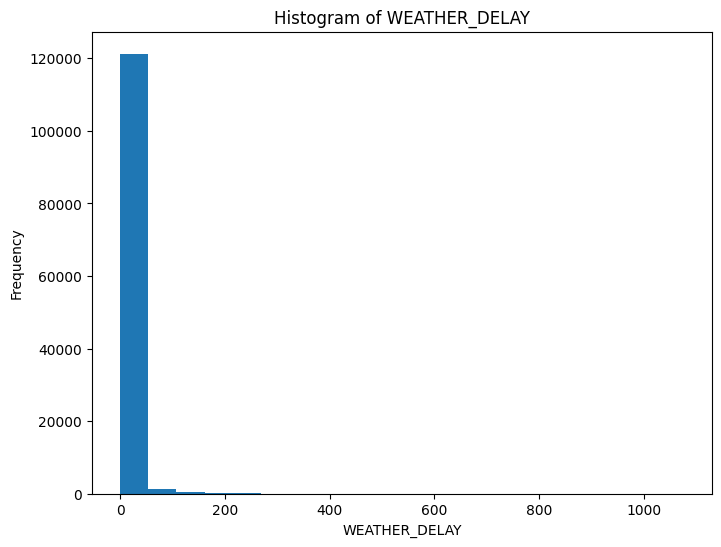

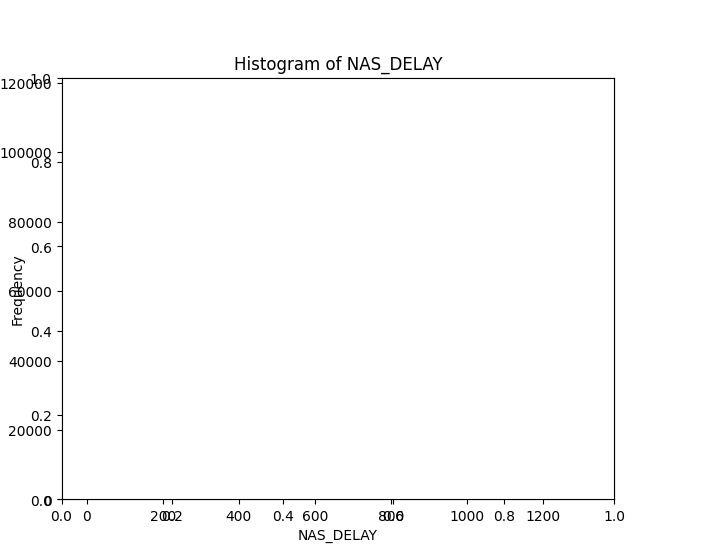

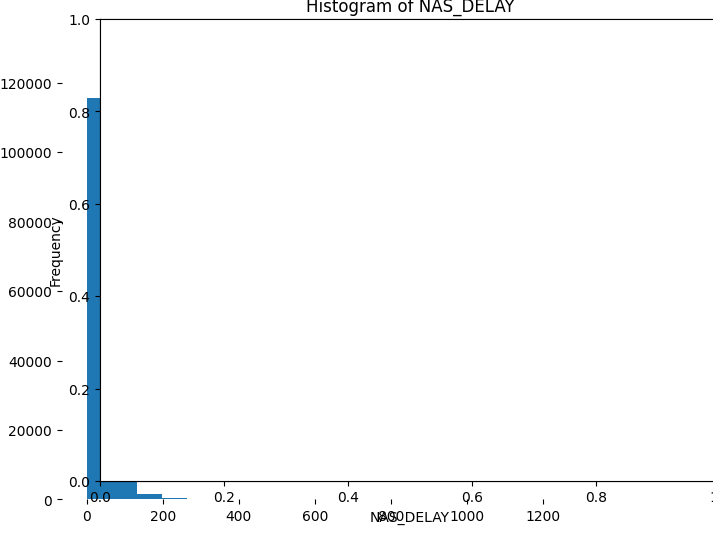

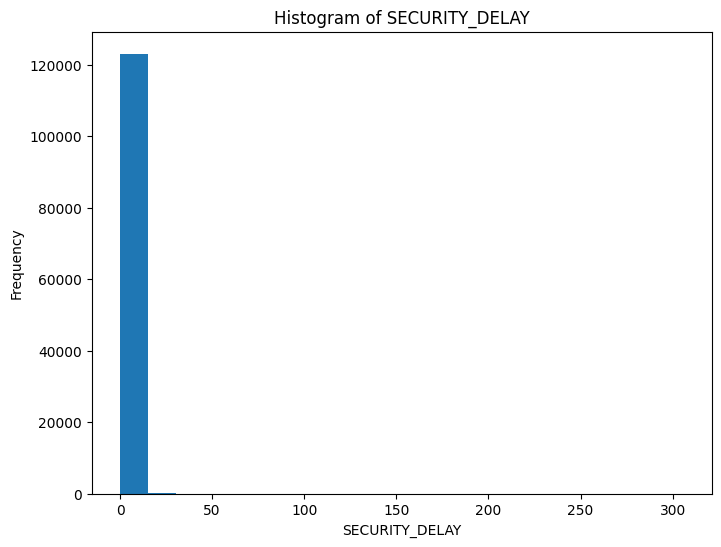

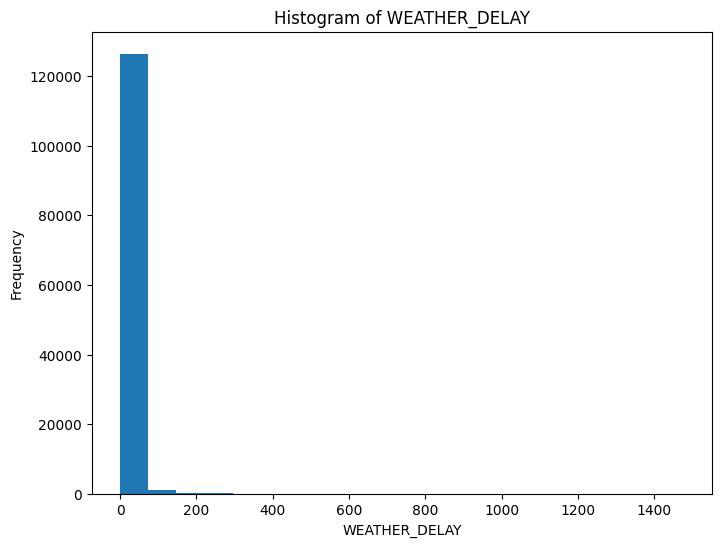

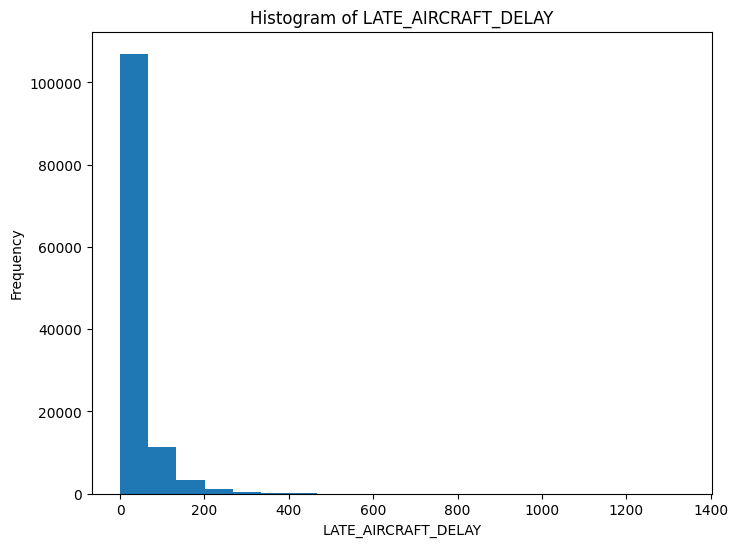

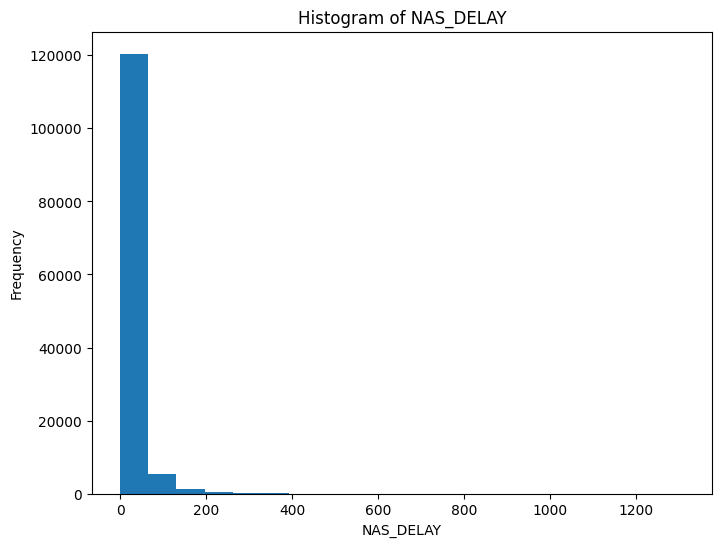

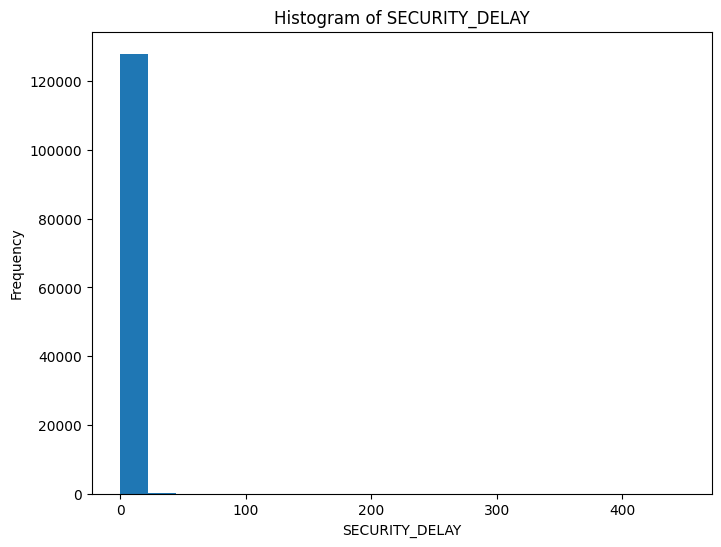

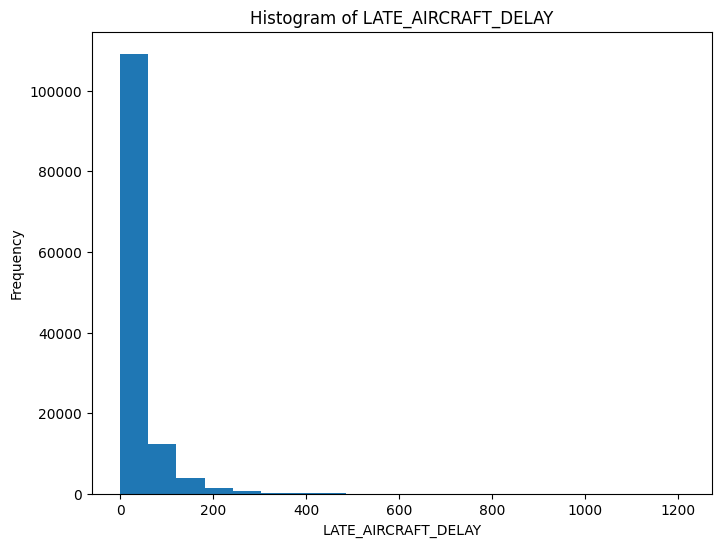

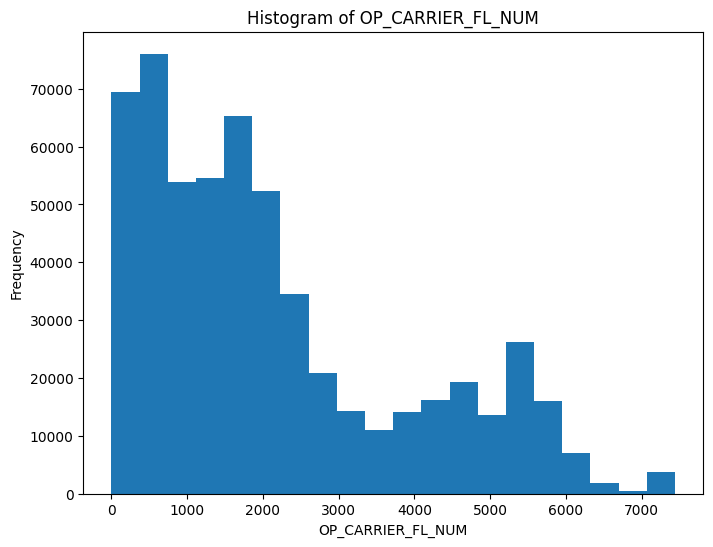

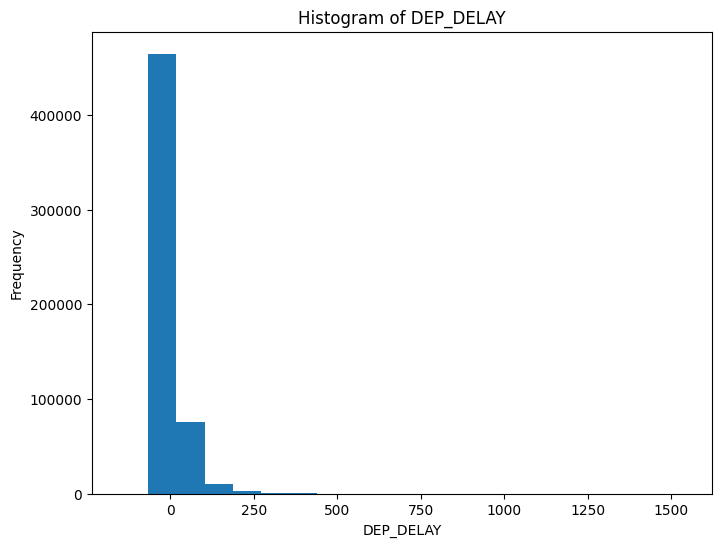

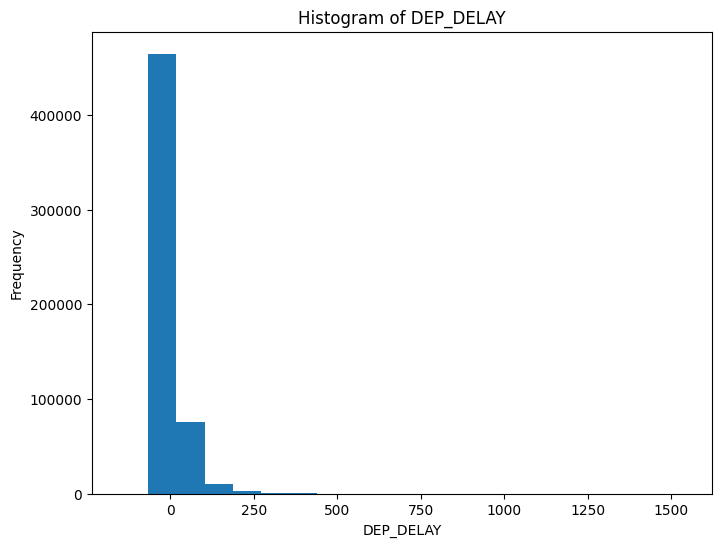

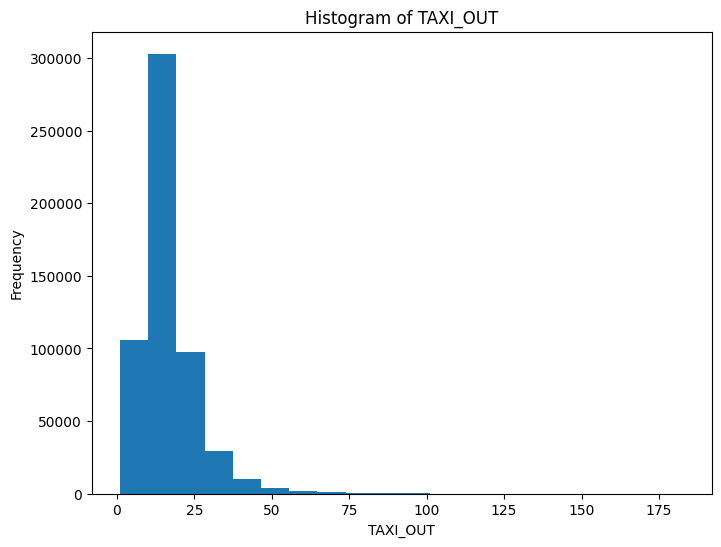

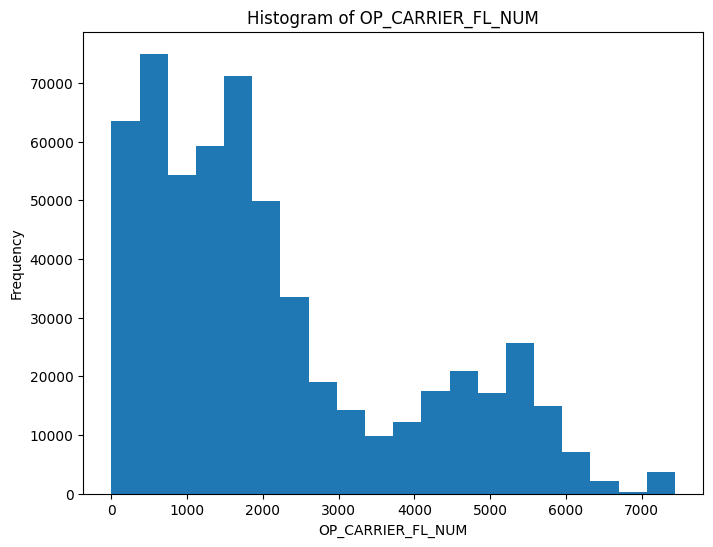

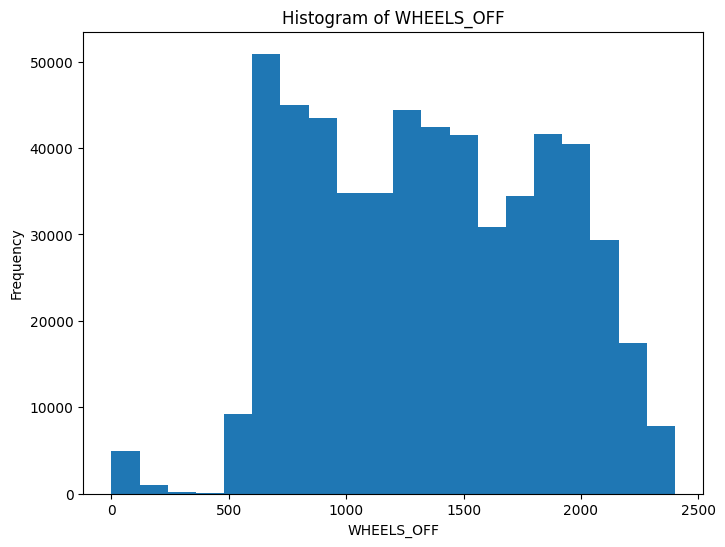

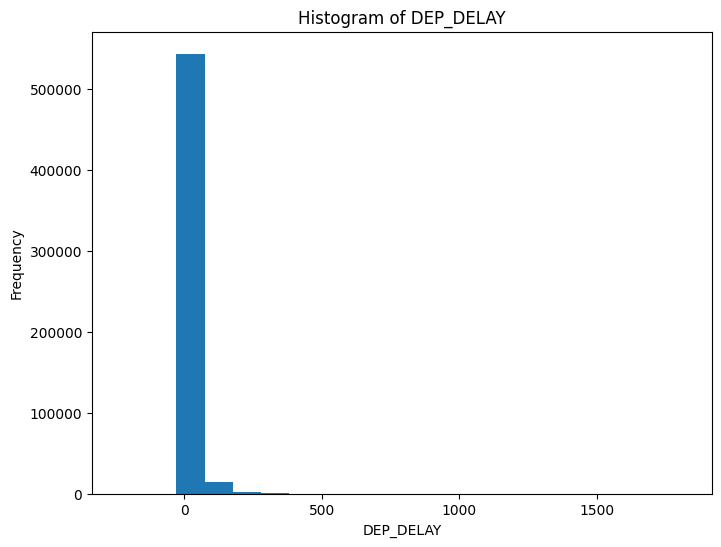

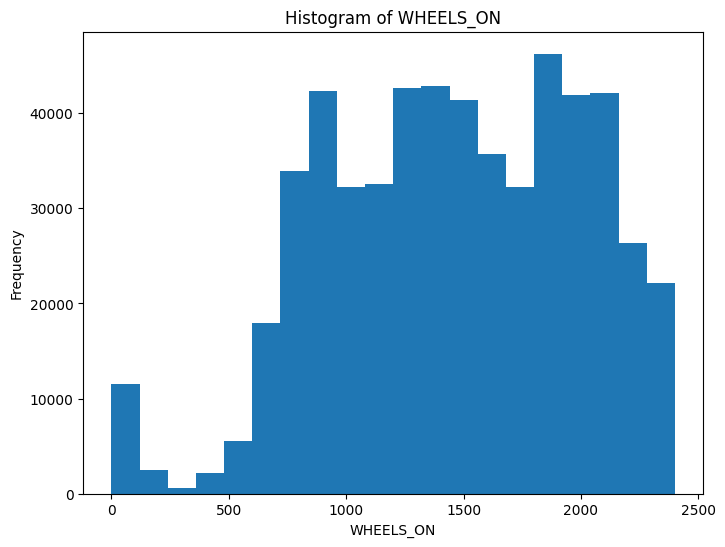

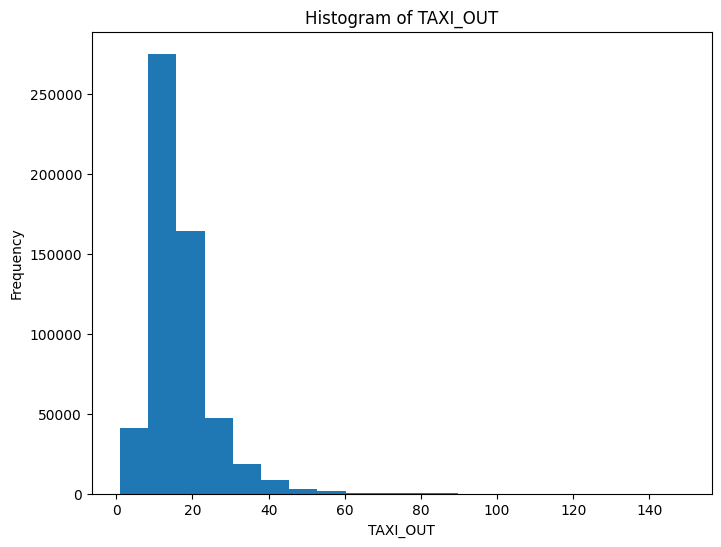

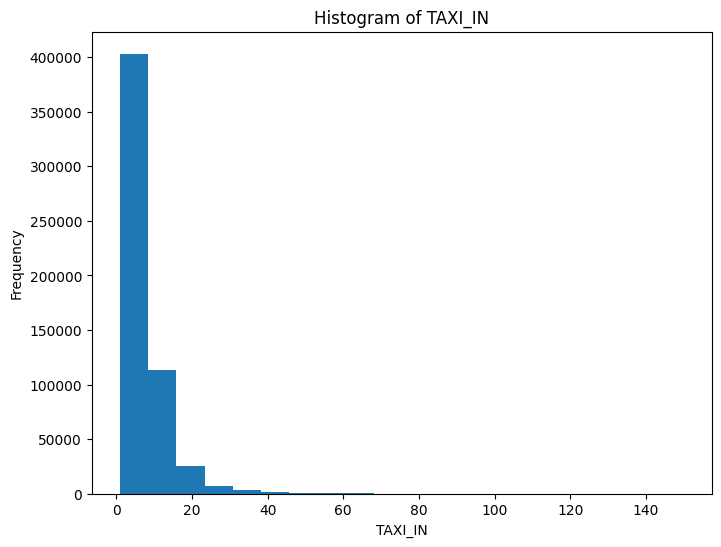

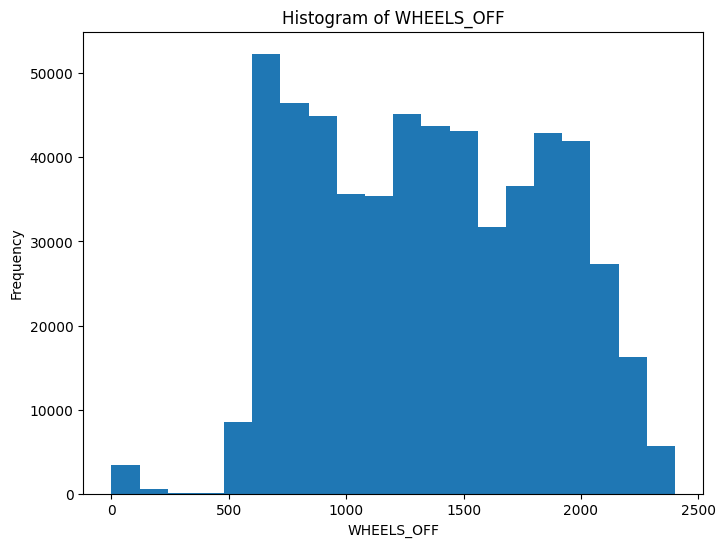

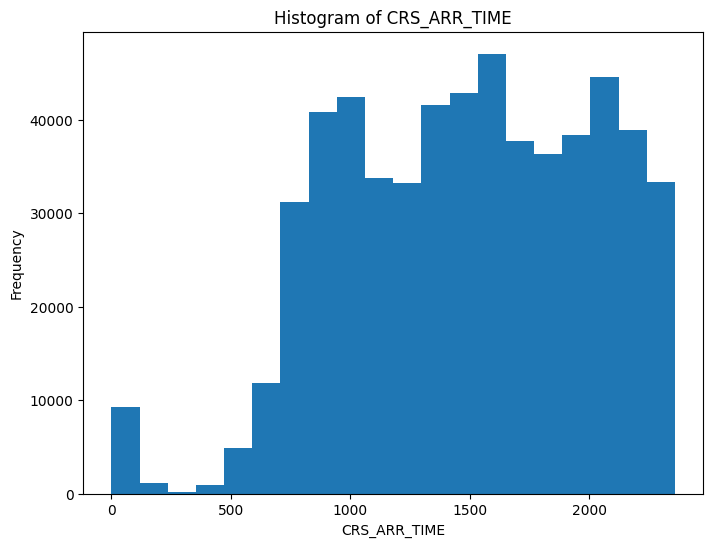

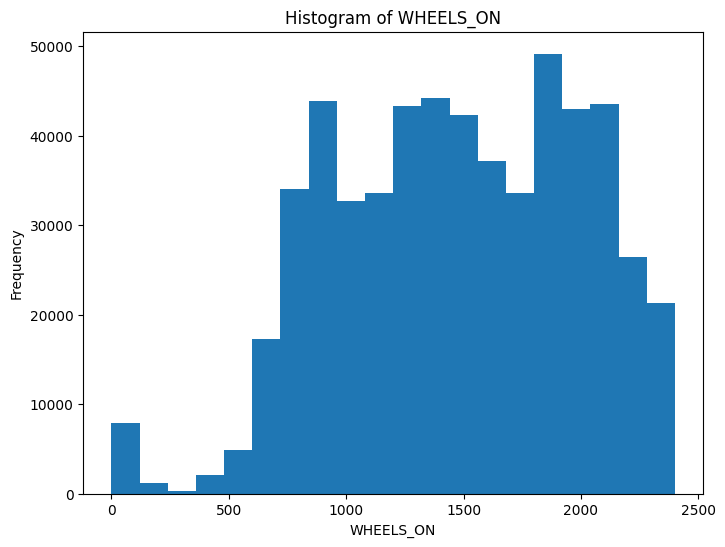

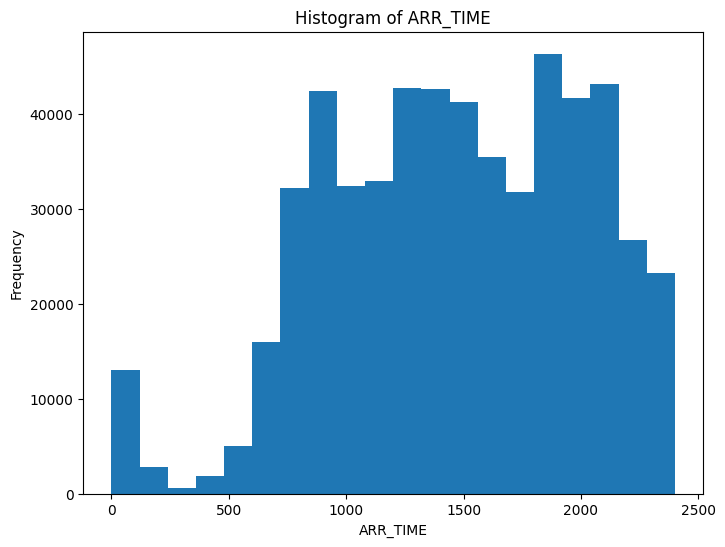

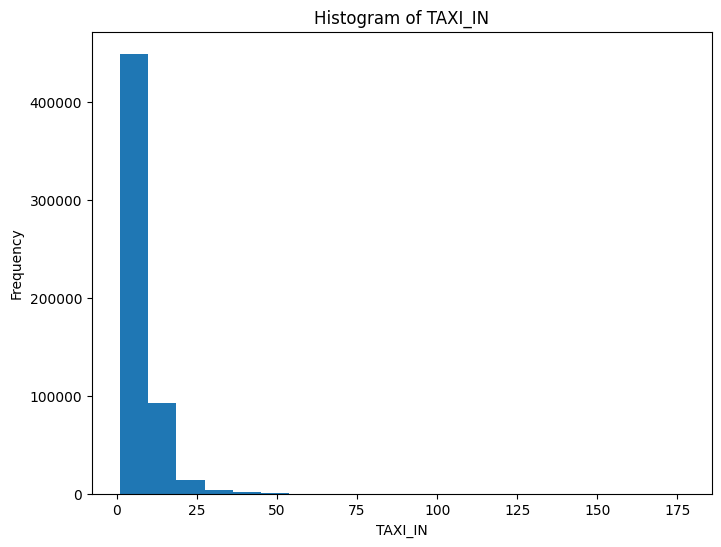

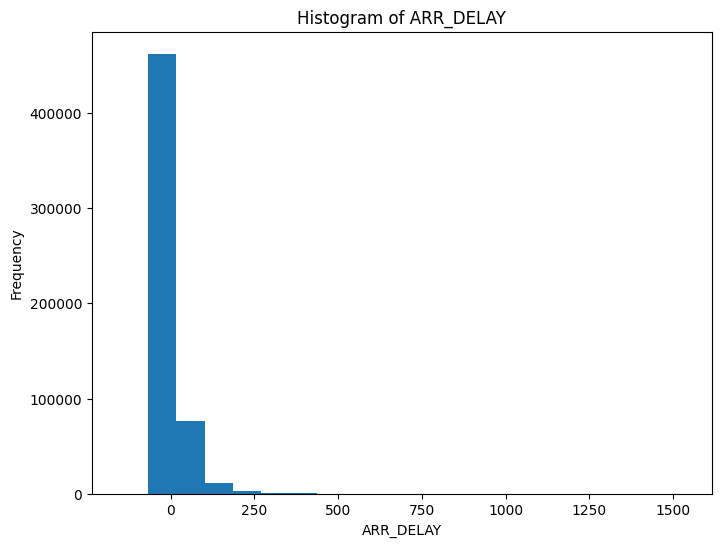

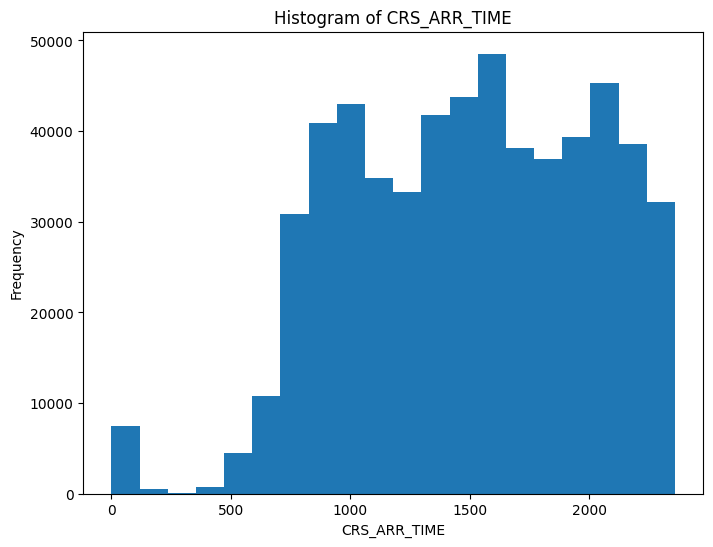

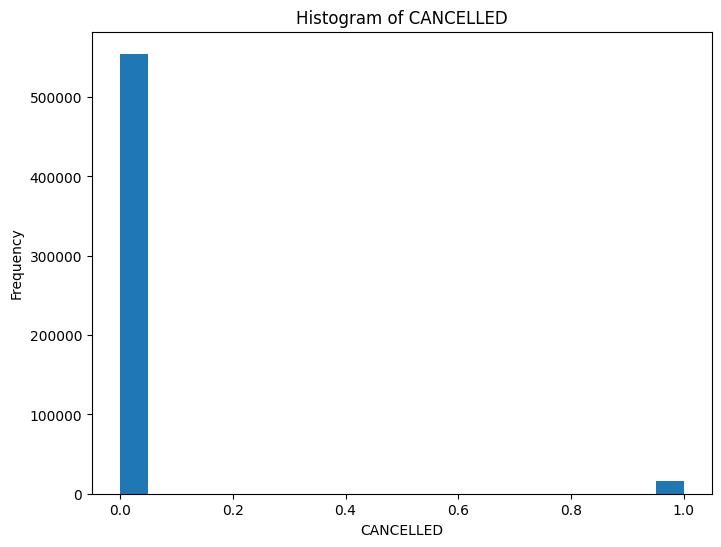

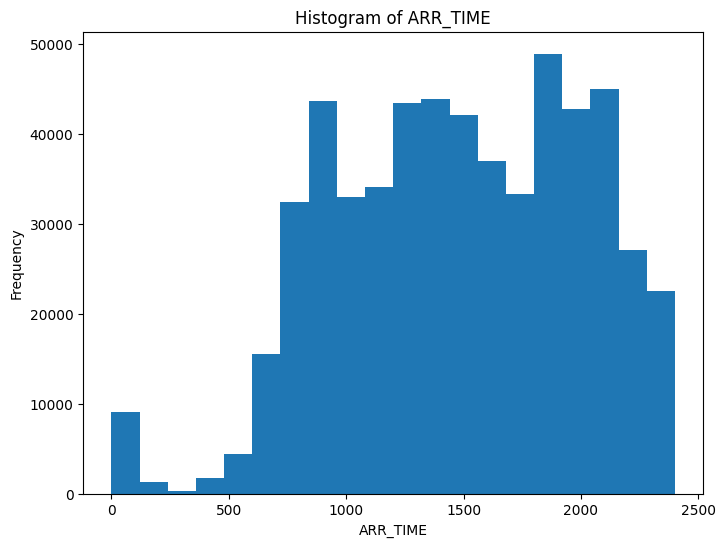

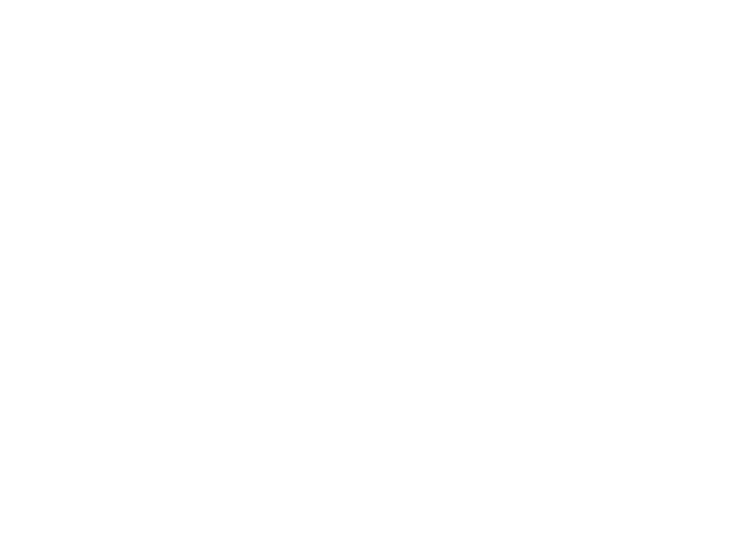

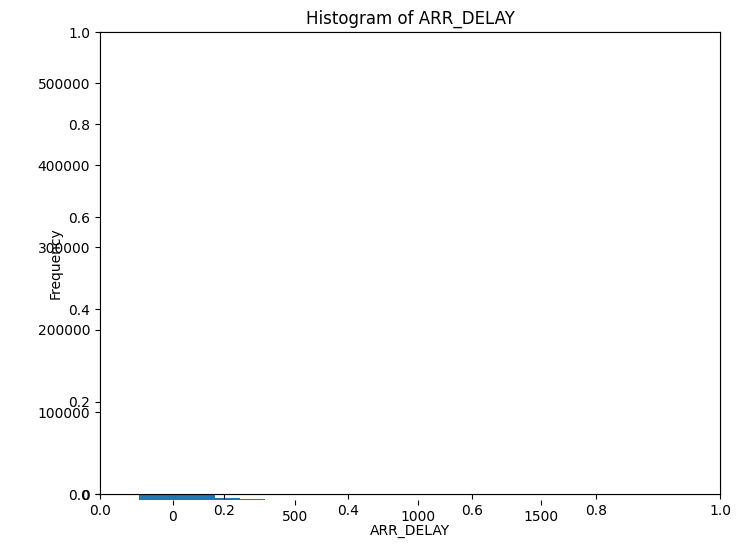

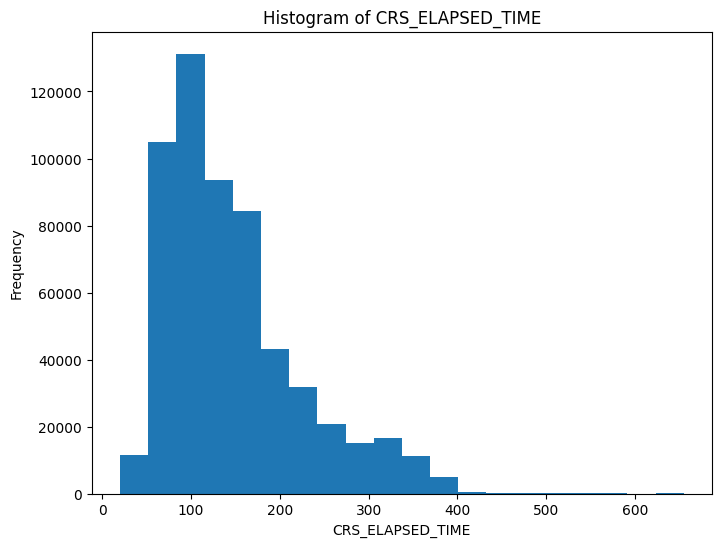

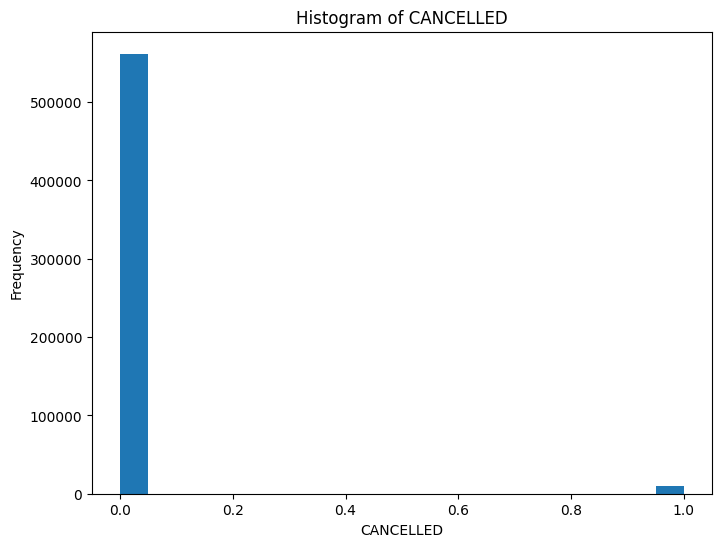

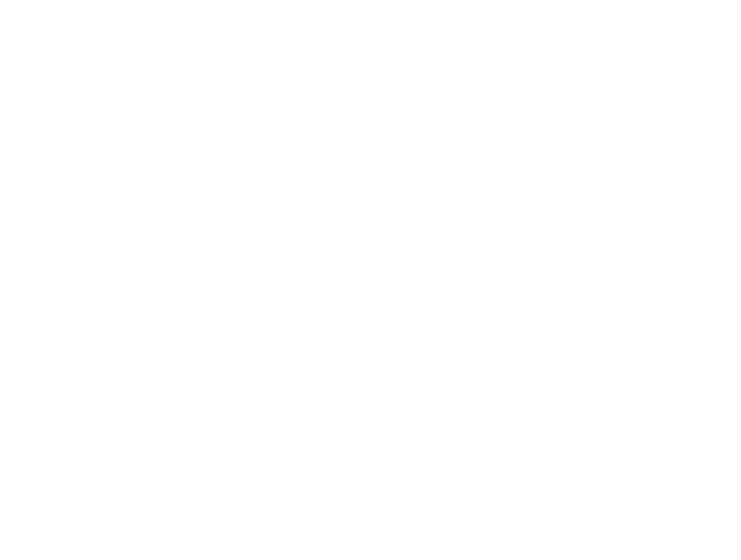

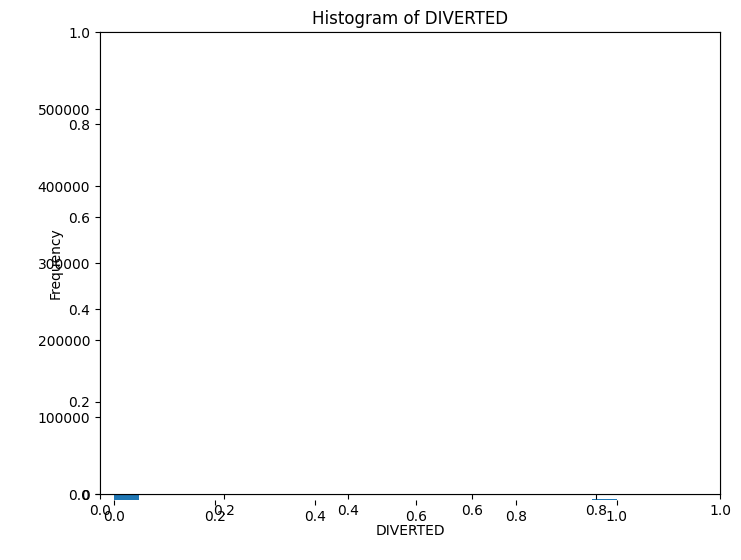

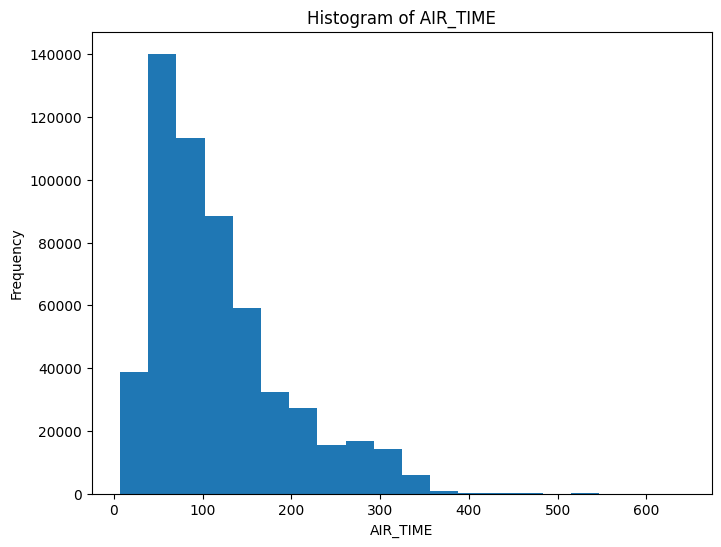

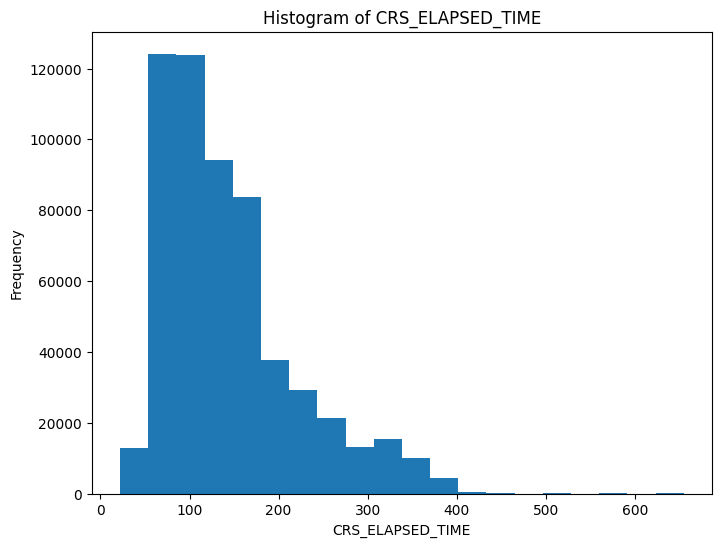

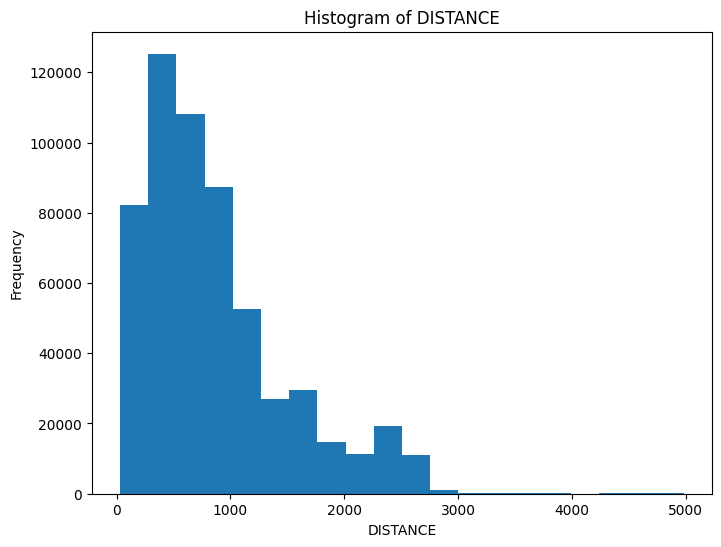

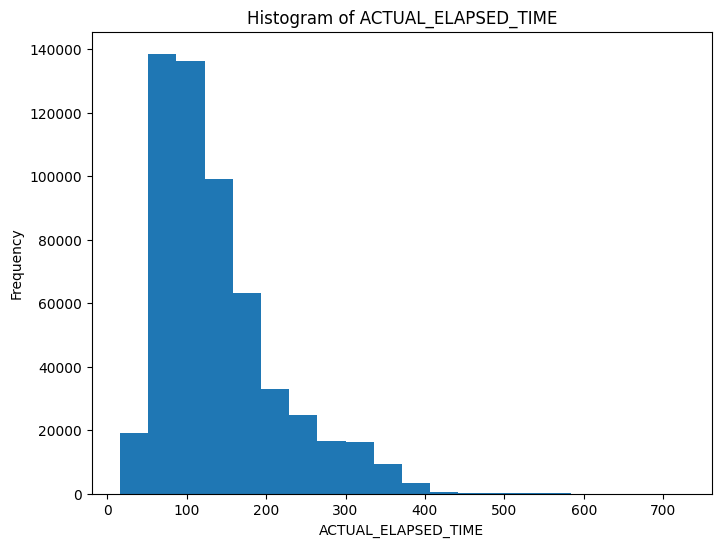

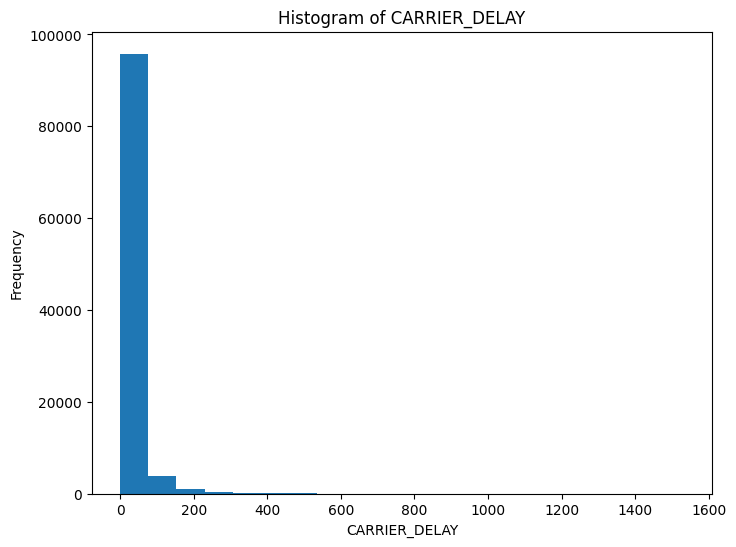

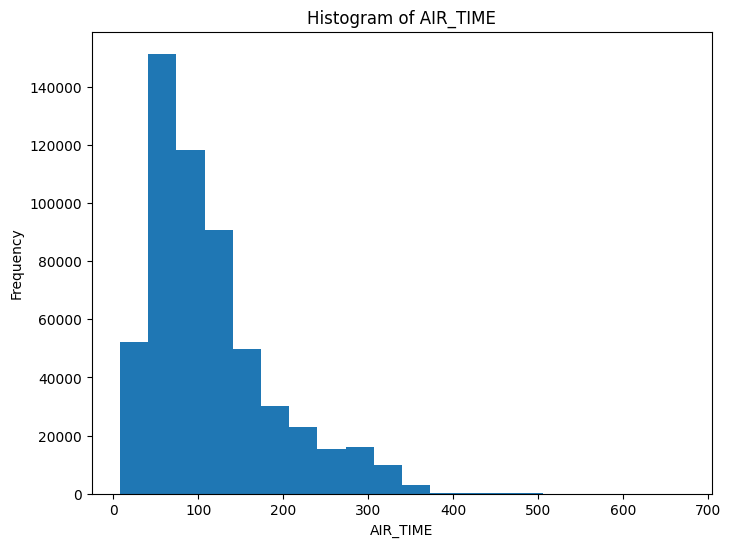

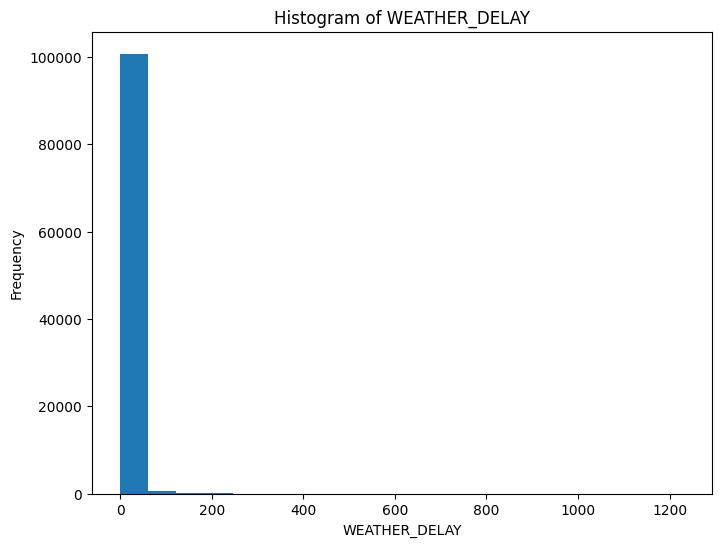

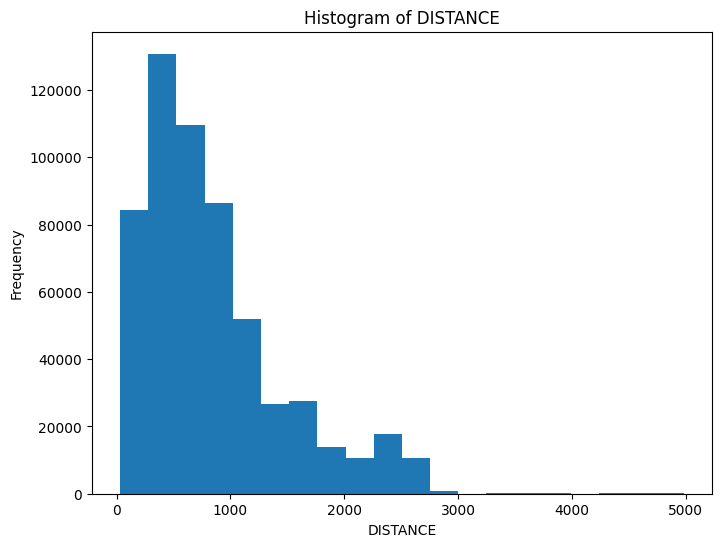

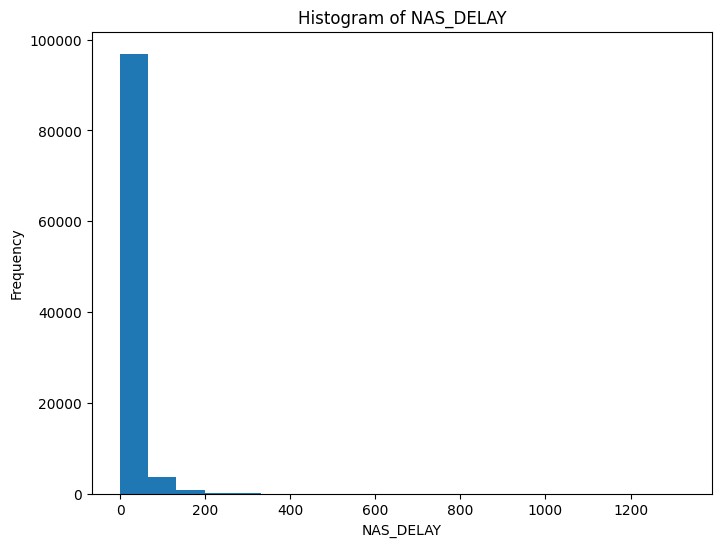

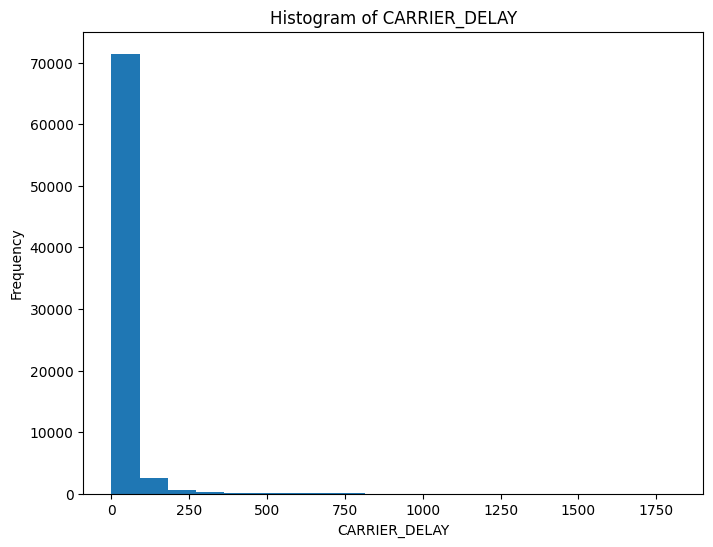

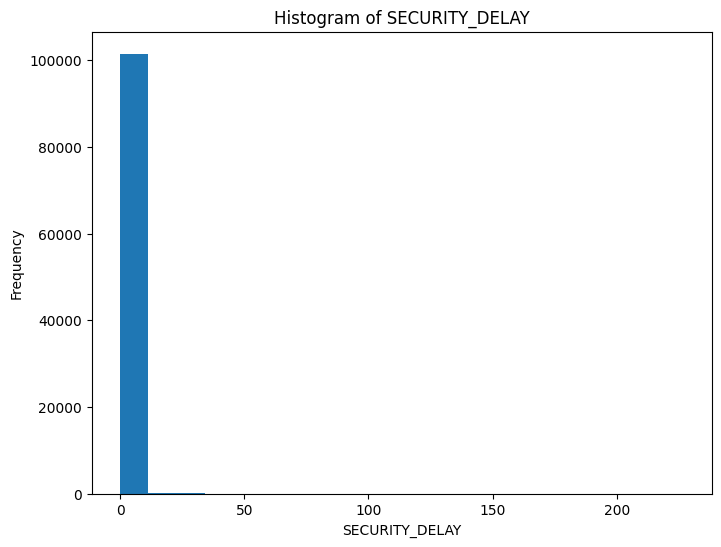

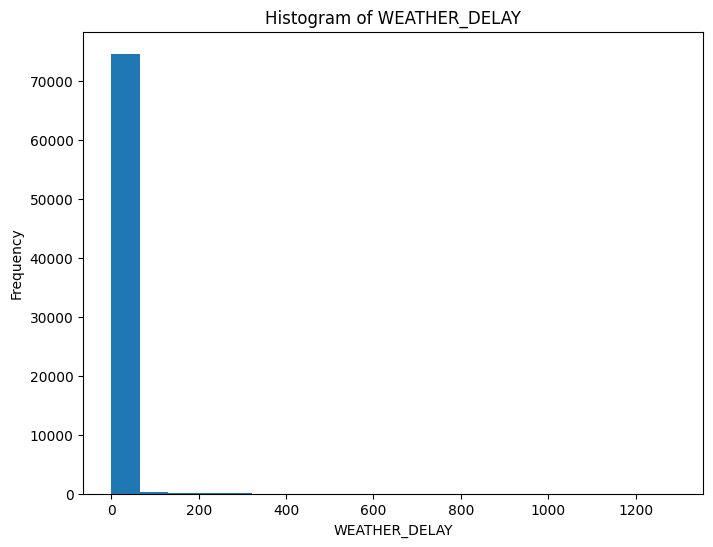

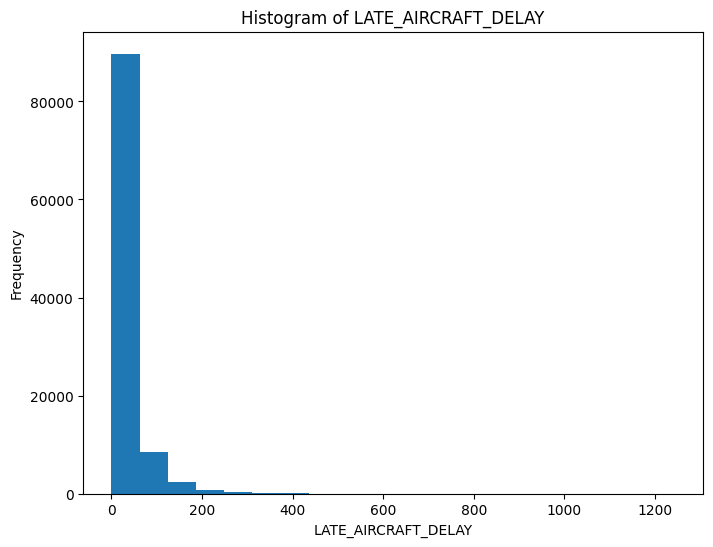

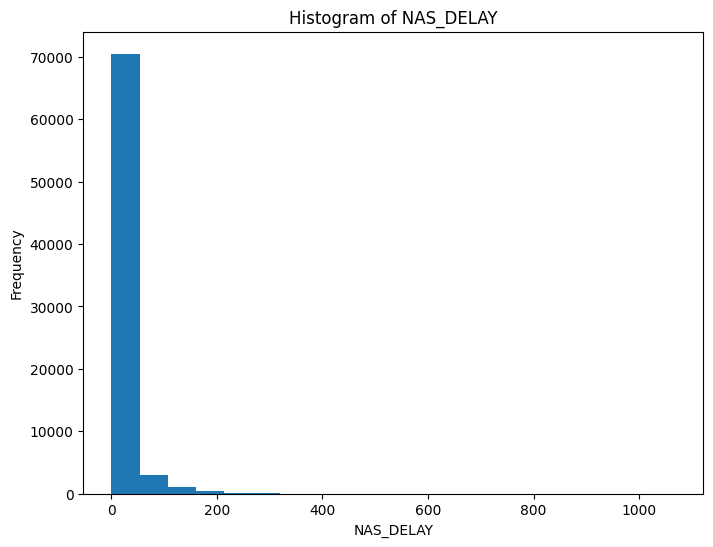

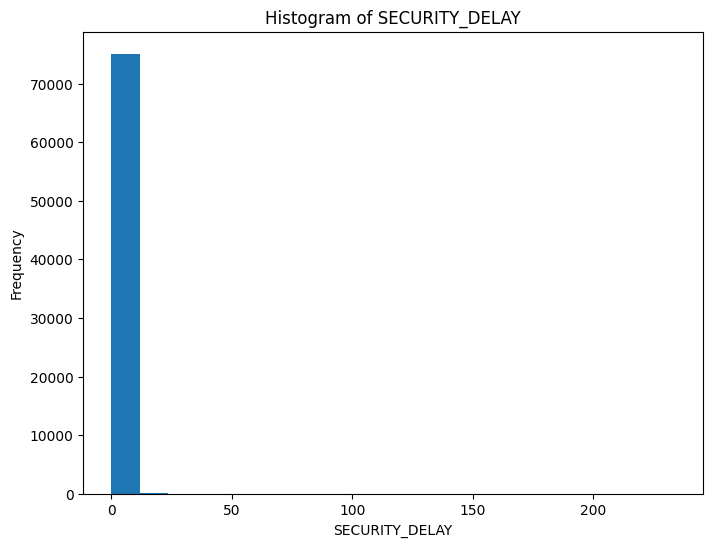

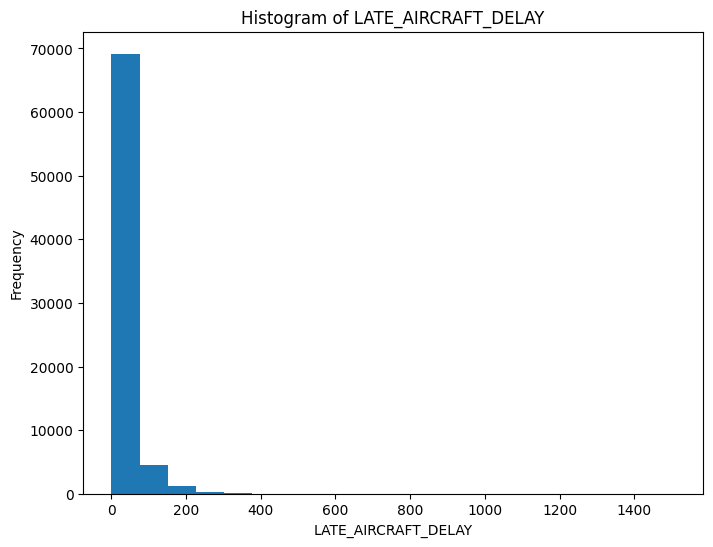

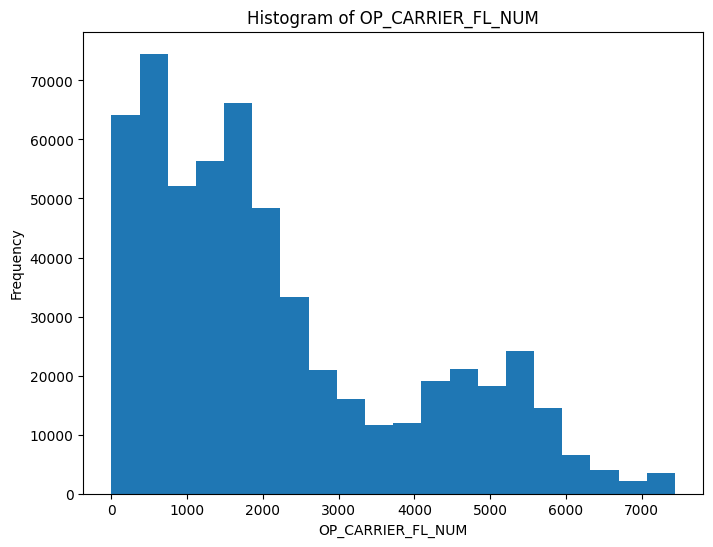

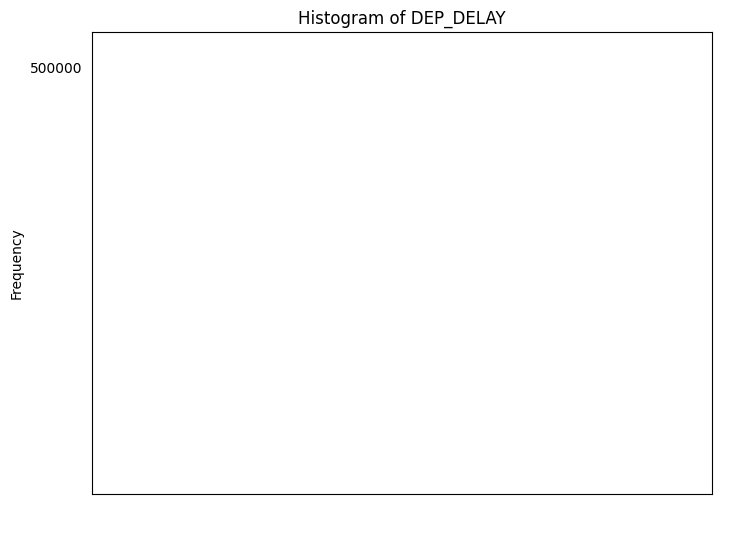

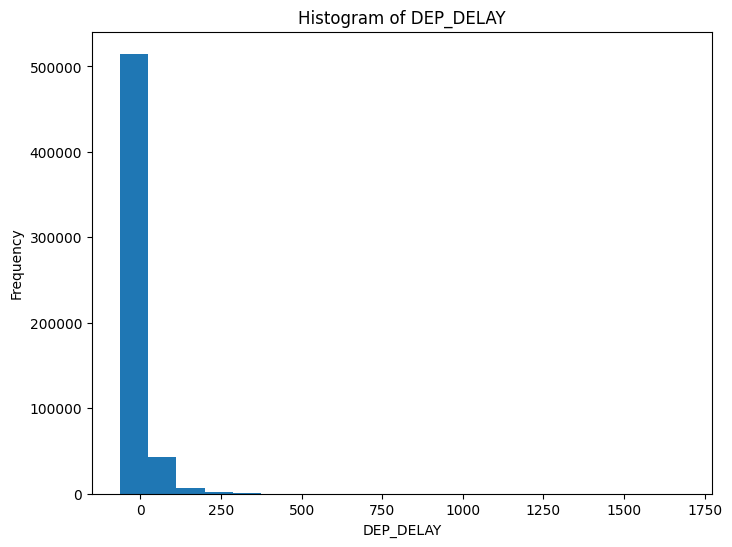

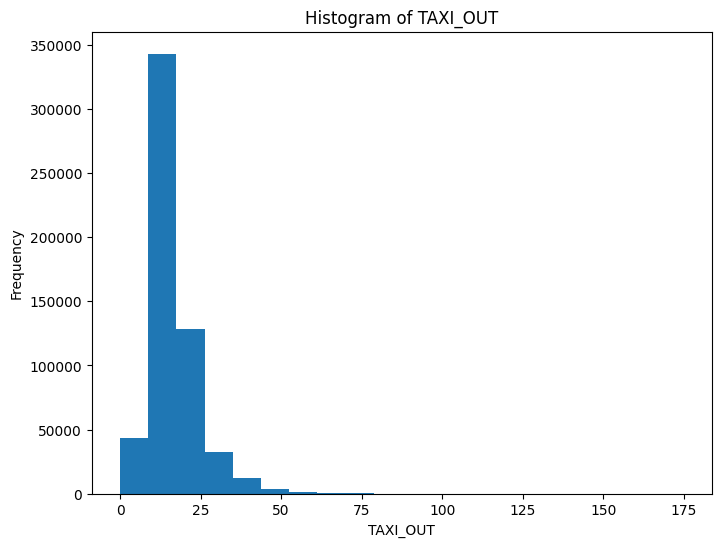

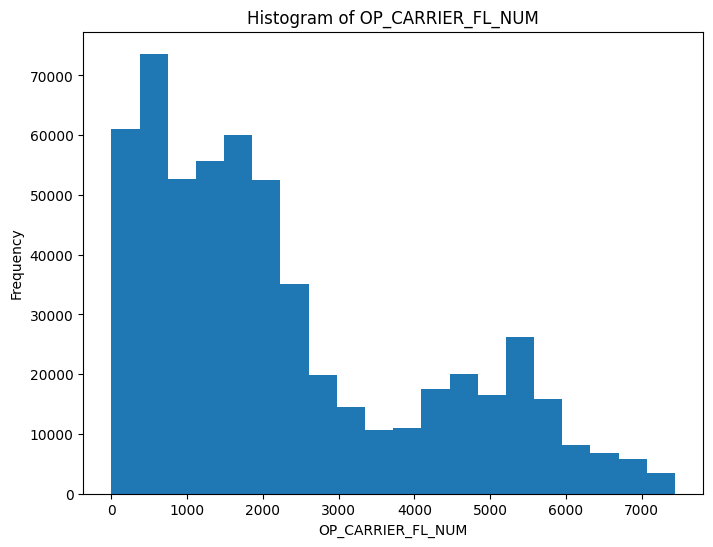

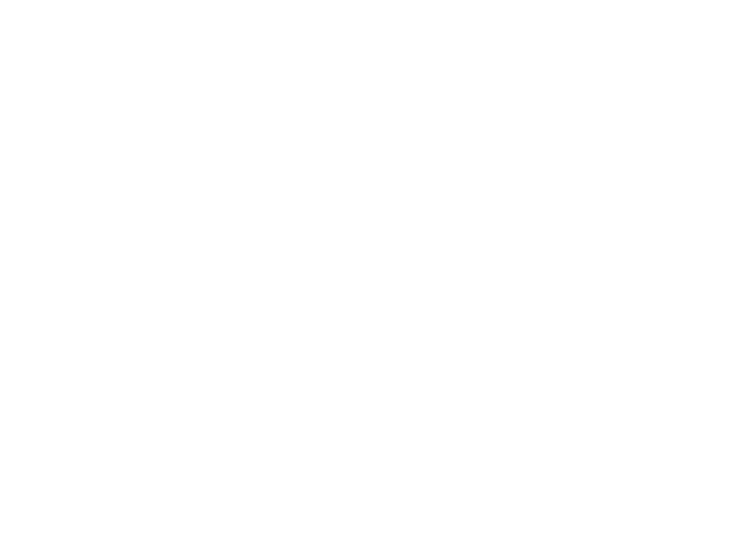

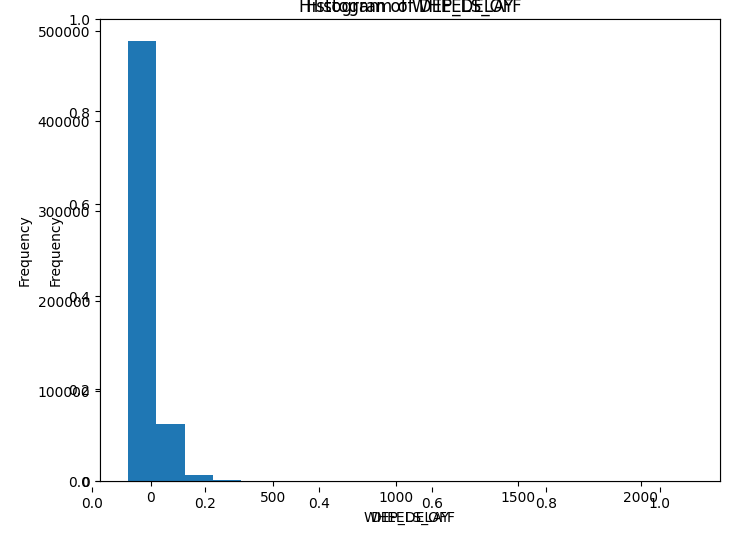

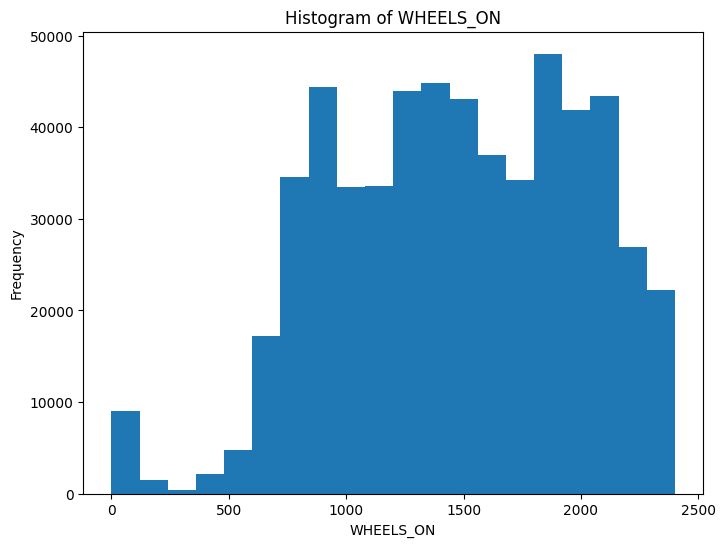

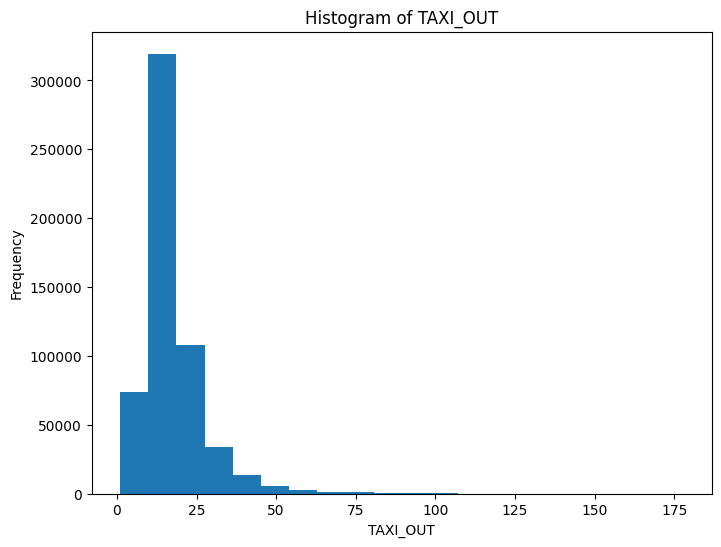

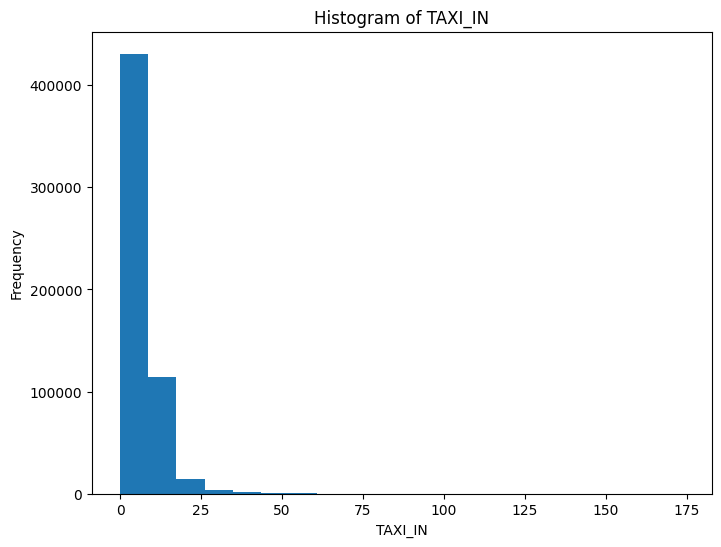

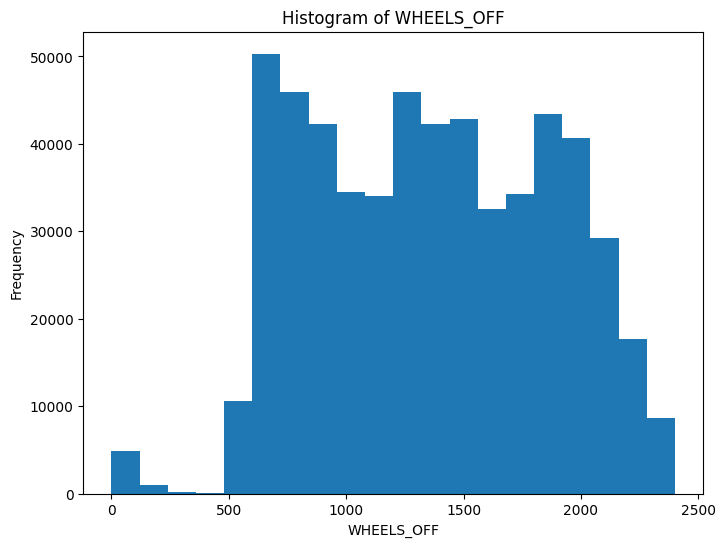

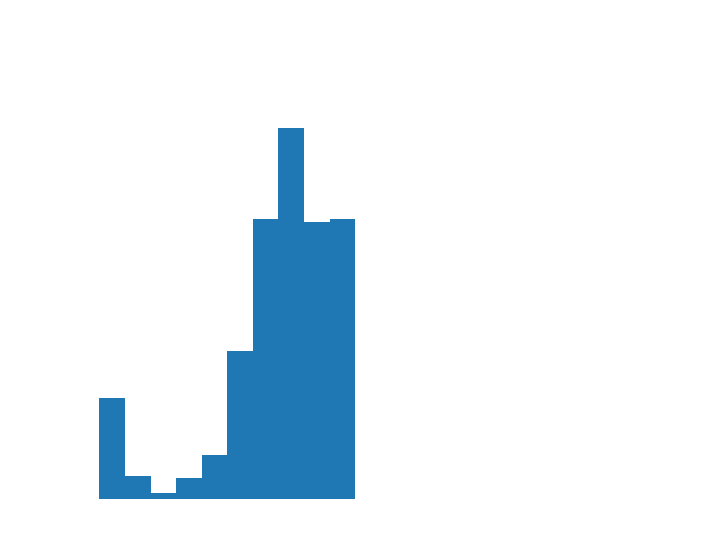

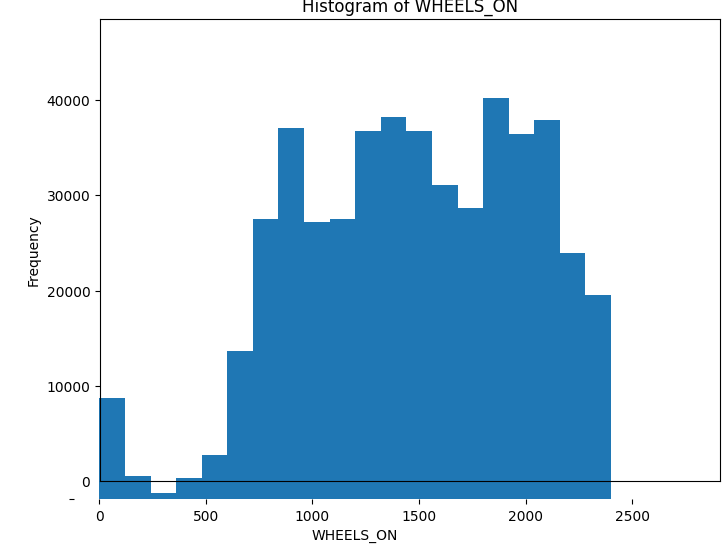

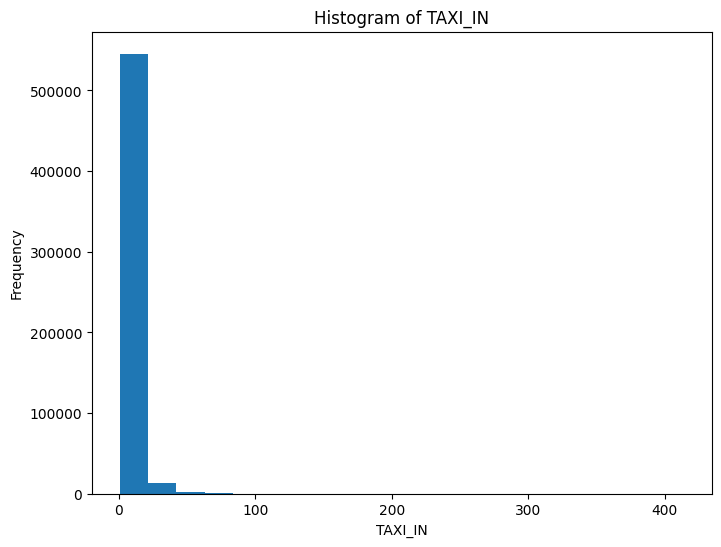

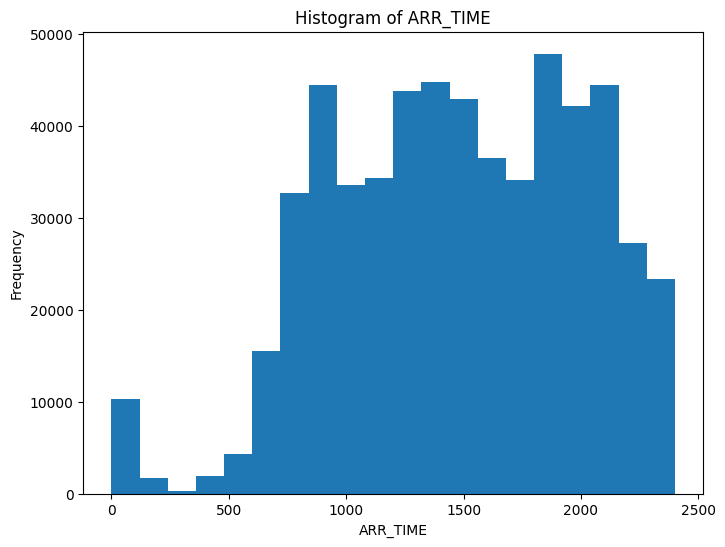

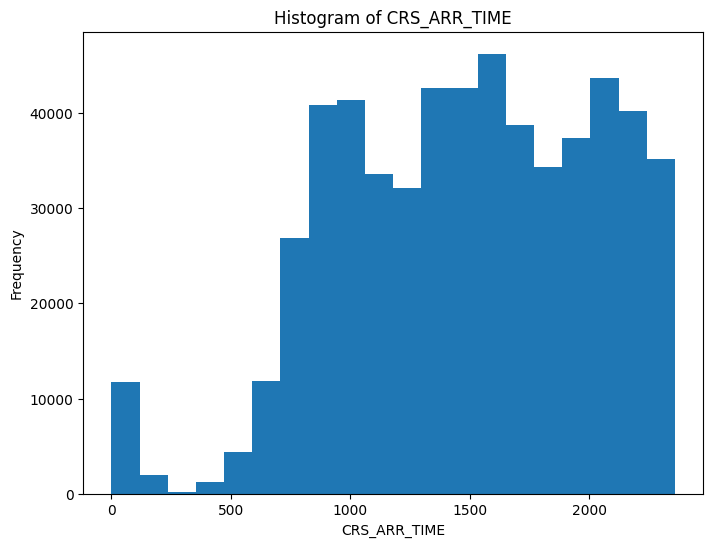

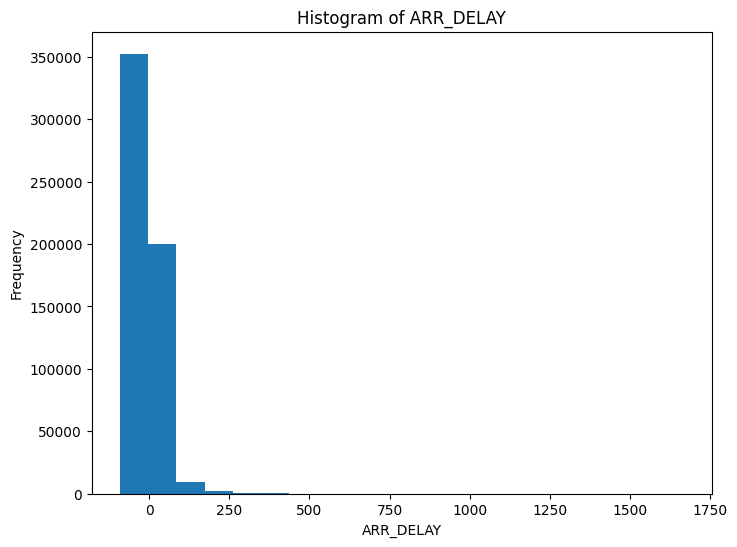

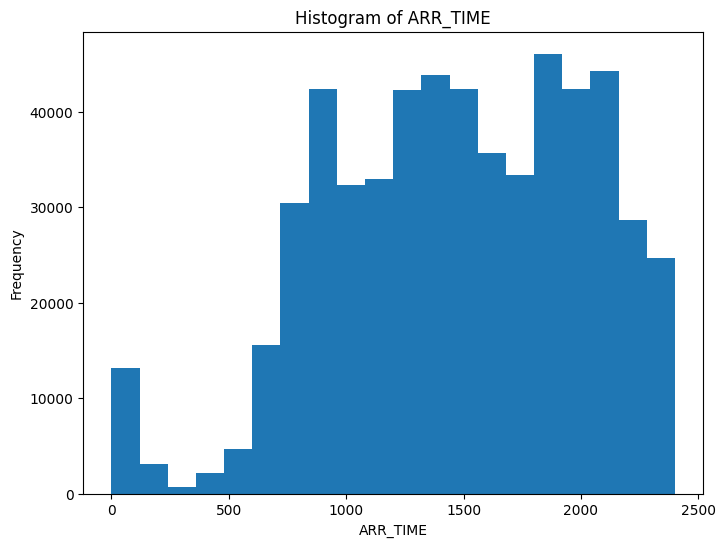

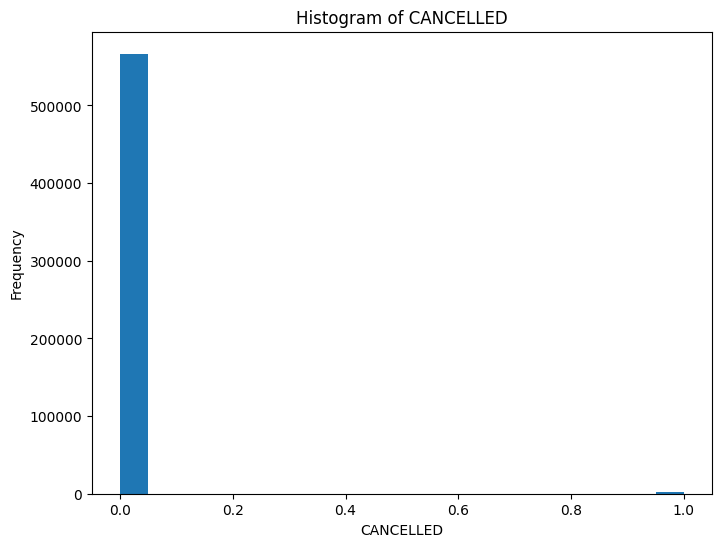

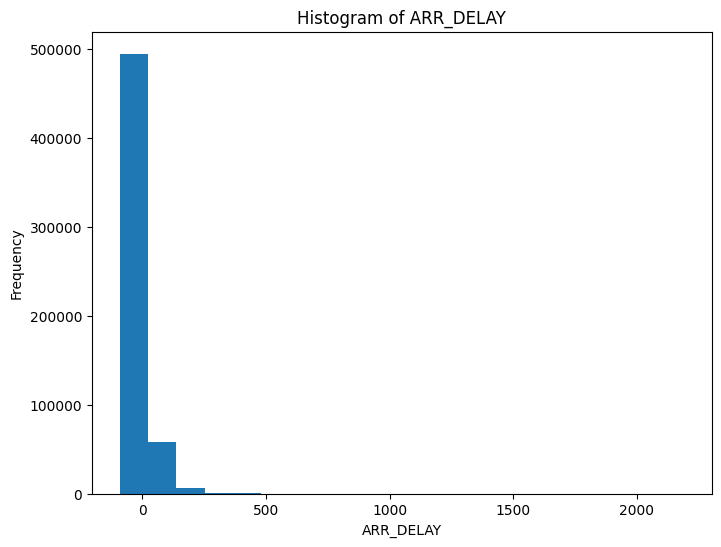

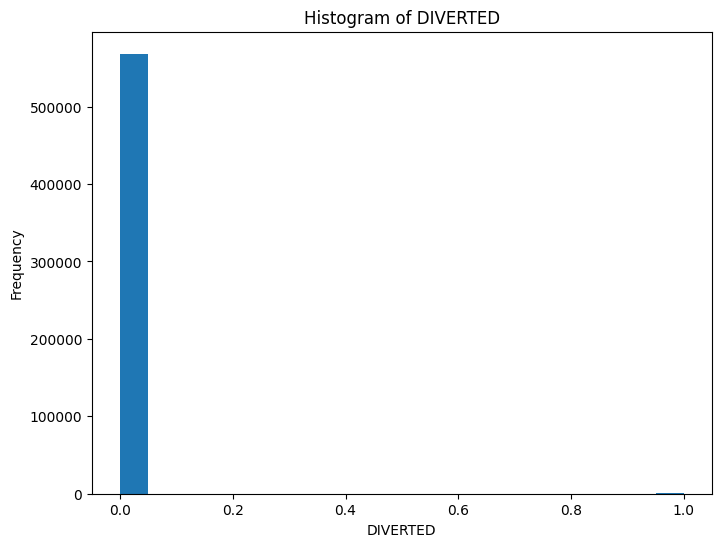

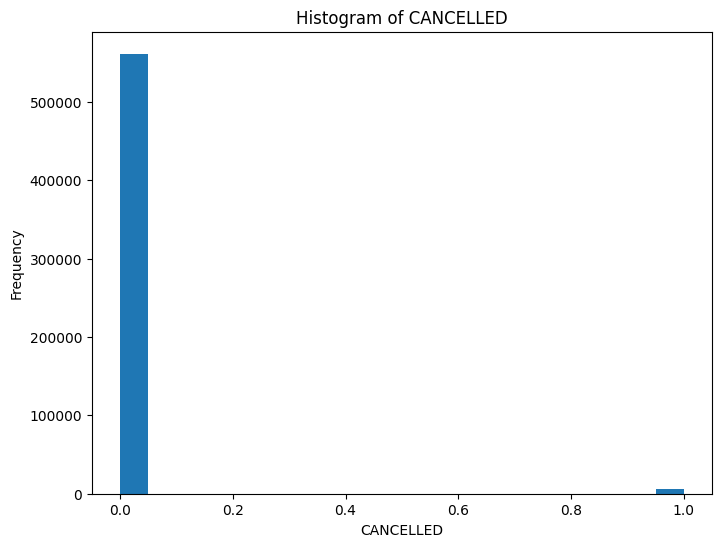

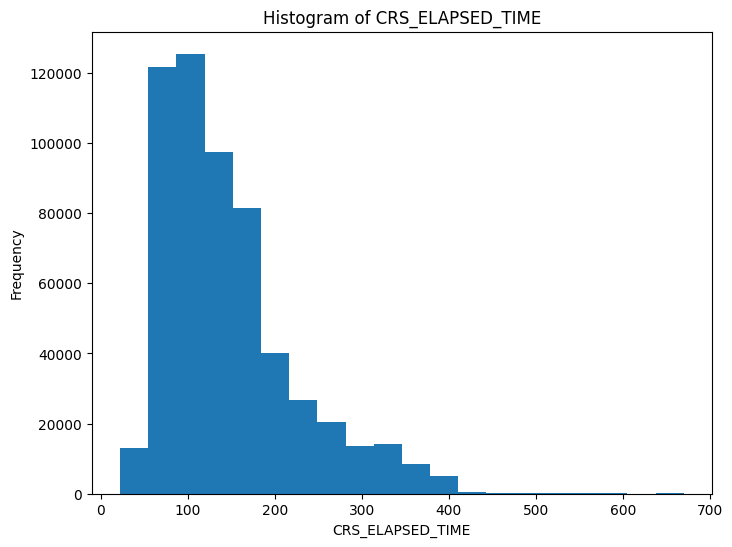

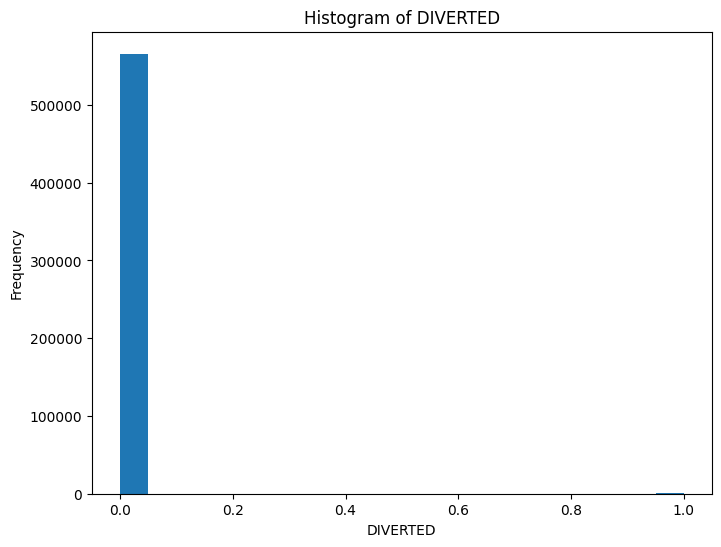

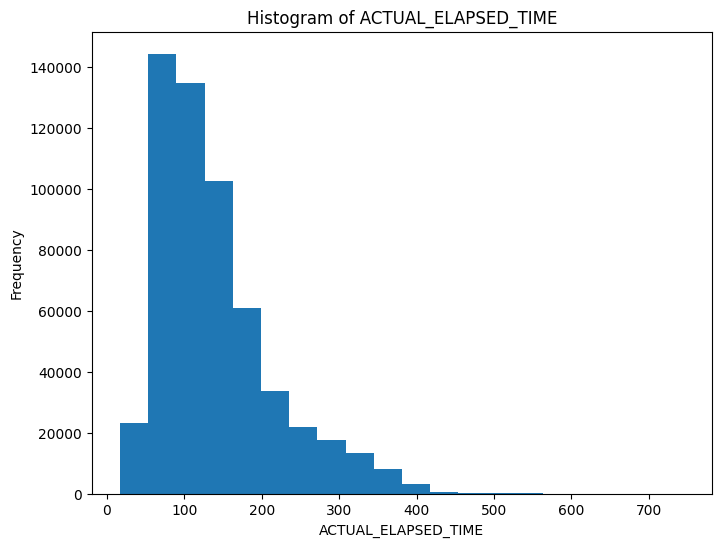

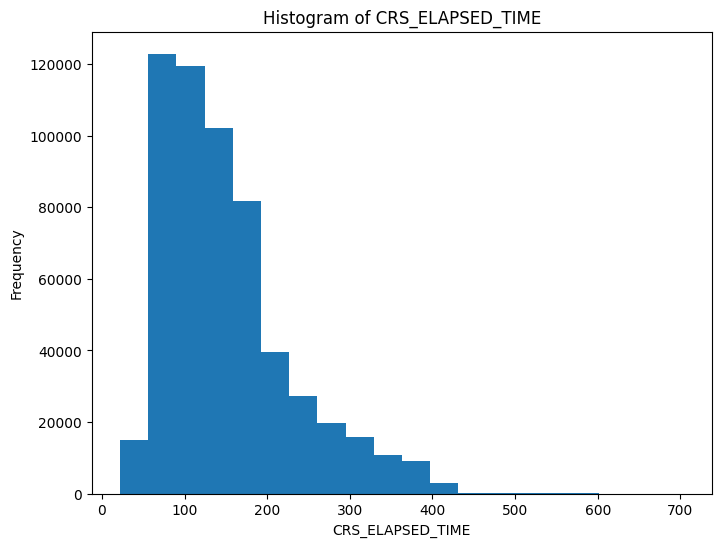

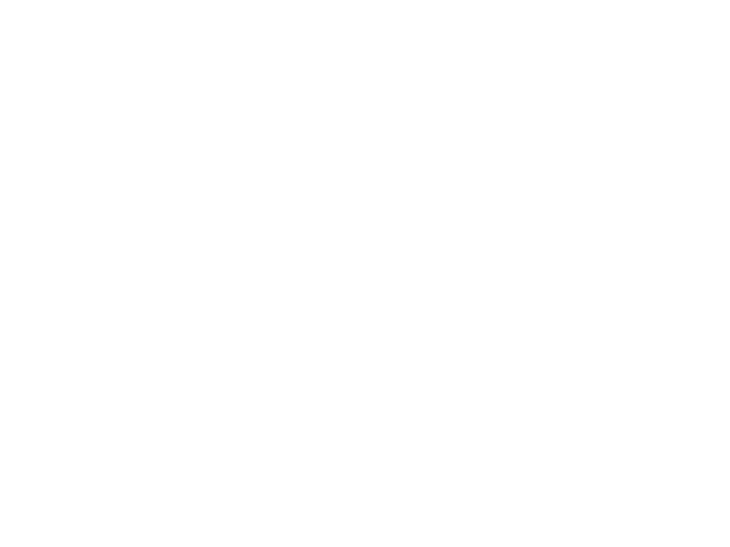

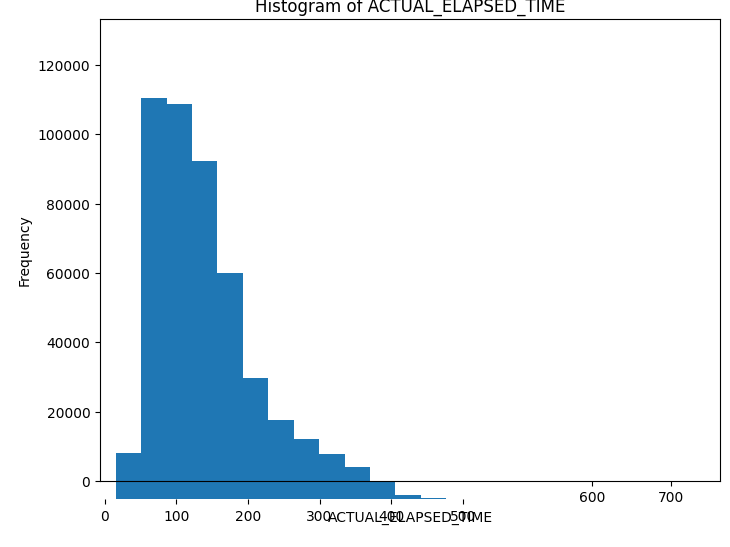

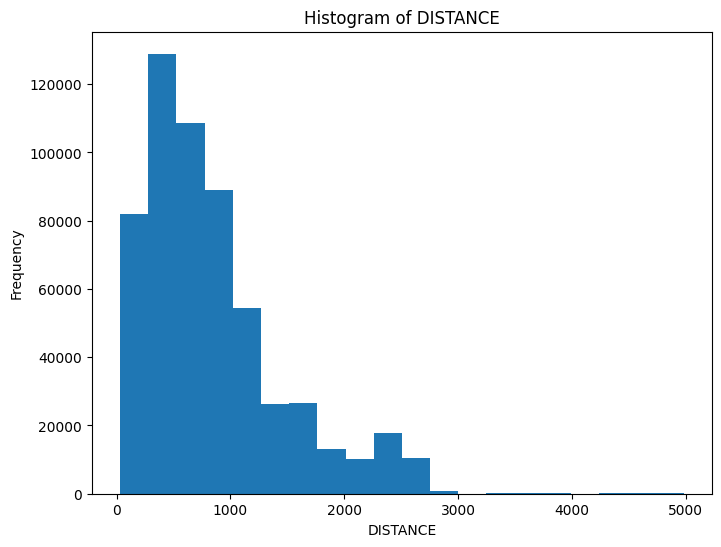

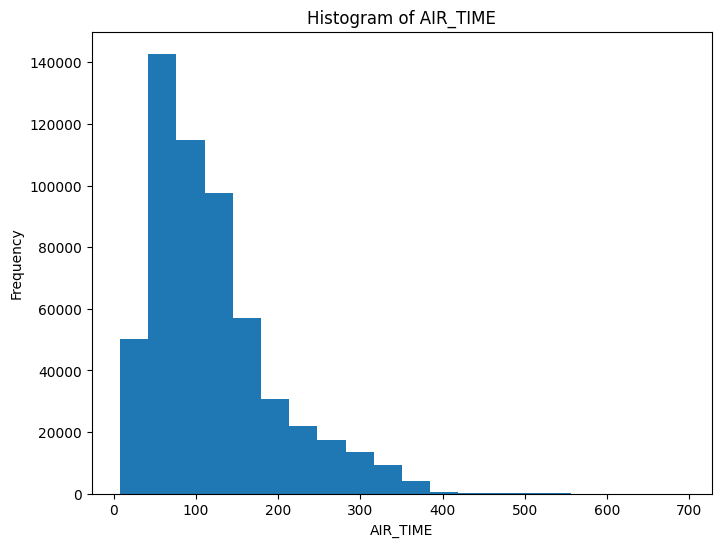

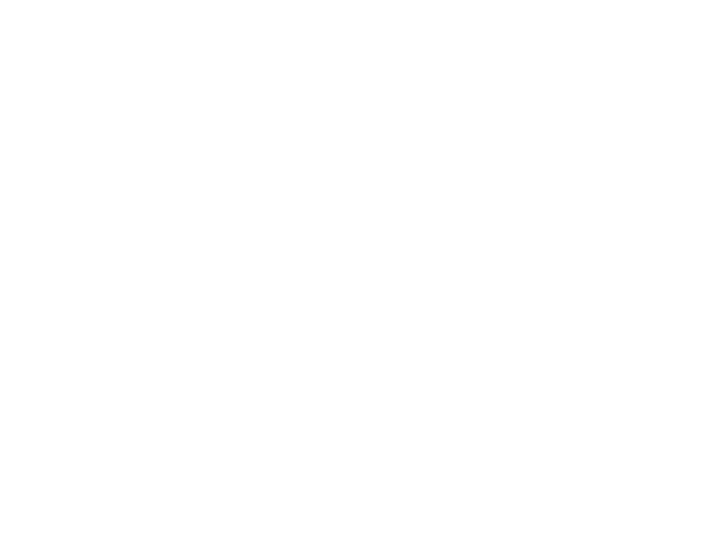

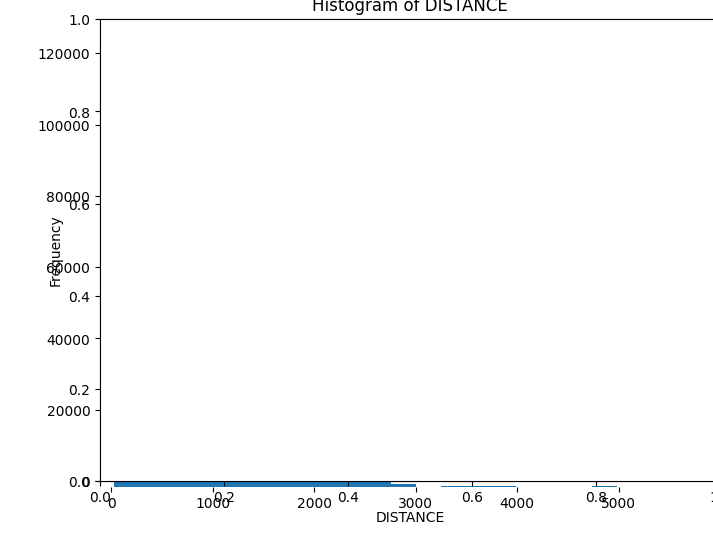

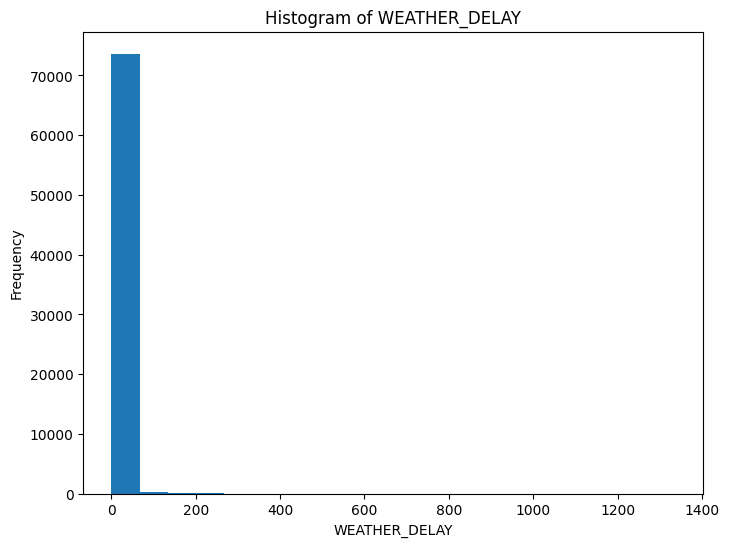

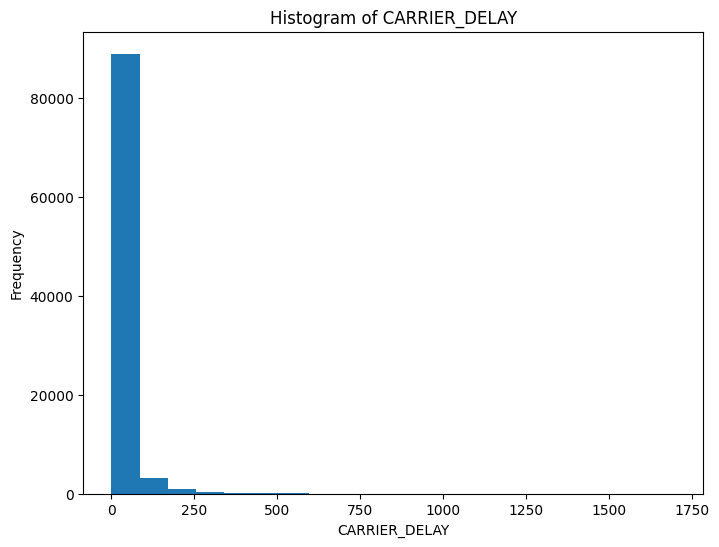

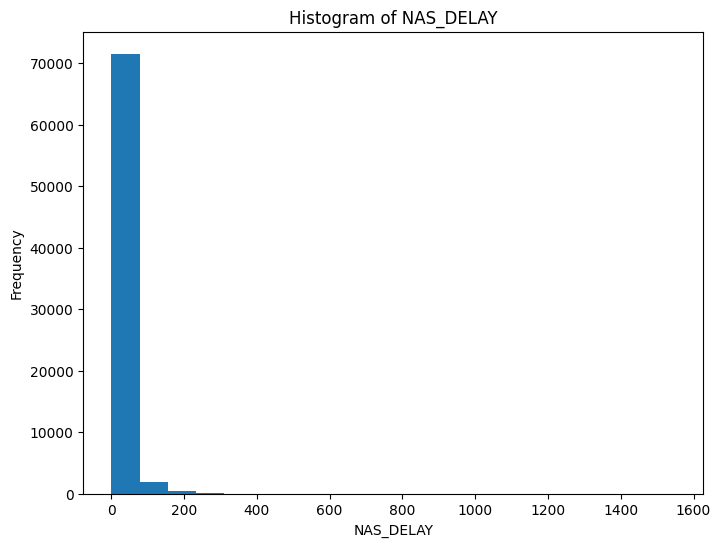

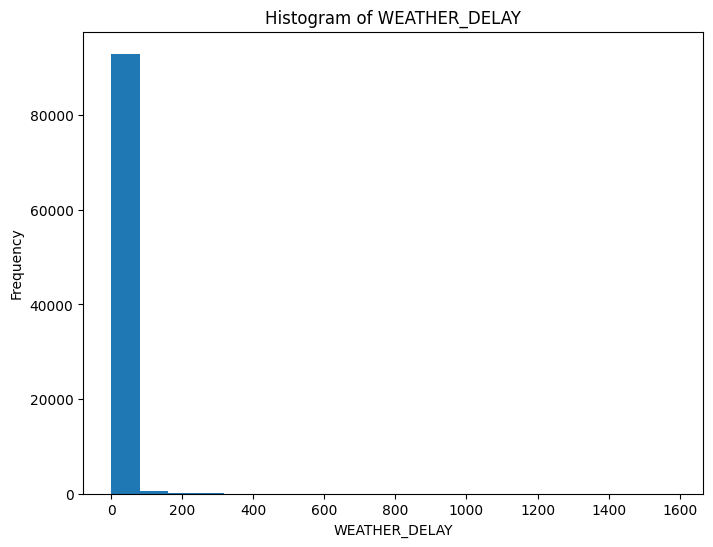

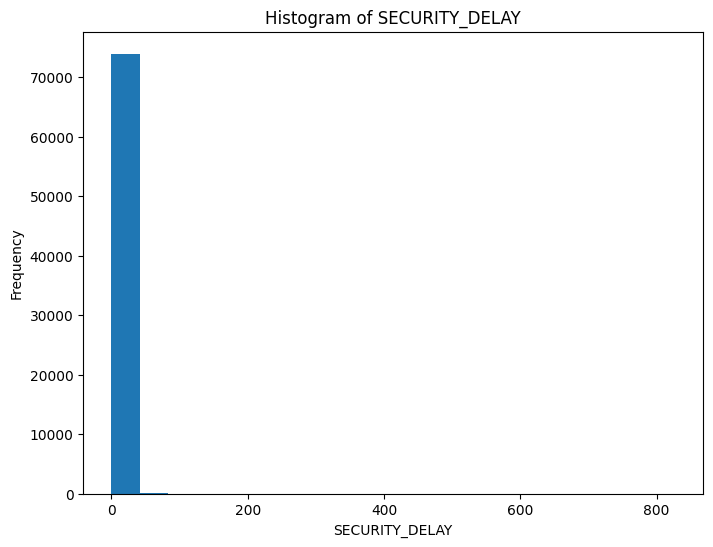

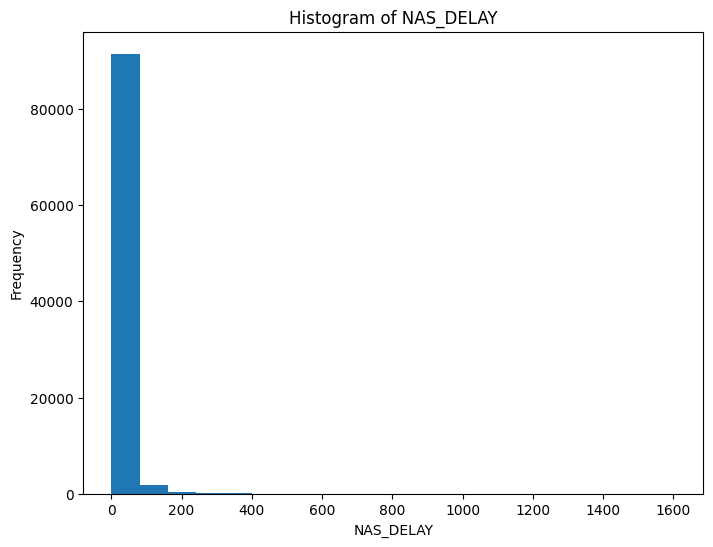

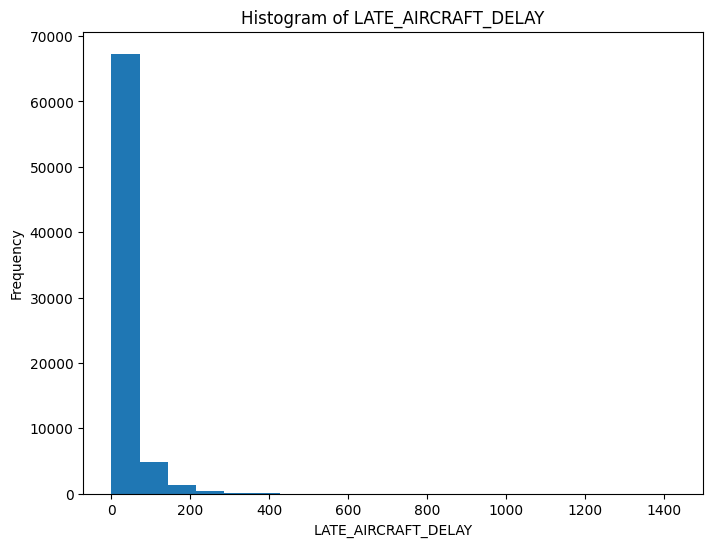

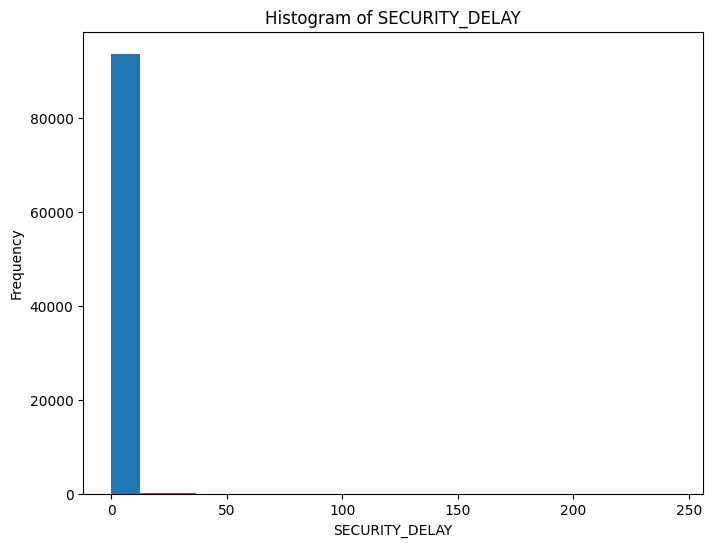

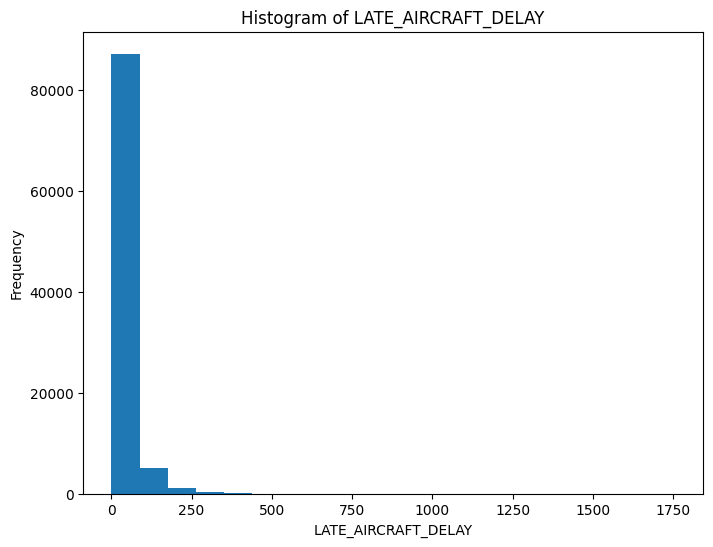

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Selecting numeric columns
numeric_columns = dd_2017.select_dtypes(include='number')

# Function to plot histograms for each partition
def plot_histograms(df):
    for column in df.columns:
        plt.figure(figsize=(8, 6))
        plt.hist(df[column], bins=20)
        plt.title(f'Histogram of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()

# Apply the histogram function to each partition (each chunk of the Dask DataFrame)
numeric_columns.map_partitions(plot_histograms).compute()

plt.suptitle('Histograms of Numeric Columns', y=0.92)
plt.show()


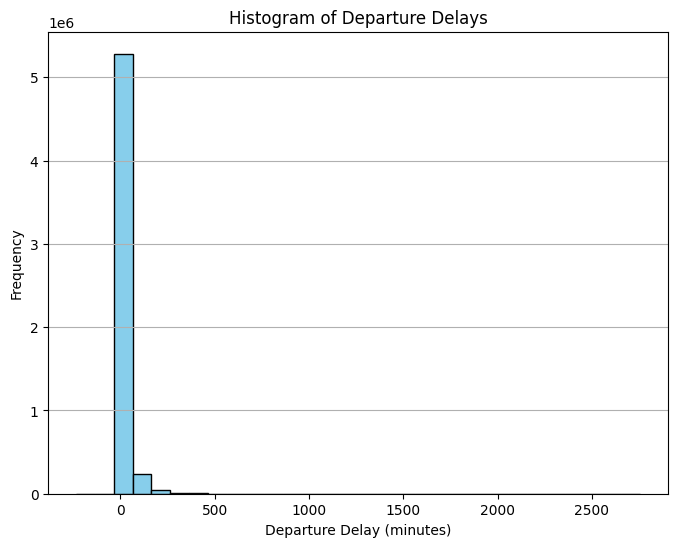

In [ ]:
# Define plot size
plt.figure(figsize=(8, 6))
plt.hist(dd_2017['DEP_DELAY'], bins=30, color='skyblue', edgecolor='black')  # Adjust the number of bins as needed
plt.xlabel('Departure Delay (minutes)')
plt.ylabel('Frequency')
plt.title('Histogram of Departure Delays')
plt.grid(axis='y')  # Show gridlines on y-axis
plt.show()

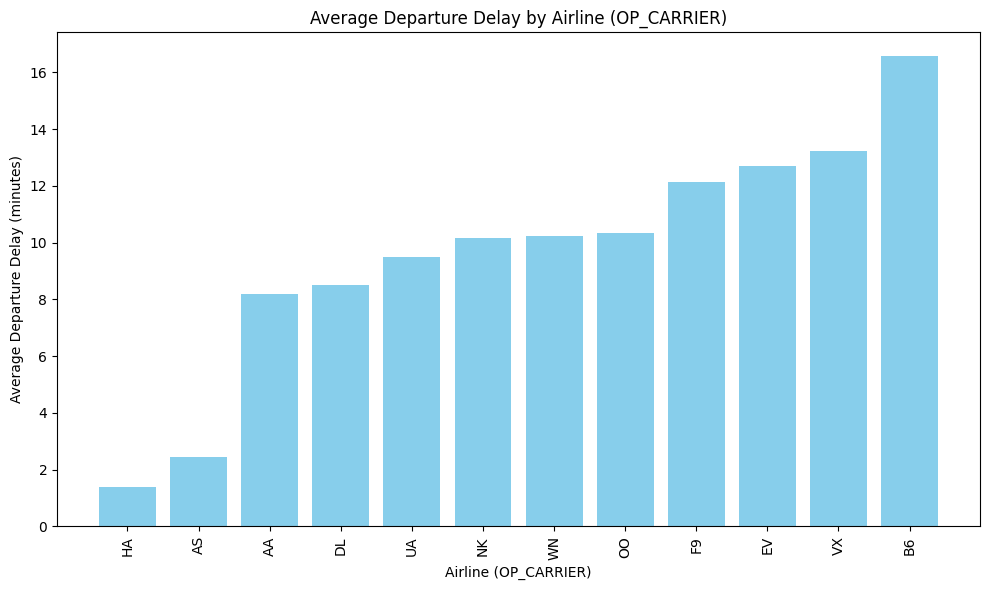

In [ ]:
# Grouping by 'OP_CARRIER' and calculating average departure delay
avg_delay_by_carrier = dd_2017.groupby('OP_CARRIER')['DEP_DELAY'].mean().reset_index()

# Convert Dask DataFrame to Pandas DataFrame
avg_delay_by_carrier = avg_delay_by_carrier.compute()

# Sorting the values by average departure delay (optional)
avg_delay_by_carrier = avg_delay_by_carrier.sort_values('DEP_DELAY')

# Creating a bar plot using Pandas
plt.figure(figsize=(10, 6))
plt.bar(avg_delay_by_carrier['OP_CARRIER'], avg_delay_by_carrier['DEP_DELAY'], color='skyblue')
plt.xlabel('Airline (OP_CARRIER)')
plt.ylabel('Average Departure Delay (minutes)')
plt.title('Average Departure Delay by Airline (OP_CARRIER)')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Ensure all labels are visible
plt.show()

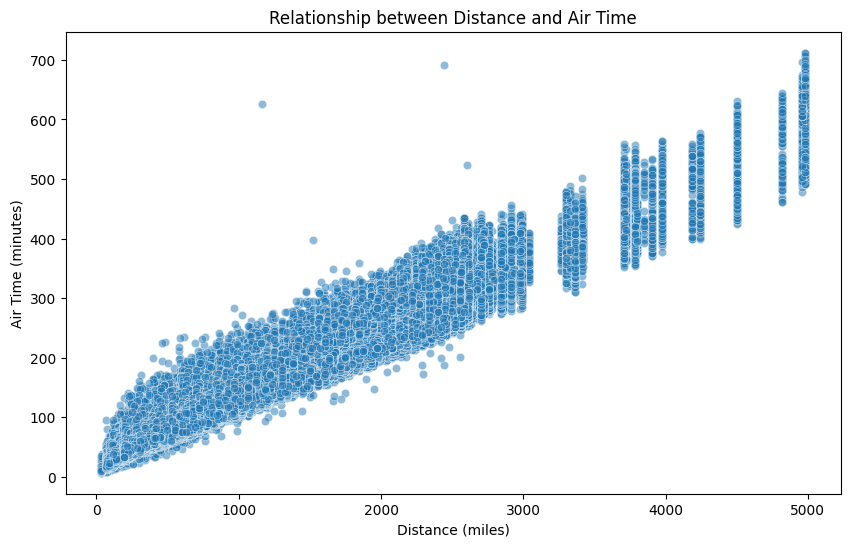

In [ ]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='DISTANCE', y='AIR_TIME', data=dd_2017, alpha=0.5)
plt.title('Relationship between Distance and Air Time')
plt.xlabel('Distance (miles)')
plt.ylabel('Air Time (minutes)')
plt.show()

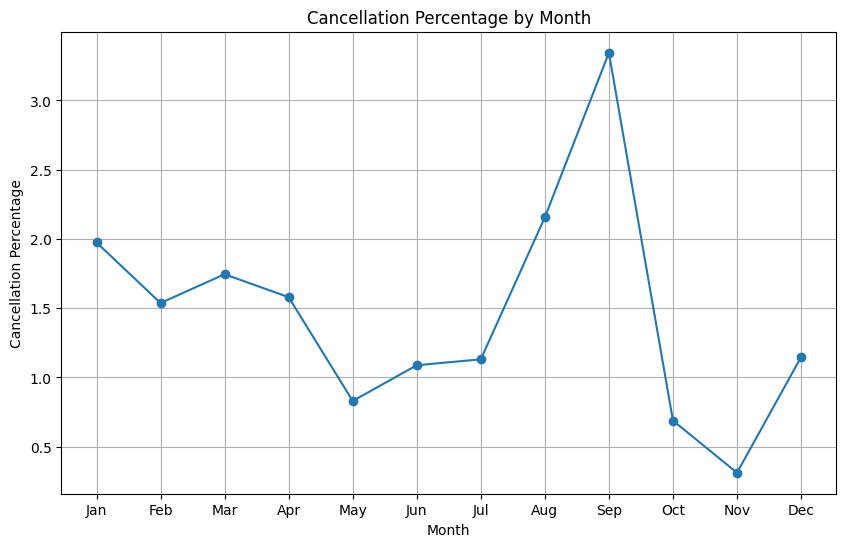

In [ ]:
import calendar
# Group by month and calculate cancellation percentage
monthly_cancellation_percentage = (
    dd_2017.groupby(dd_2017['FL_DATE'].dt.month)['CANCELLED'].mean() * 100
)

# Convert Dask Series to Pandas Series
monthly_cancellation_percentage = monthly_cancellation_percentage.compute()

# Plot line chart of cancellation percentage by month
plt.figure(figsize=(10, 6))
plt.plot(monthly_cancellation_percentage.index, monthly_cancellation_percentage.values, marker='o')
plt.title('Cancellation Percentage by Month')
plt.xlabel('Month')
plt.ylabel('Cancellation Percentage')
plt.xticks(range(1, 13), calendar.month_abbr[1:])
plt.grid(True)
plt.show()

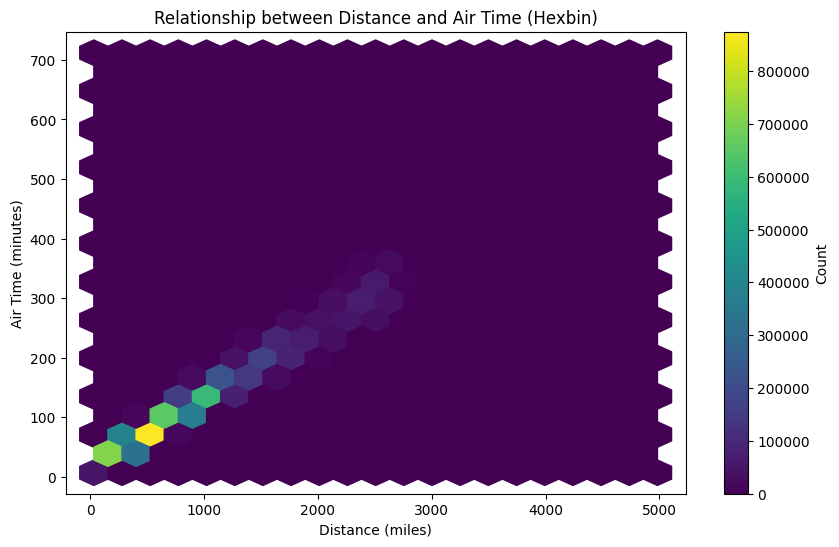

In [ ]:
plt.figure(figsize=(10, 6))
plt.hexbin(dd_2017['DISTANCE'], dd_2017['AIR_TIME'], gridsize=20, cmap='viridis')
plt.title('Relationship between Distance and Air Time (Hexbin)')
plt.xlabel('Distance (miles)')
plt.ylabel('Air Time (minutes)')
plt.colorbar(label='Count')
plt.show()

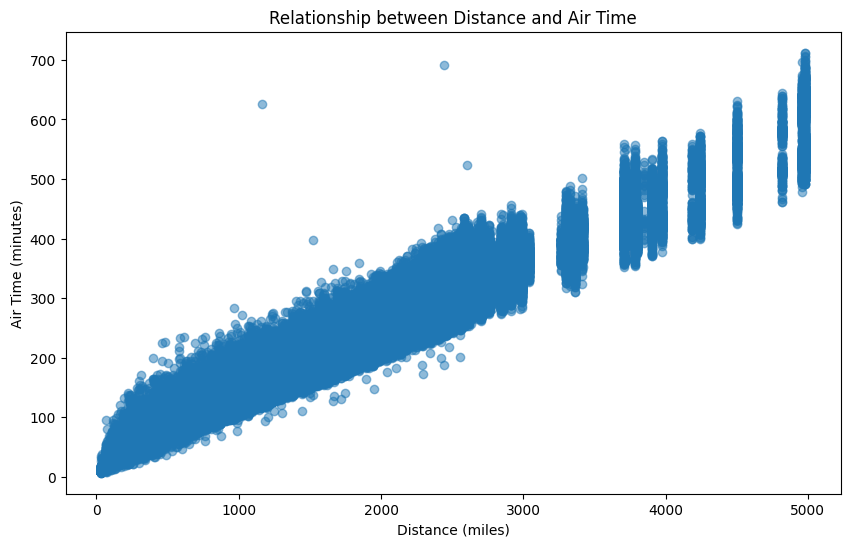

In [ ]:
# Increase the Agg path chunksize to avoid OverflowError
plt.rcParams['agg.path.chunksize'] = 10000

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(dd_2017['DISTANCE'], dd_2017['AIR_TIME'], alpha=0.5)
plt.title('Relationship between Distance and Air Time')
plt.xlabel('Distance (miles)')
plt.ylabel('Air Time (minutes)')
plt.show()

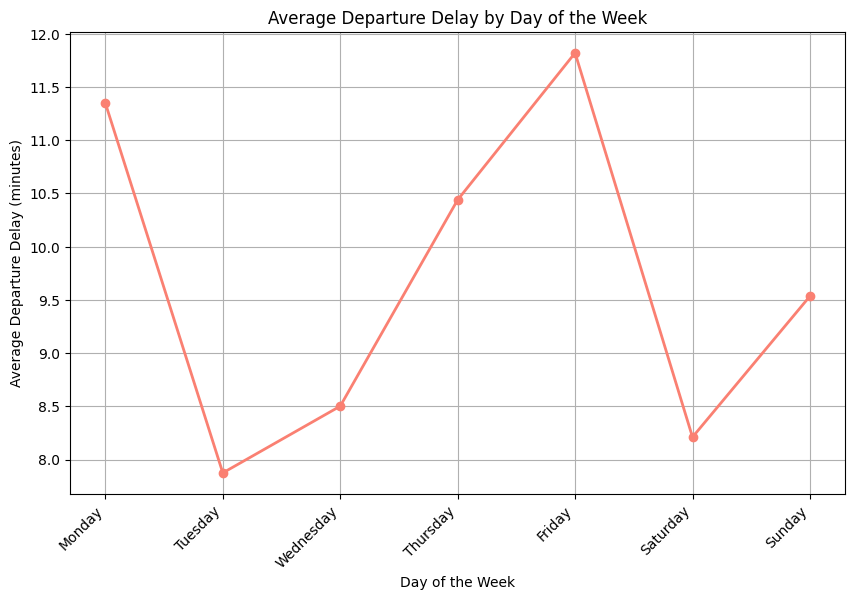

In [ ]:
import datetime

# Create a new column for the day of the week (0 = Monday, 6 = Sunday)
dd_2017['DayOfWeek'] = dd_2017['FL_DATE'].dt.dayofweek

# Group by day of the week and calculate average delay
average_delay_by_day = dd_2017.groupby('DayOfWeek')['DEP_DELAY'].mean()

# Convert Dask Series to Pandas Series
average_delay_by_day = average_delay_by_day.compute()

# Define day names
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Plot line chart with labeled days
plt.figure(figsize=(10, 6))
plt.plot(day_names, average_delay_by_day, marker='o', color='salmon', linestyle='-', linewidth=2)
plt.title('Average Departure Delay by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Departure Delay (minutes)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.grid(True)
plt.show()

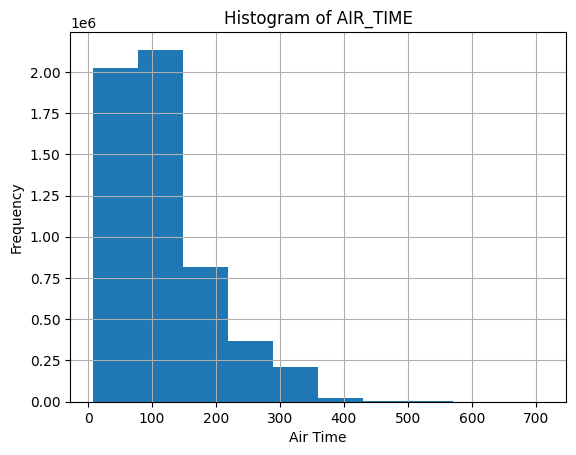

In [ ]:
# Histogram of a numerical column
dd_2017['AIR_TIME'].compute().hist()
plt.title('Histogram of AIR_TIME')
plt.xlabel('Air Time')
plt.ylabel('Frequency')
plt.show()

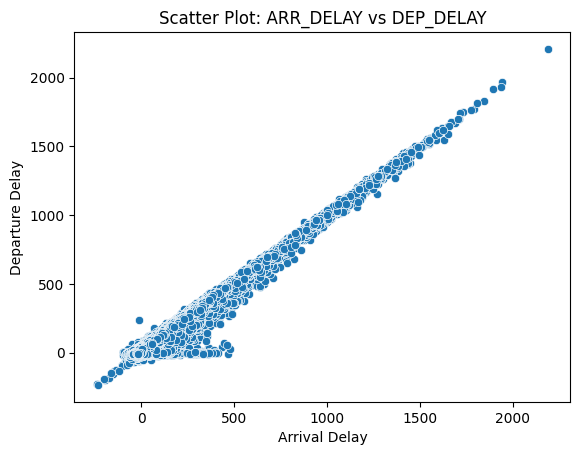

In [ ]:
# Scatter plot between two columns
df_scatter = dd_2017[['ARR_DELAY', 'DEP_DELAY']].compute()
sns.scatterplot(x='ARR_DELAY', y='DEP_DELAY', data=df_scatter)
plt.title('Scatter Plot: ARR_DELAY vs DEP_DELAY')
plt.xlabel('Arrival Delay')
plt.ylabel('Departure Delay')
plt.show()

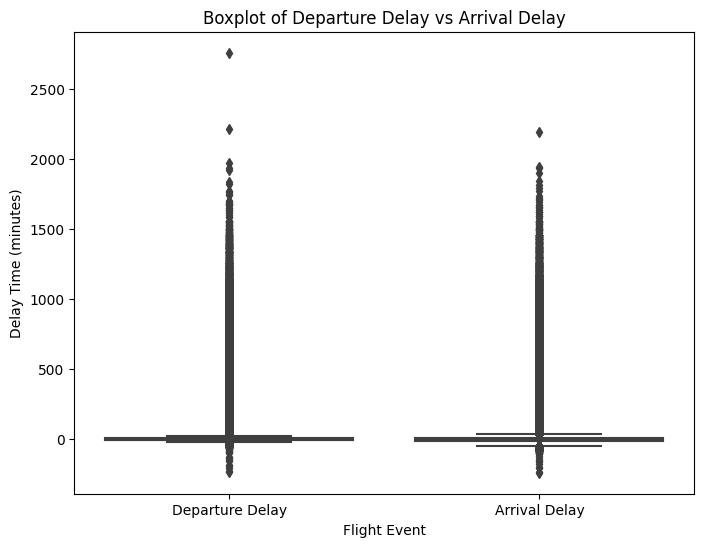

In [ ]:
# Selecting specific columns
selected_columns = dd_2017[['DEP_DELAY', 'ARR_DELAY']]

# Convert Dask DataFrame to Pandas DataFrame
selected_columns_pd = selected_columns.compute()

# Creating a boxplot using seaborn
plt.figure(figsize=(8, 6))
sns.boxplot(data=selected_columns_pd)
plt.title('Boxplot of Departure Delay vs Arrival Delay')
plt.xlabel('Flight Event')
plt.ylabel('Delay Time (minutes)')
plt.xticks(ticks=[0, 1], labels=['Departure Delay', 'Arrival Delay'])
plt.show()

## References

- https://www.analyticsvidhya.com/blog/2023/02/understanding-dask-in-depth/
- https://tilburgsciencehub.com/building-blocks/prepare-your-data-for-analysis/data-preparation/dask-in-action/#:~:text=dask%20is%20a%20Python%20library,pandas%20%2C%20but%20remember%20to%20add%20.